In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

# Load Dataset

In [2]:
import os
from google.colab import drive
drive.mount('/content/drive') # default
path_data = '/content/drive/My Drive/My DriveColab Notebooks/Coding TA/'

Mounted at /content/drive


In [3]:
url = 'https://drive.google.com/file/d/1YKbwwh_mCPccrwW3P4diRSRIfUhT5Et8/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url, sep = ";", index_col='Patient File No.')

In [4]:
df.head()

PCOS (Y/N)  Age (yrs)  Weight (Kg)  Height(Cm)   BMI  \
Patient File No.                                                         
1                          0         28          446          152  193   
2                          0         36           65         1615  249   
3                          1         33          688          165  253   
4                          0         37           65          148  297   
5                          0         25           52          161  201   

                  Blood Group  Pulse rate(bpm)   RR (breaths/min)  Hb(g/dl)  \
Patient File No.                                                              
1                          15                78                22      1048   
2                          15                74                20       117   
3                          11                72                18       118   
4                          13                72                20        12   
5                          11                72                18        10   

                  Cycle(R/I)  Cycle length(days)  Marraige Status (Yrs)  \
Patient File No.                                                          
1                          2                   5                    7.0   
2                          2                   5                   11.0   
3                          2                   5                   10.0   
4                          2                   5                    4.0   
5                          2                   5                    1.0   

                  Pregnant(Y/N)  No. of abortions  Ibeta-HCG(mIU/mL)  \
Patient File No.                                                       
1                             0                 0                199   
2                             1                 0                608   
3                             1                 0              49408   
4                             0                 0                199   
5                             1                 0              80145   

                  IIbeta-HCG(mIU/mL)  FSH(mIU/mL)  LH(mIU/mL)  FSH/LH  \
Patient File No.                                                        
1                                199          795         368     216   
2                                199          673         109     617   
3                              49408          554          88      63   
4                                199          806         236     342   
5                              80145          398           9     442   

                  Hip(inch)  Waist(inch)  Waist:Hip Ratio  TSH (mIU/L)  \
Patient File No.                                                         
1                        36           30               83           68   
2                        38           32               84          316   
3                        40           36                9          254   
4                        42           36               86         1641   
5                        37           30               81          357   

                  AMH(ng/mL)  PRL(ng/mL)  Vit D3 (ng/mL)  PRG(ng/mL)  \
Patient File No.                                                       
1                      207.0        4516             171          57   
2                      153.0        2009             613          97   
3                      663.0        1052             497          36   
4                      122.0         369             334          36   
5                      226.0        3009             438          38   

                  RBS(mg/dl)  Weight gain(Y/N)  hair growth(Y/N)  \
Patient File No.                                                   
1                         92                 0                 0   
2                         92                 0                 0   
3                         84                 0                 0   
4                         76          

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541 entries, 1 to 541
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PCOS (Y/N)             541 non-null    int64  
 1   Age (yrs)              541 non-null    int64  
 2   Weight (Kg)            541 non-null    int64  
 3   Height(Cm)             541 non-null    int64  
 4   BMI                    541 non-null    int64  
 5   Blood Group            541 non-null    int64  
 6   Pulse rate(bpm)        541 non-null    int64  
 7   RR (breaths/min)       541 non-null    int64  
 8   Hb(g/dl)               541 non-null    int64  
 9   Cycle(R/I)             541 non-null    int64  
 10  Cycle length(days)     541 non-null    int64  
 11  Marraige Status (Yrs)  540 non-null    float64
 12  Pregnant(Y/N)          541 non-null    int64  
 13  No. of abortions       541 non-null    int64  
 14  Ibeta-HCG(mIU/mL)      541 non-null    int64  
 15  IIbeta-HCG(

# Preprocssing

## Missing value

In [6]:
# Hitung jumlah missing value per kolom
missing_values = df.isnull().sum()
print("\nJumlah missing value per kolom:")
print(missing_values)


Jumlah missing value per kolom:
PCOS (Y/N)               0
Age (yrs)                0
Weight (Kg)              0
Height(Cm)               0
BMI                      0
Blood Group              0
Pulse rate(bpm)          0
RR (breaths/min)         0
Hb(g/dl)                 0
Cycle(R/I)               0
Cycle length(days)       0
Marraige Status (Yrs)    1
Pregnant(Y/N)            0
No. of abortions         0
Ibeta-HCG(mIU/mL)        0
IIbeta-HCG(mIU/mL)       0
FSH(mIU/mL)              0
LH(mIU/mL)               0
FSH/LH                   0
Hip(inch)                0
Waist(inch)              0
Waist:Hip Ratio          0
TSH (mIU/L)              0
AMH(ng/mL)               1
PRL(ng/mL)               0
Vit D3 (ng/mL)           0
PRG(ng/mL)               0
RBS(mg/dl)               0
Weight gain(Y/N)         0
hair growth(Y/N)         0
Skin darkening (Y/N)     0
Hair loss(Y/N)           0
Pimples(Y/N)             0
Fast food (Y/N)          1
Reg.Exercise(Y/N)        0
BP _Systolic (mmHg)   

In [7]:
# Hitung persentase missing value
missing_percentage = (missing_values / len(df)) * 100
print("\nPersentase missing value per kolom:")
print(missing_percentage)


Persentase missing value per kolom:
PCOS (Y/N)               0.000000
Age (yrs)                0.000000
Weight (Kg)              0.000000
Height(Cm)               0.000000
BMI                      0.000000
Blood Group              0.000000
Pulse rate(bpm)          0.000000
RR (breaths/min)         0.000000
Hb(g/dl)                 0.000000
Cycle(R/I)               0.000000
Cycle length(days)       0.000000
Marraige Status (Yrs)    0.184843
Pregnant(Y/N)            0.000000
No. of abortions         0.000000
Ibeta-HCG(mIU/mL)        0.000000
IIbeta-HCG(mIU/mL)       0.000000
FSH(mIU/mL)              0.000000
LH(mIU/mL)               0.000000
FSH/LH                   0.000000
Hip(inch)                0.000000
Waist(inch)              0.000000
Waist:Hip Ratio          0.000000
TSH (mIU/L)              0.000000
AMH(ng/mL)               0.184843
PRL(ng/mL)               0.000000
Vit D3 (ng/mL)           0.000000
PRG(ng/mL)               0.000000
RBS(mg/dl)               0.000000
Weight gain

In [8]:
df.describe()

PCOS (Y/N)   Age (yrs)  Weight (Kg)    Height(Cm)          BMI  \
count  541.000000  541.000000   541.000000     541.000000  541.000000   
mean     0.327172   31.430684   135.325323    7941.399261  214.312384   
std      0.469615    5.411006   198.712079   34286.906423   82.618357   
min      0.000000   20.000000    31.000000     137.000000   16.000000   
25%      0.000000   28.000000    53.000000     152.000000  203.000000   
50%      0.000000   31.000000    60.000000     157.000000  233.000000   
75%      1.000000   35.000000    70.000000     161.000000  263.000000   
max      1.000000   48.000000   914.000000  170688.000000  389.000000   

       Blood Group  Pulse rate(bpm)   RR (breaths/min)     Hb(g/dl)  \
count   541.000000        541.000000        541.000000   541.000000   
mean     13.802218         73.247689         19.243993    89.604436   
std       1.840812          4.430285          1.688629    87.589249   
min      11.000000         13.000000         16.000000     9.000000   
25%      13.000000         72.000000         18.000000    12.000000   
50%      14.000000         72.000000         18.000000   107.000000   
75%      15.000000         74.000000         20.000000   115.000000   
max      18.000000         82.000000         28.000000  1201.000000   

       Cycle(R/I)  Cycle length(days)  Marraige Status (Yrs)  Pregnant(Y/N)  \
count  541.000000           541.00000             540.000000     541.000000   
mean     2.560074             4.94085               9.392593       0.380776   
std      0.901950             1.49202               9.089615       0.486027   
min      2.000000             0.00000               0.000000       0.000000   
25%      2.000000             4.00000               4.000000       0.000000   
50%      2.000000             5.00000               7.000000       0.000000   
75%      4.000000             5.00000              12.000000       1.000000   
max      5.000000            12.00000              85.000000       1.000000   

       No. of abortions  Ibeta-HCG(mIU/mL)  IIbeta-HCG(mIU/mL)   FSH(mIU/mL)  \
count        541.000000       5.410000e+02        5.410000e+02    541.000000   
mean           0.288355       4.210196e+04        1.638165e+04    491.262477   
std            0.692575       2.404759e+05        1.182106e+05    665.753846   
min            0.000000       2.000000e+00        2.000000e+00      1.000000   
25%            0.000000       1.990000e+02        1.990000e+02    249.000000   
50%            0.000000       9.620000e+02        1.990000e+02    438.000000   
75%            0.000000       2.185900e+04        4.176000e+03    611.000000   
max            5.000000       3.246097e+06        2.108421e+06  10206.000000   

        LH(mIU/mL)         FSH/LH   Hip(inch)  Waist(inch)  Waist:Hip Ratio  \
count   541.000000     541.000000  541.000000   541.000000       541.000000   
mean    253.963031     571.428835   37.992606    33.841035        82.641405   
std     299.787509    5906.762065    3.967920     3.596894        22.423303   
min       1.000000       0.000000   26.000000    24.000000         8.000000   
25%      59.000000     116.000000   36.000000    32.000000        84.000000   
50%     199.000000     195.000000   38.000000    34.000000        89.000000   
75%     342.000000     351.000000   40.000000    36.000000        93.000000   
max    4364.000000  137283.000000   48.000000    47.000000        98.000000   

       TSH (mIU/L)   AMH(ng/mL)    PRL(ng/mL)  Vit D3 (ng/mL)  PRG(ng/mL)  \
count   541.000000   540.000000    541.000000      541.000000  541.000000   
mean    261.916821   162.040741   2205.369686     2135.057301   38.022181   
std     348.579805   223.924132   1595.251988    26131.725878   50.188713   
min       1.000000     1.000000      4.000000        0.000000    1.000000   
25%     109.000000    26.000000   1249.000000      193.000000   25.000000   
50%     193.000000    73.500000   2035.000000      263.000000   26.000000   
75%     306.000000   214.

In [9]:
# Distribusi target variable
df['PCOS (Y/N)'].value_counts(normalize=True)

PCOS (Y/N)
0    0.672828
1    0.327172
Name: proportion, dtype: float64

## Histogram untuk variabel numerik

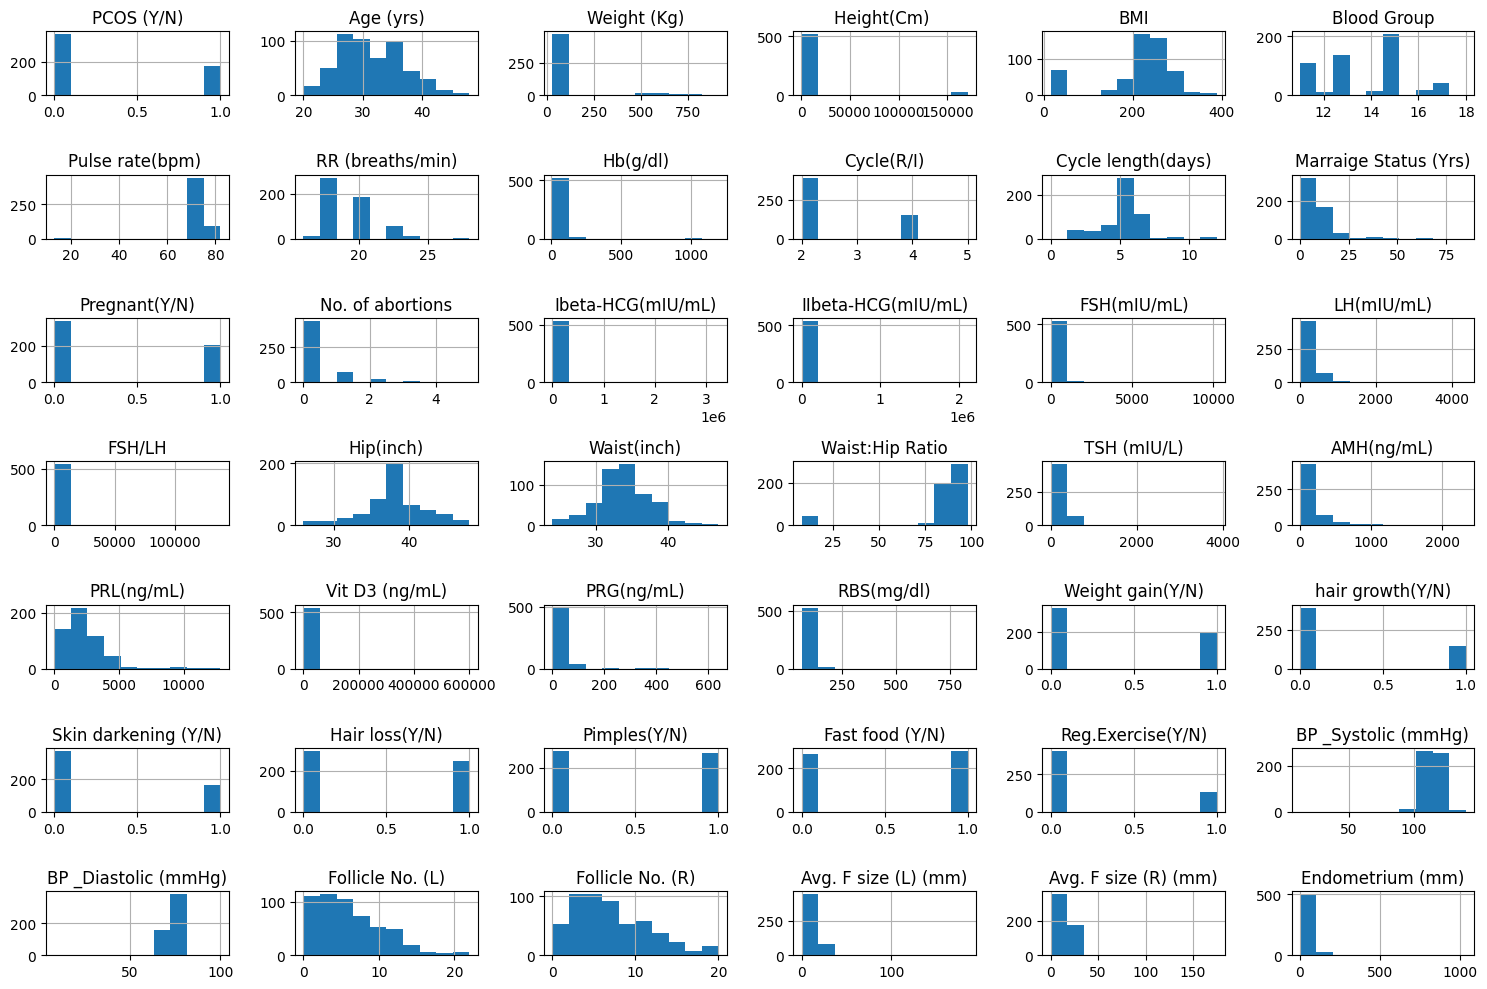

In [10]:
# Histogram untuk variabel numerik
numeric_features = df.select_dtypes(include=[np.number]).columns
df[numeric_features].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# Korelasi Matrix

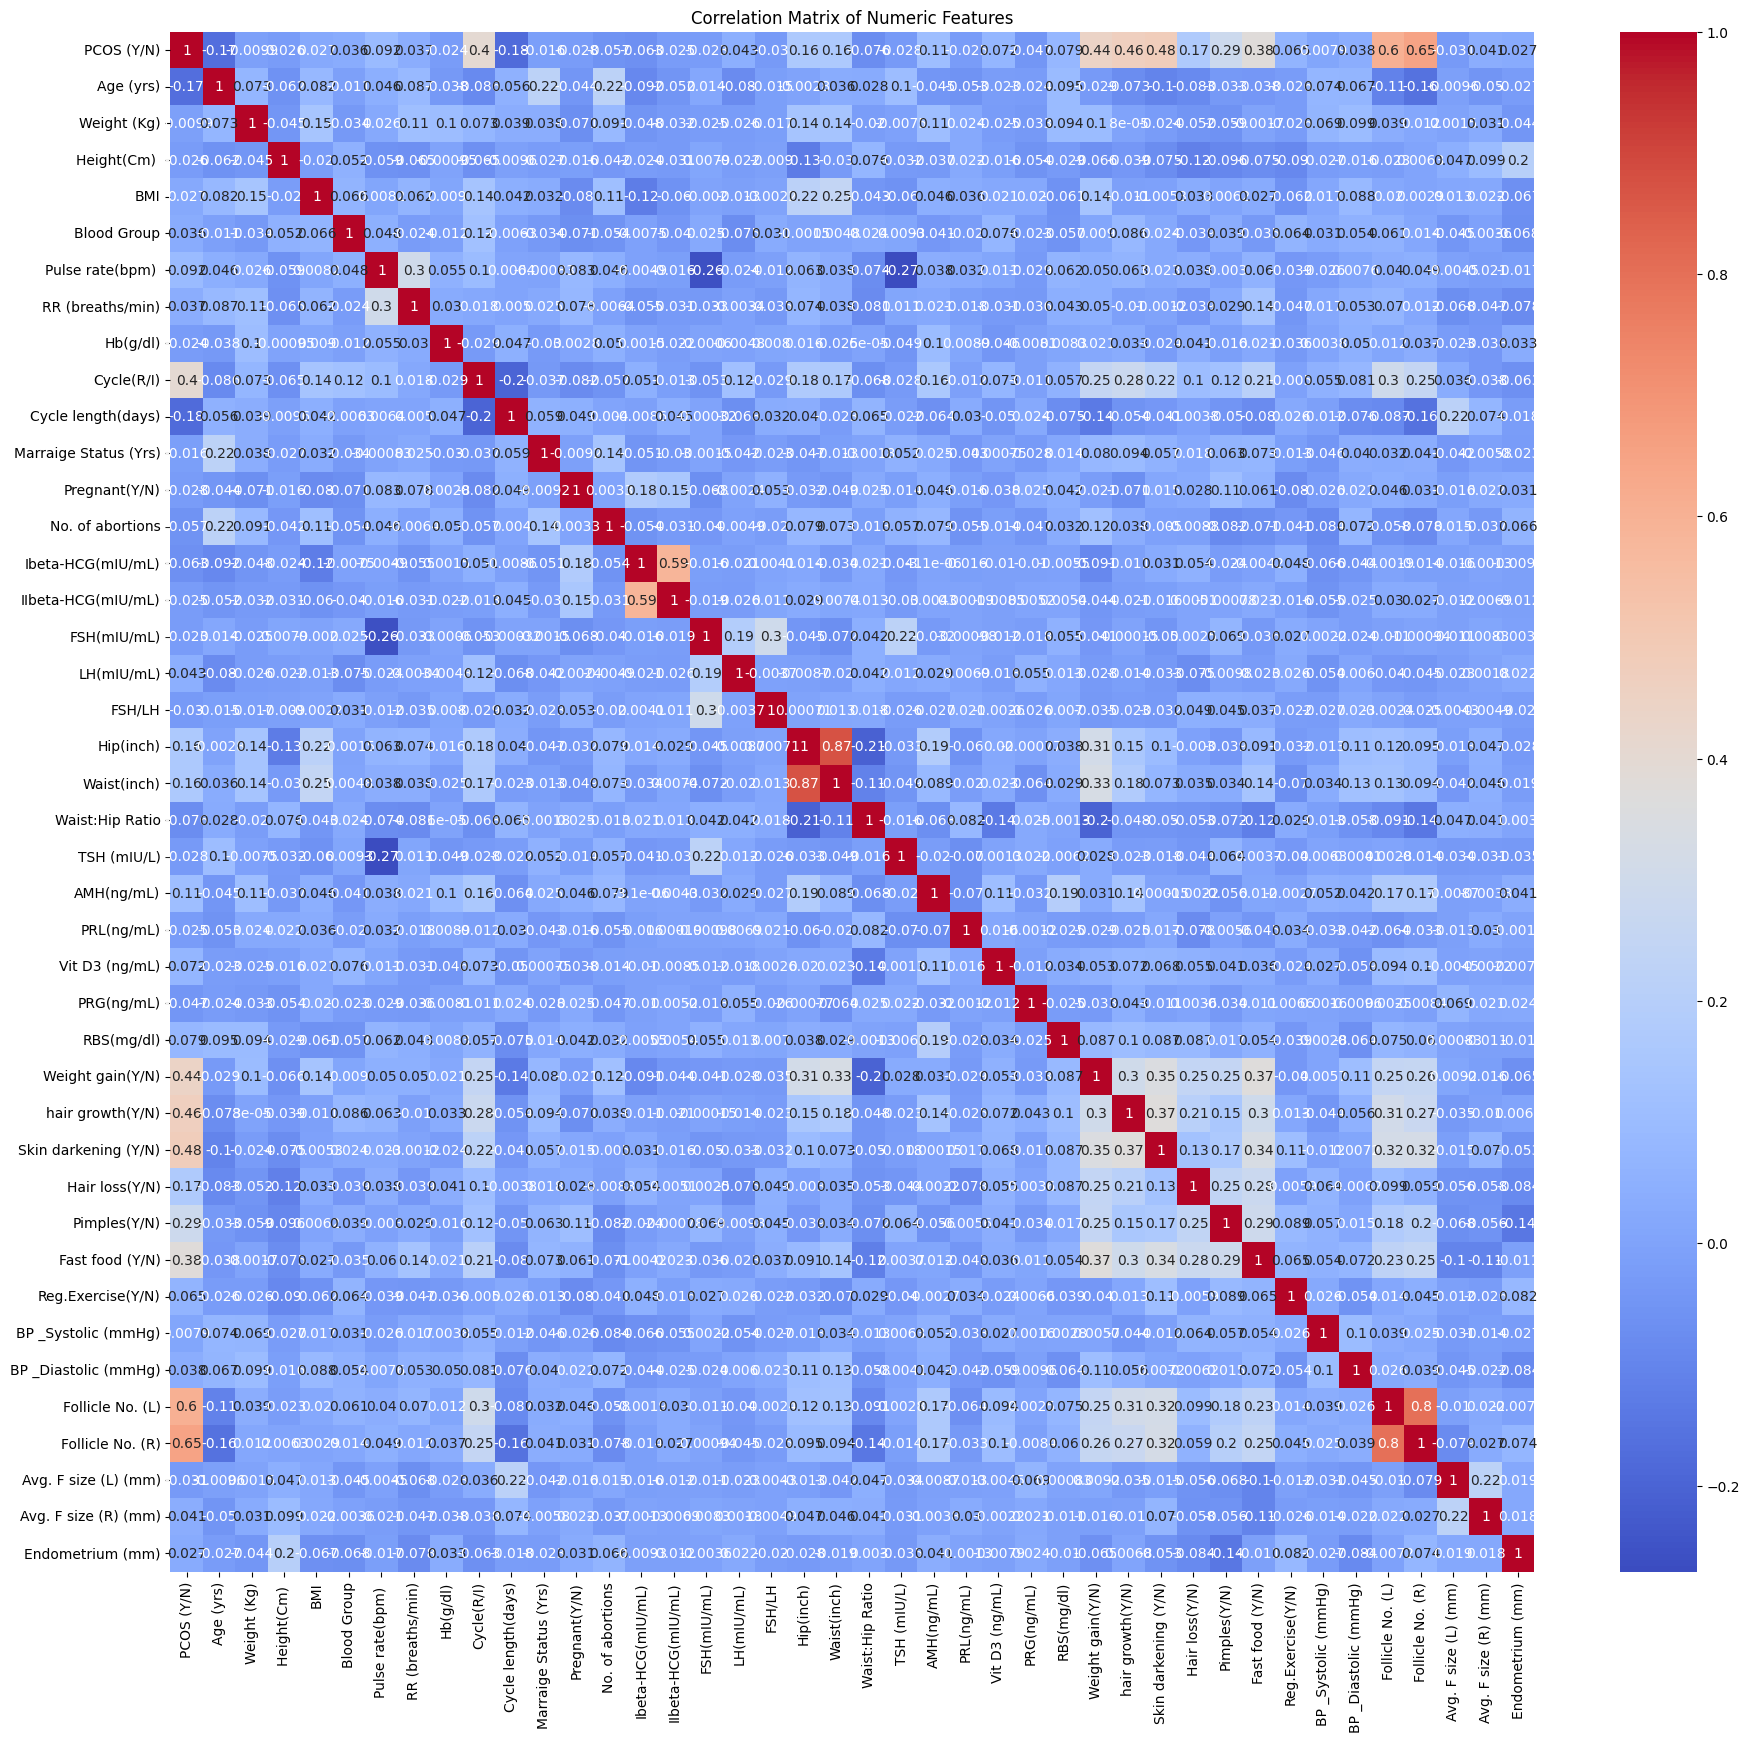

In [11]:
# Korelasi antara variabel numerik
correlation_matrix = df[numeric_features].corr()
plt.figure(figsize=(22, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

## Boxplot numerik vs target

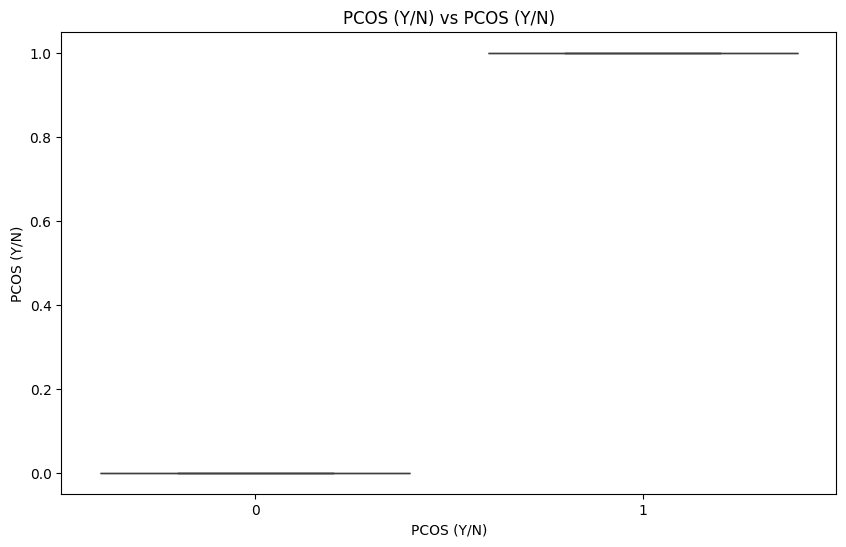

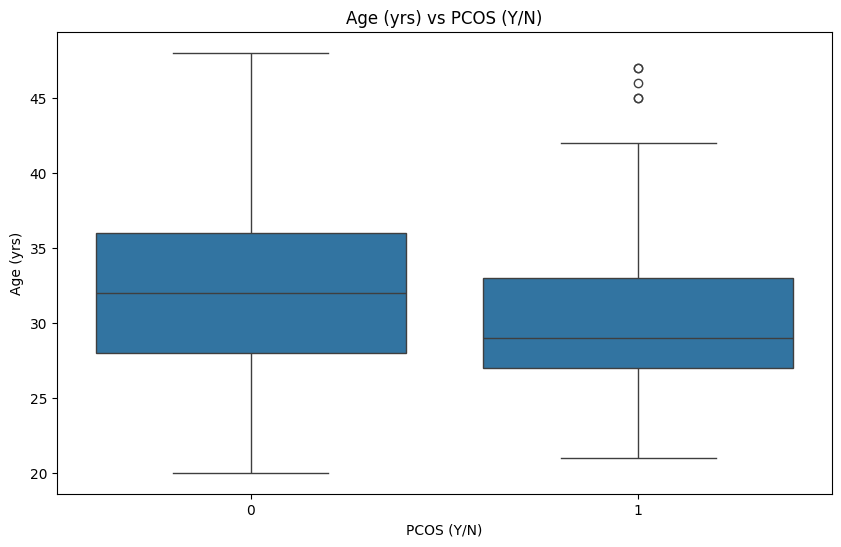

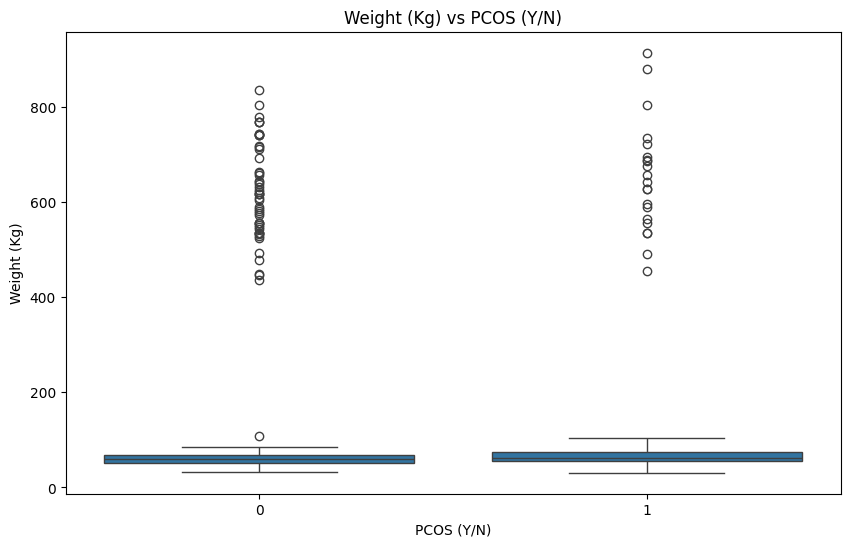

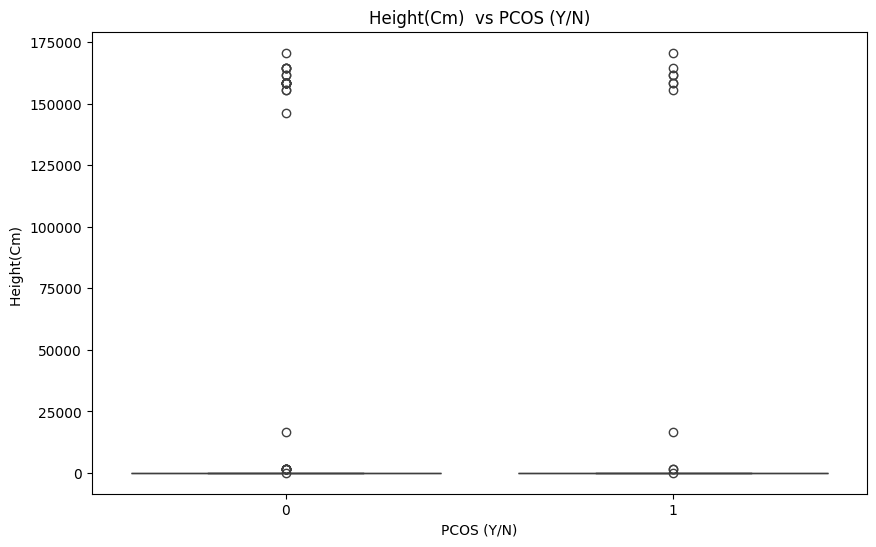

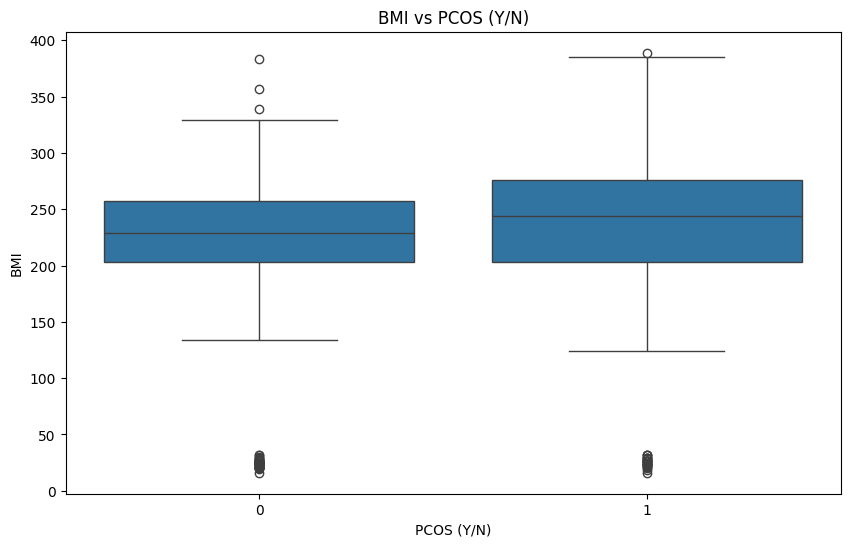

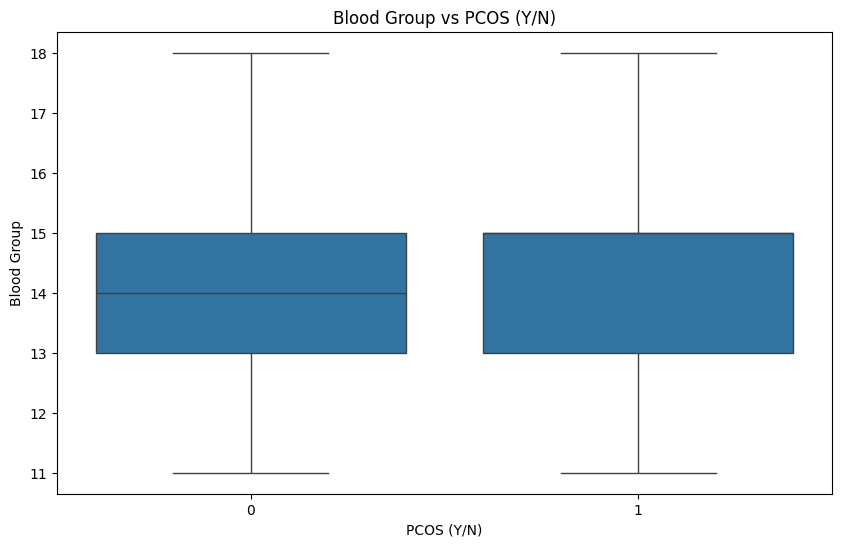

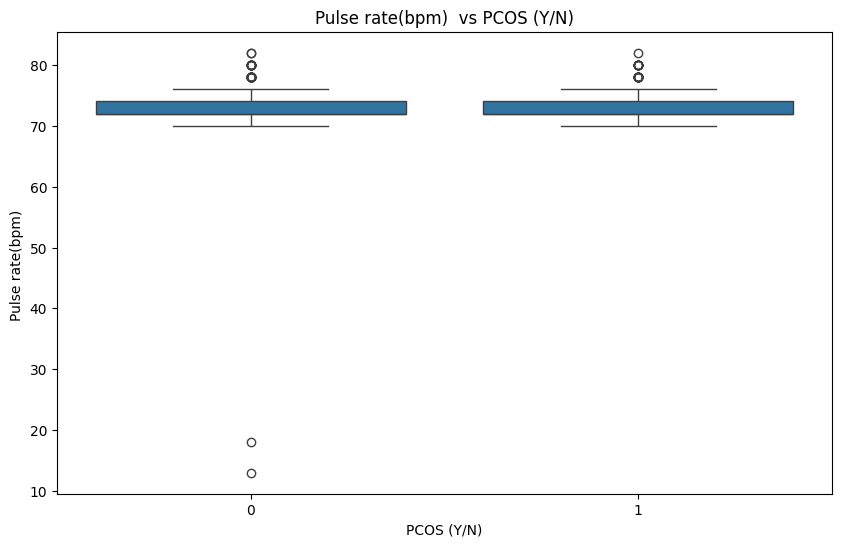

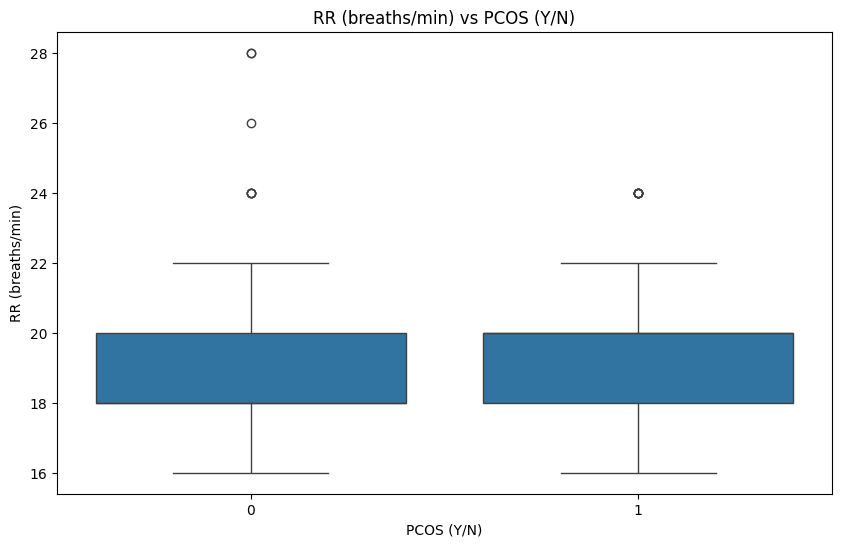

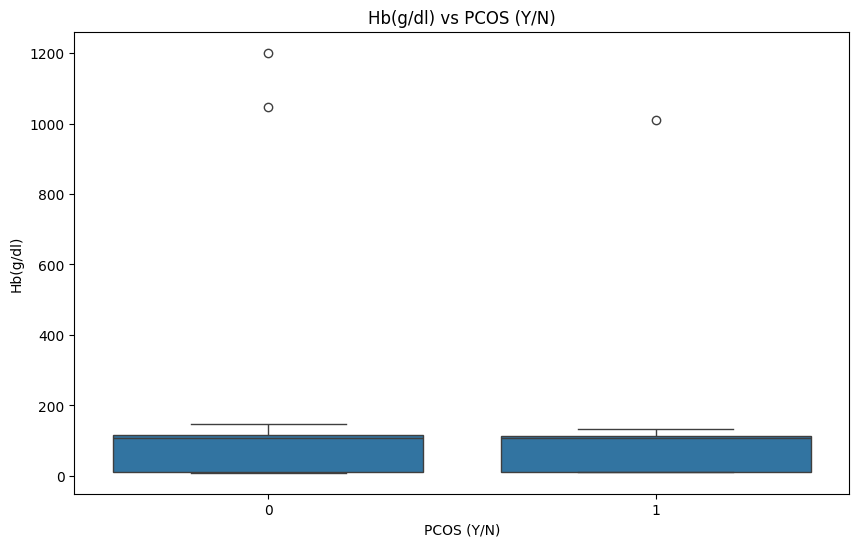

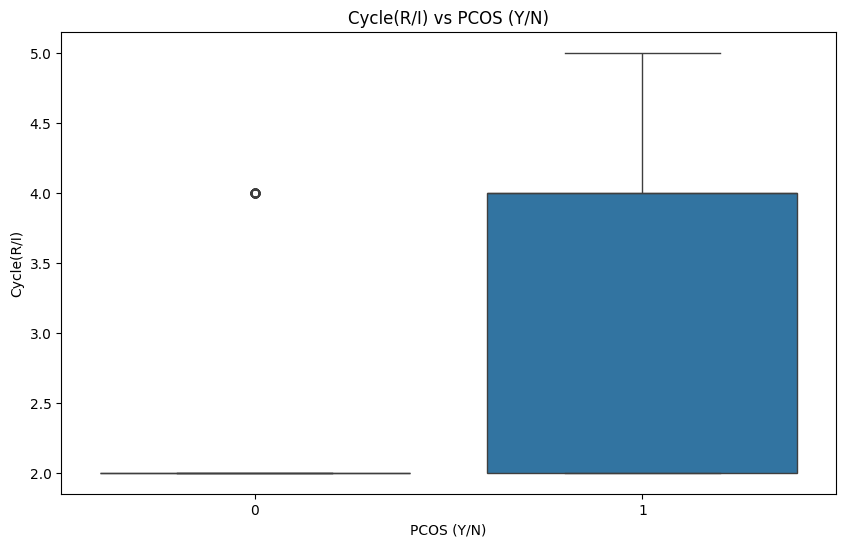

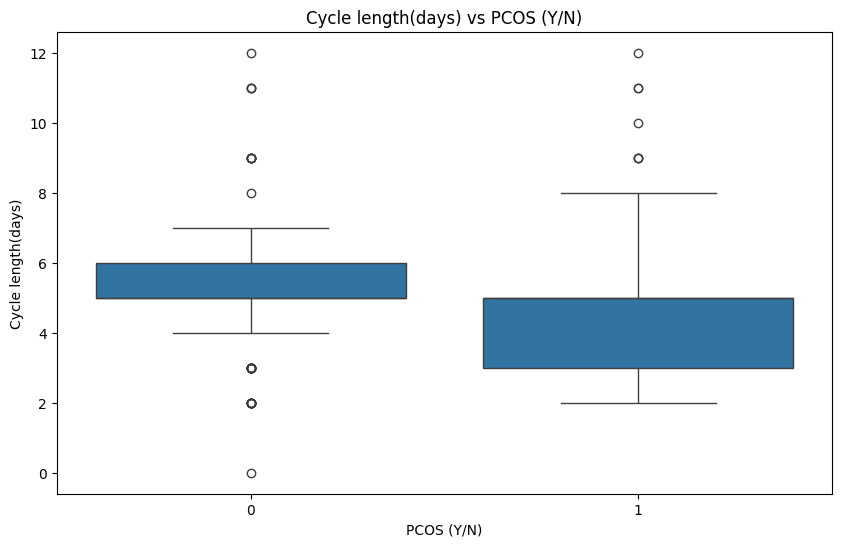

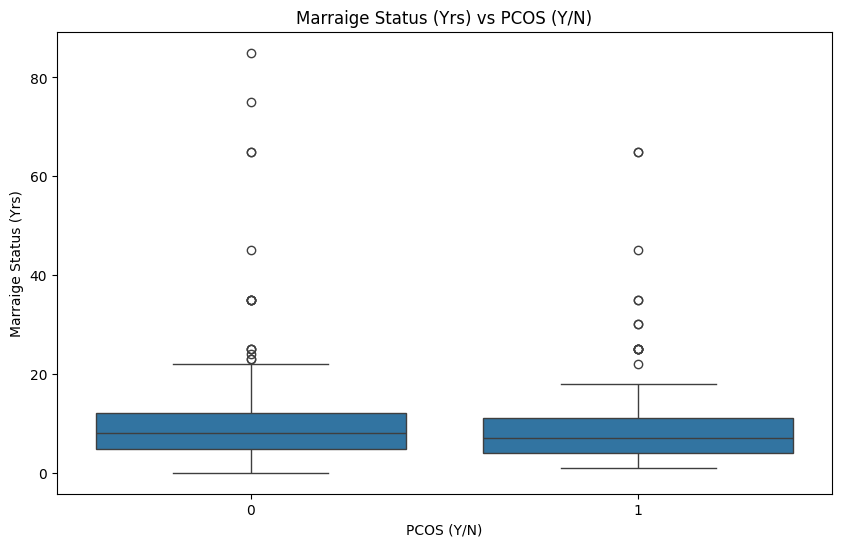

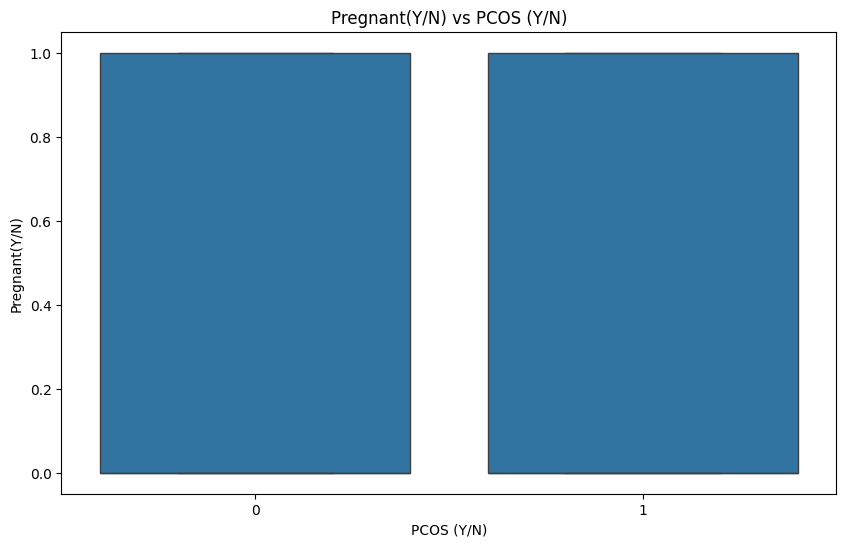

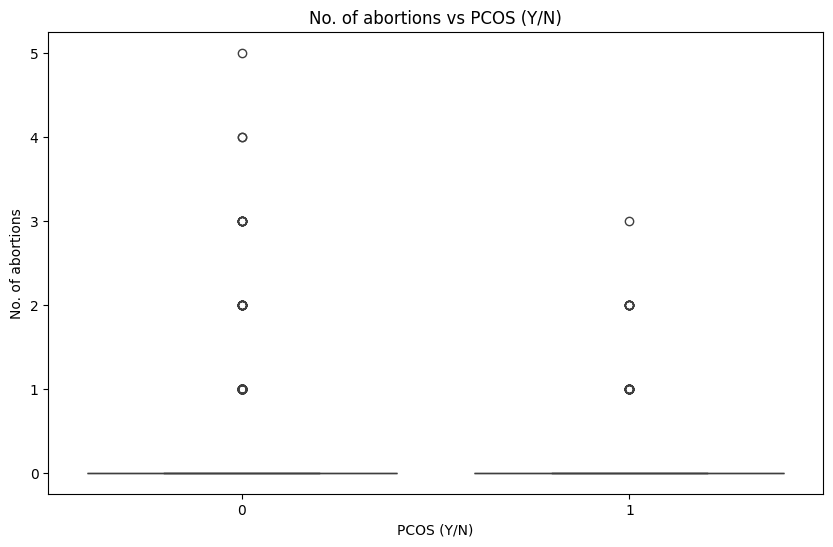

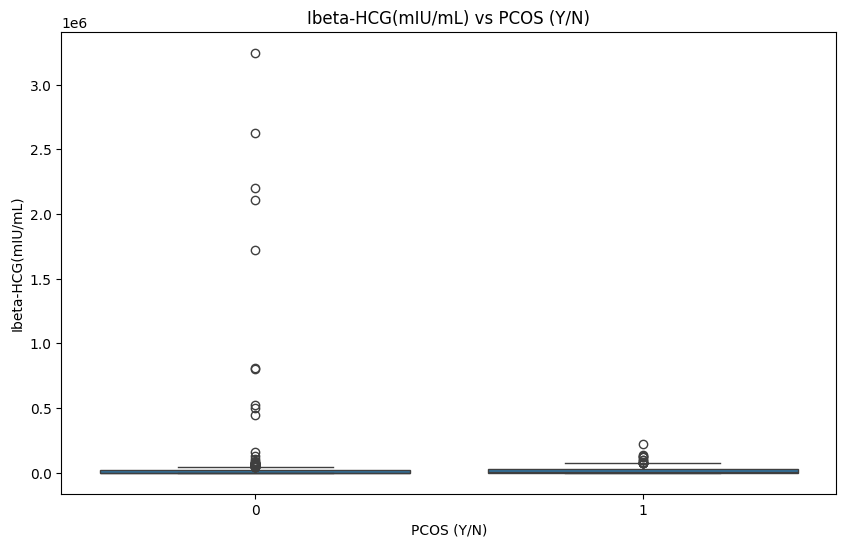

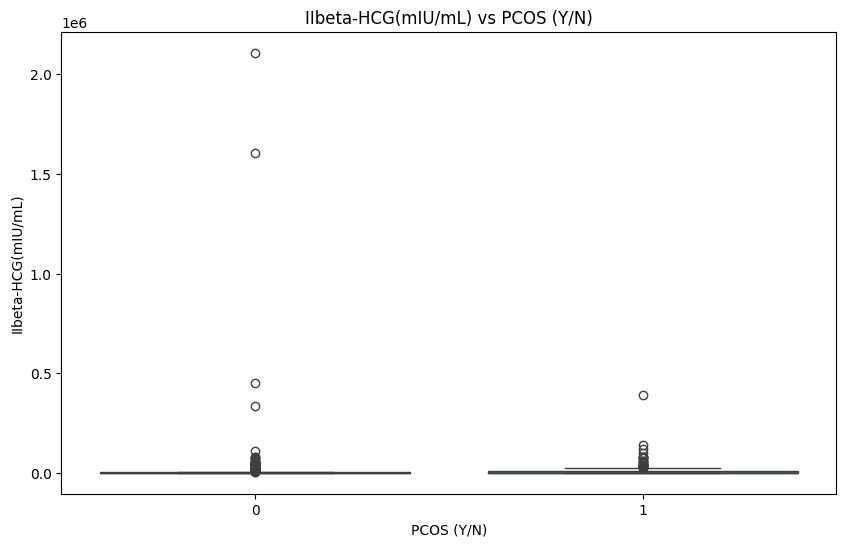

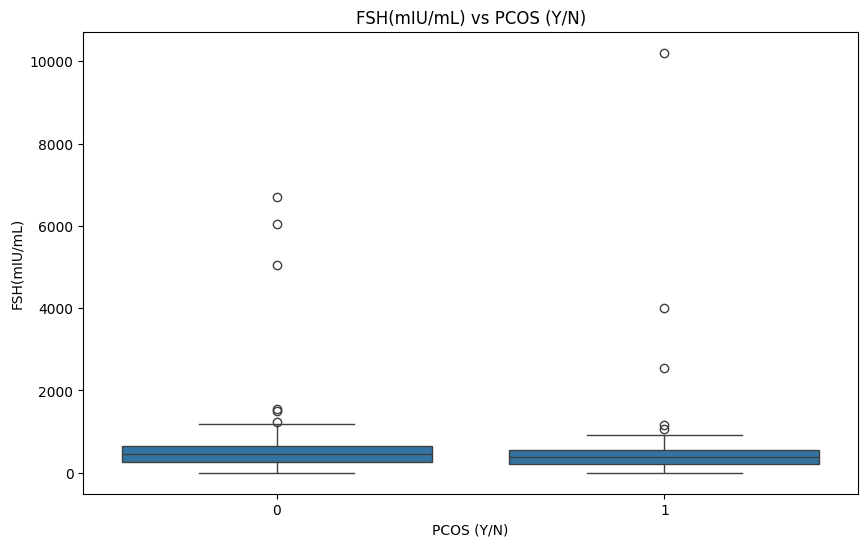

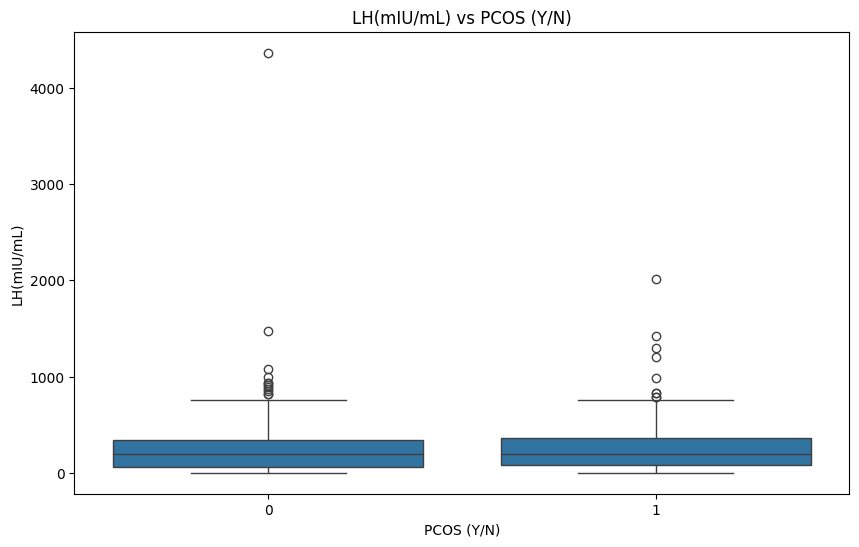

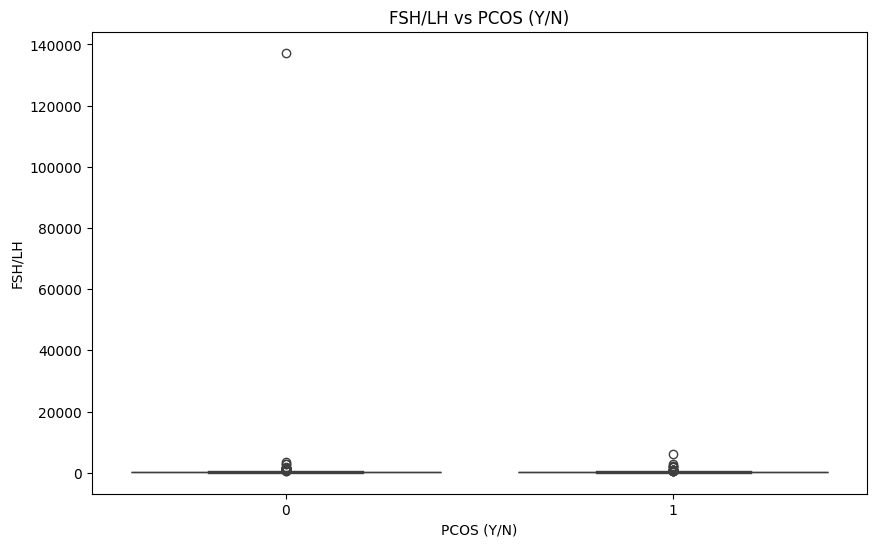

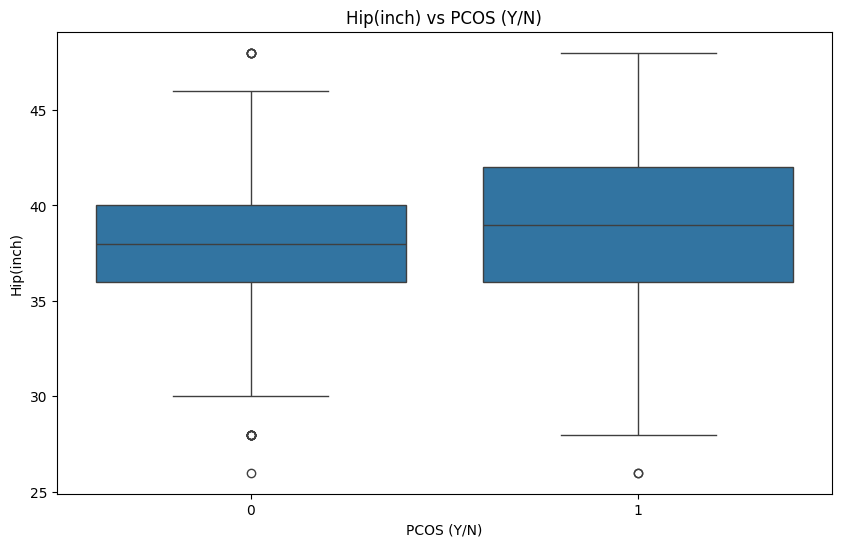

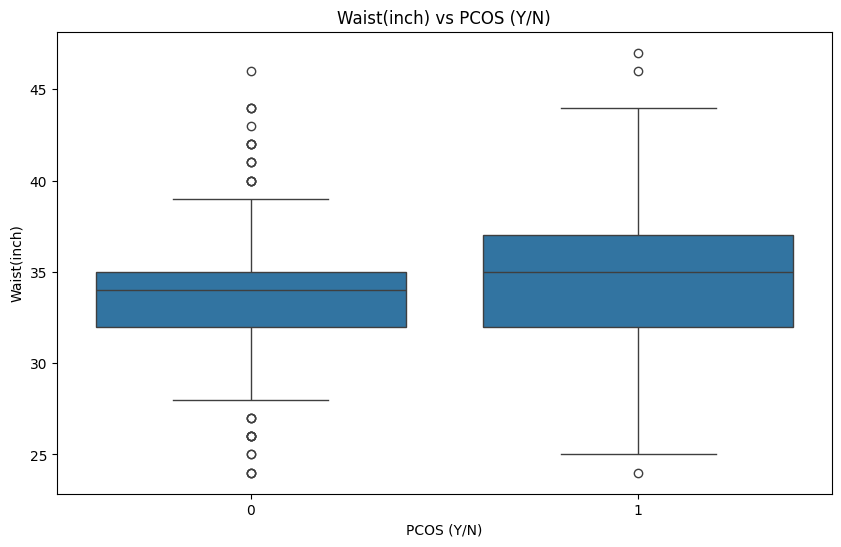

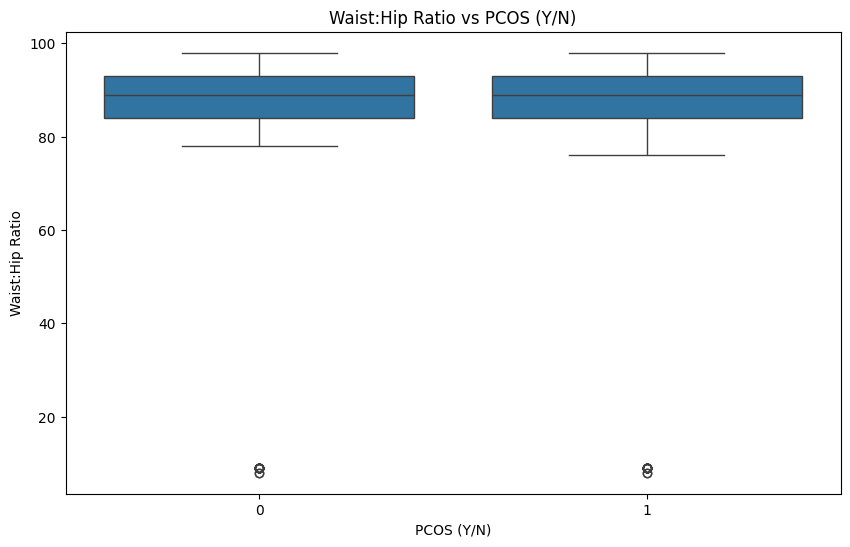

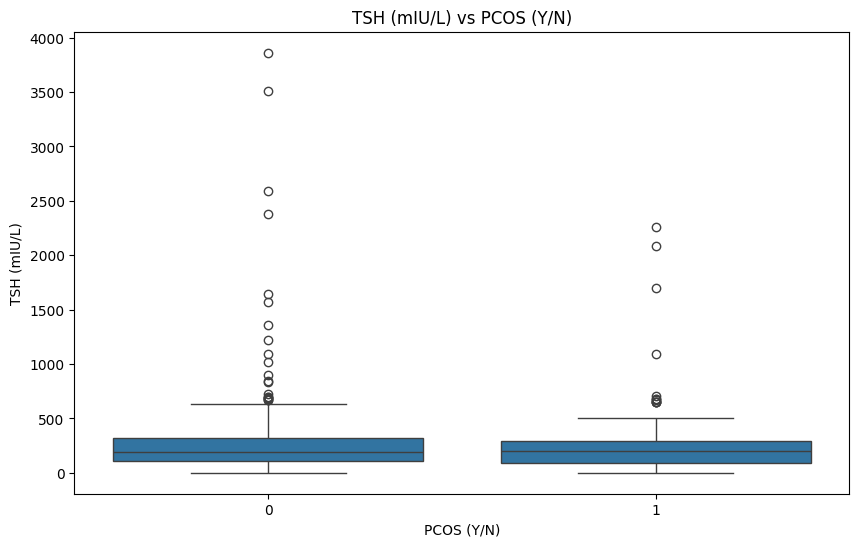

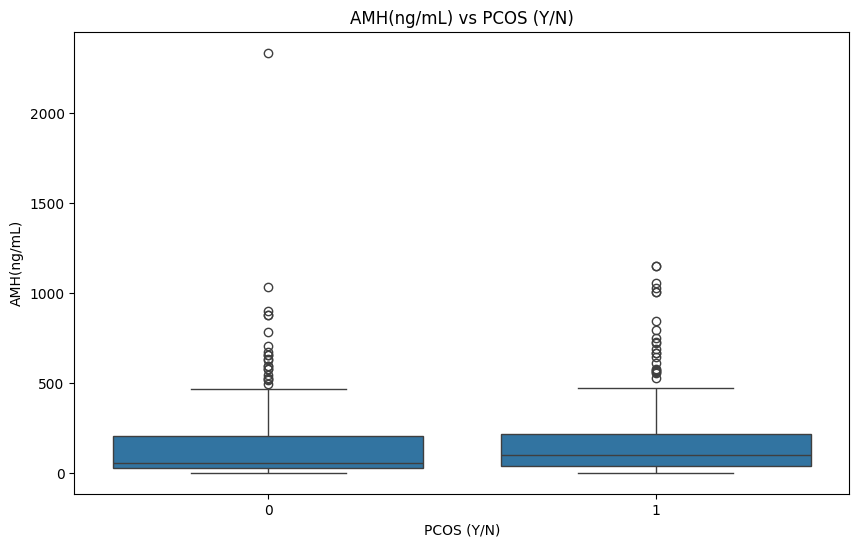

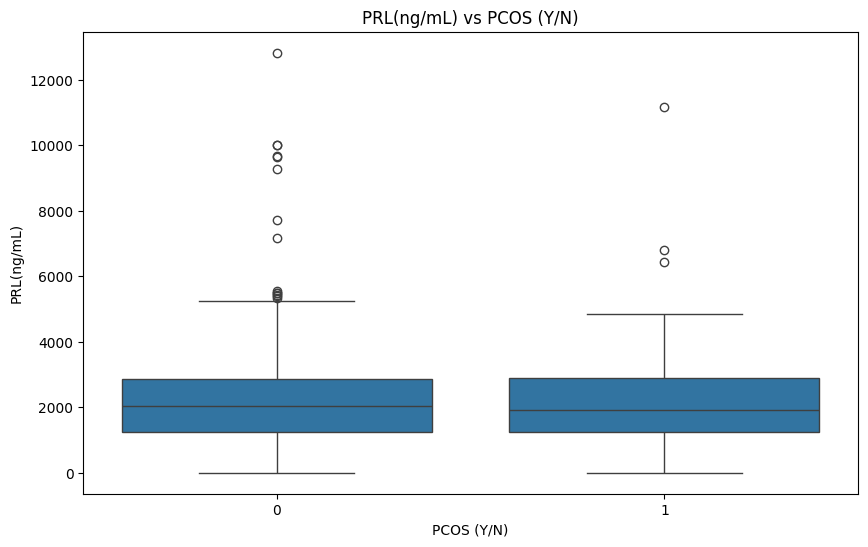

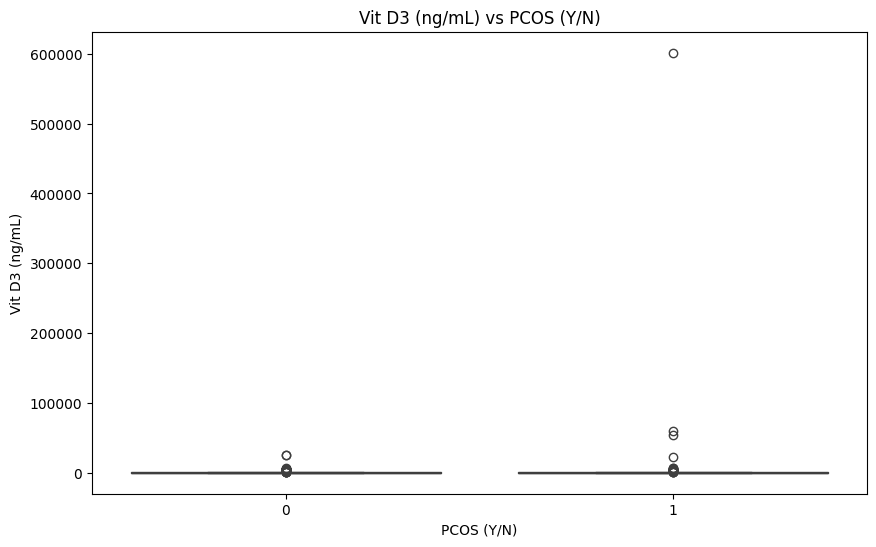

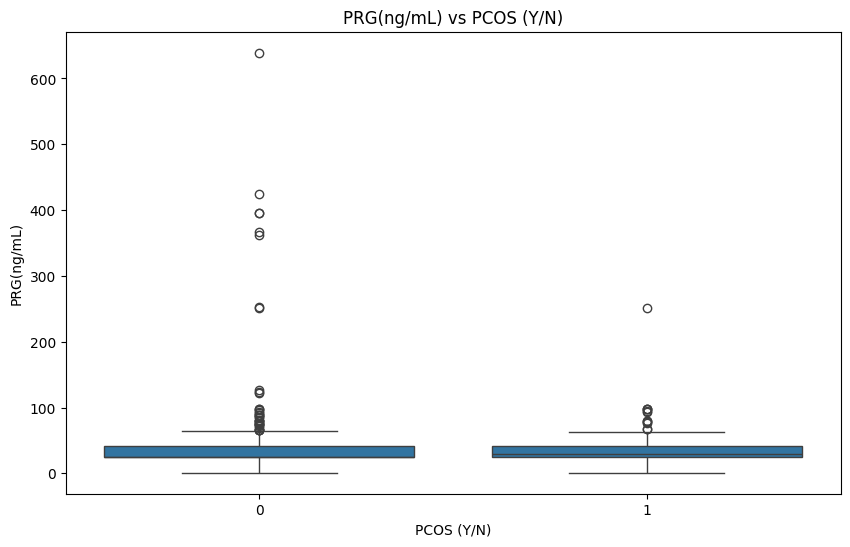

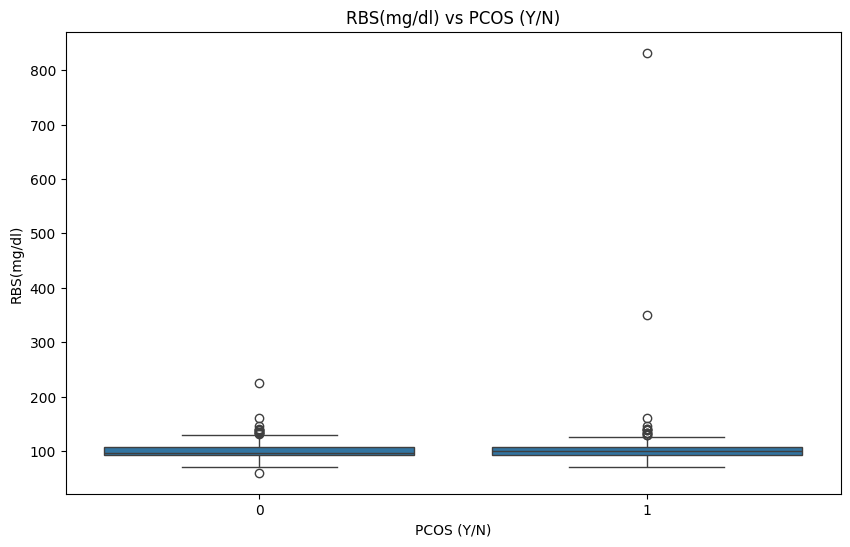

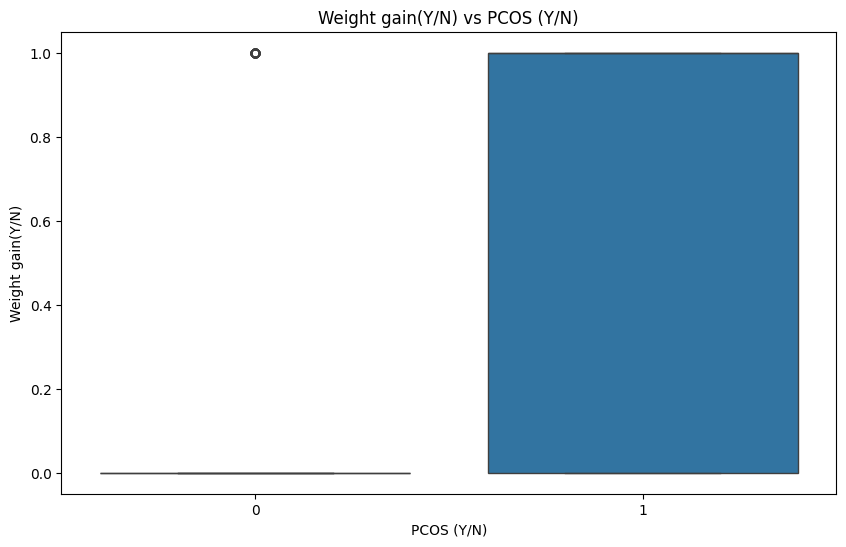

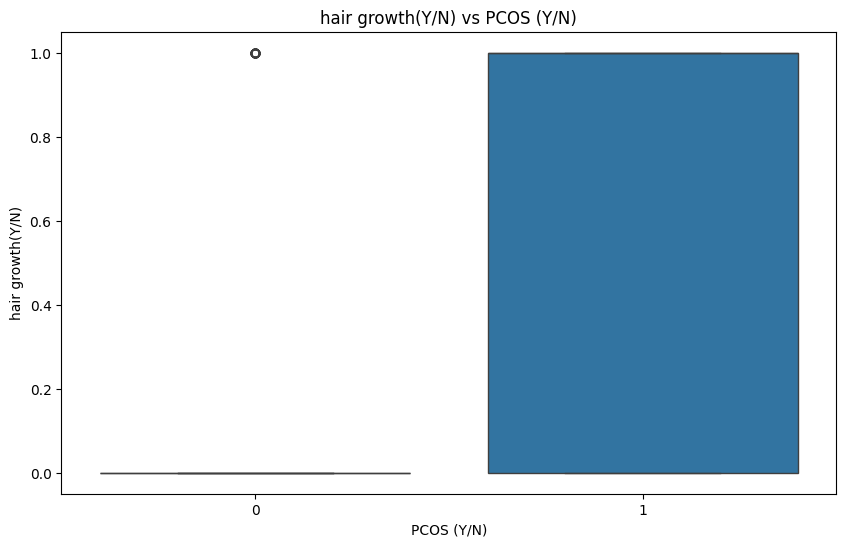

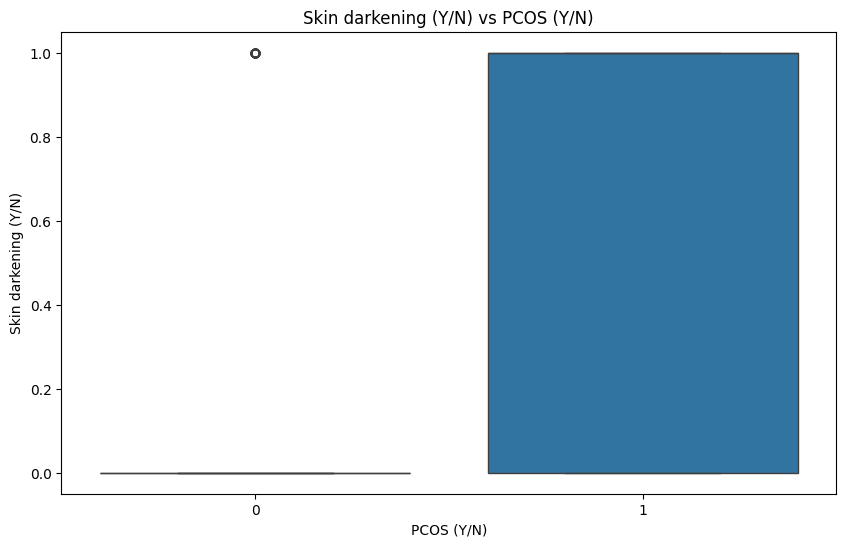

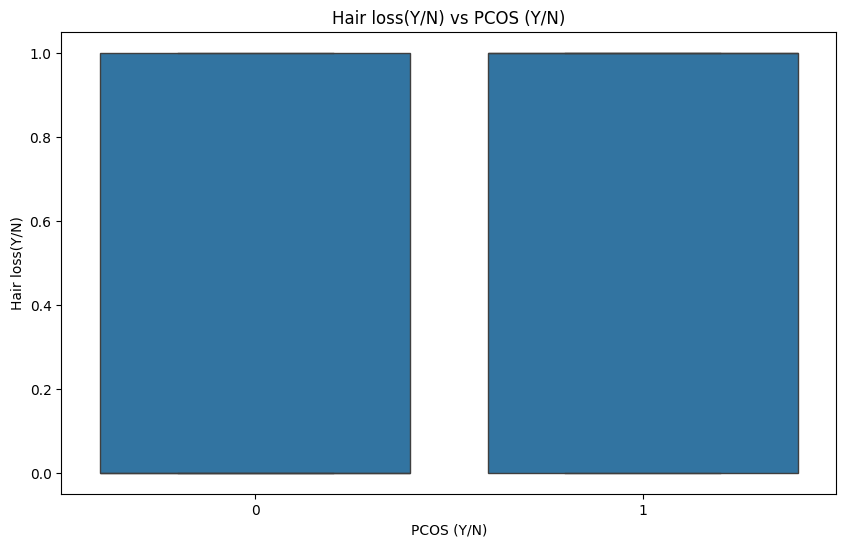

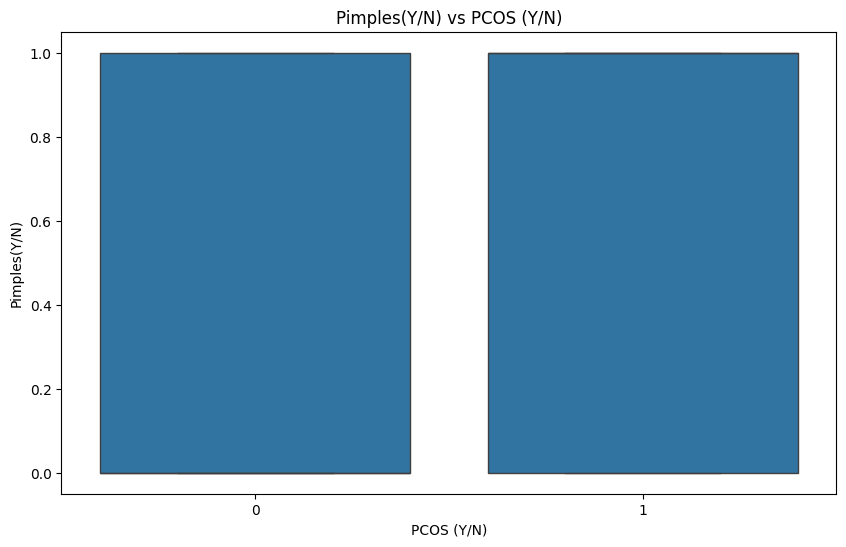

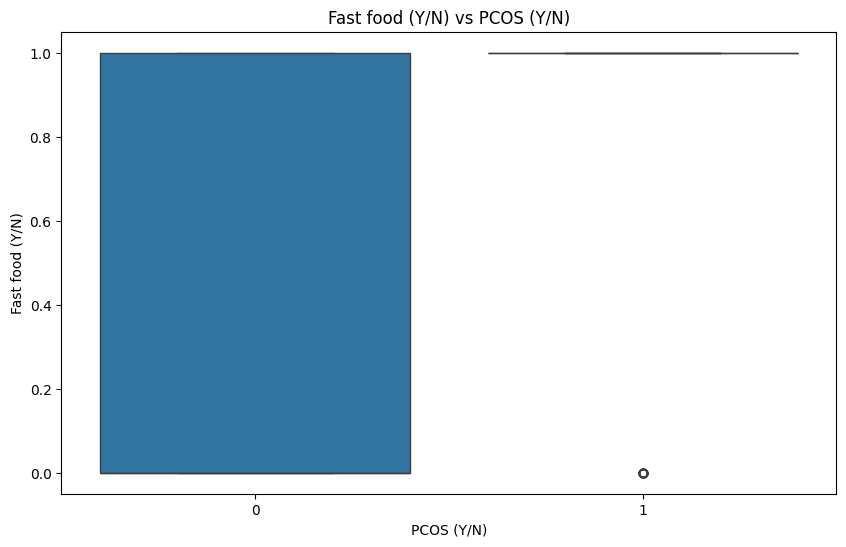

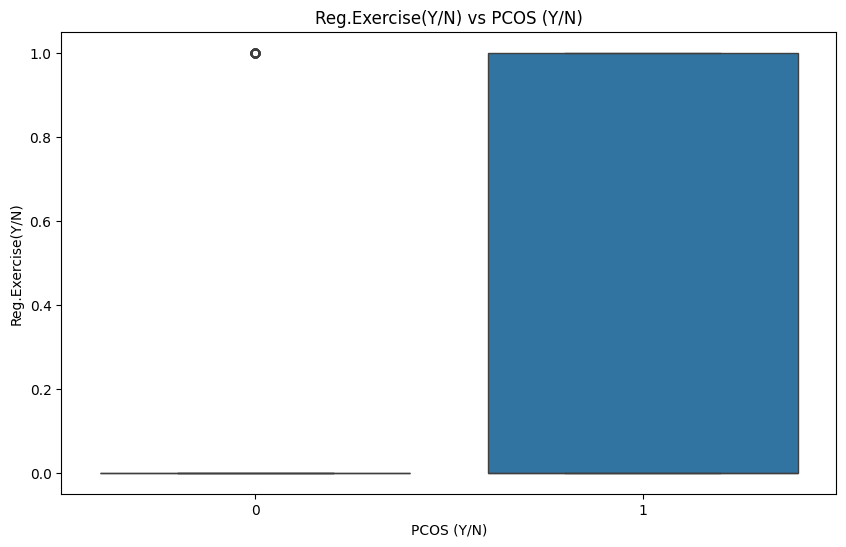

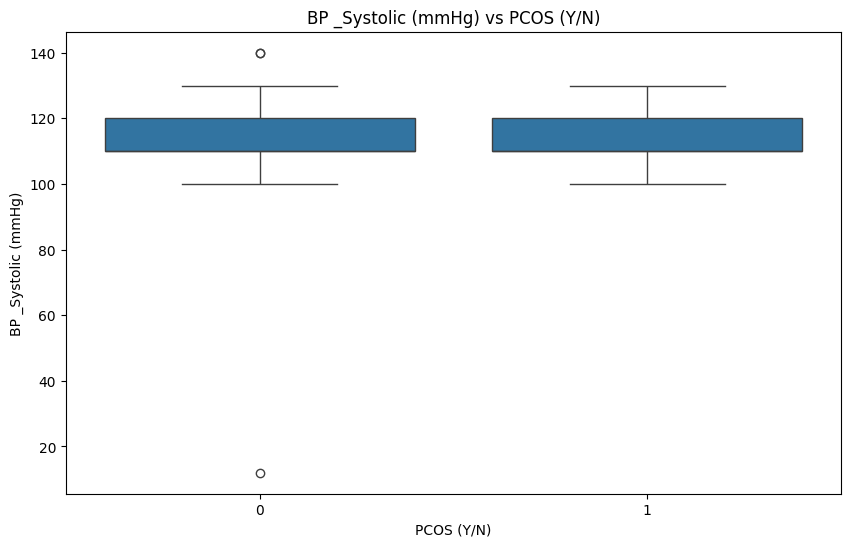

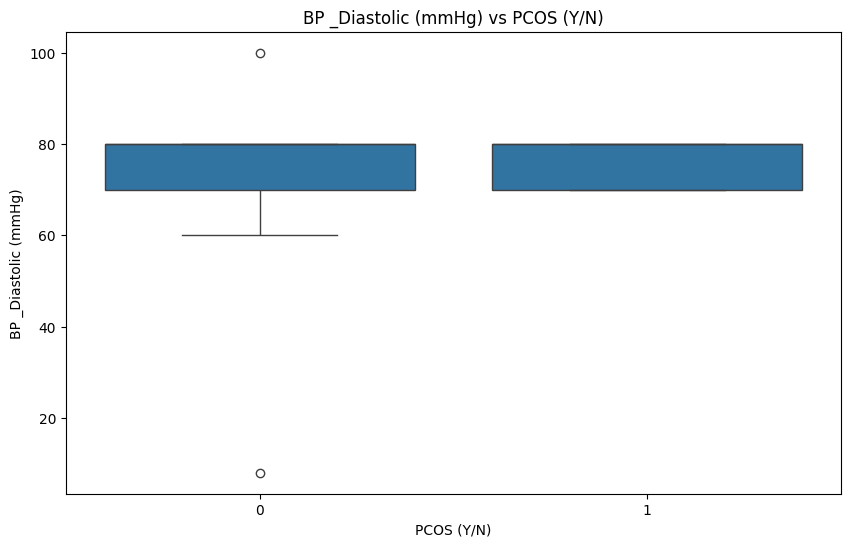

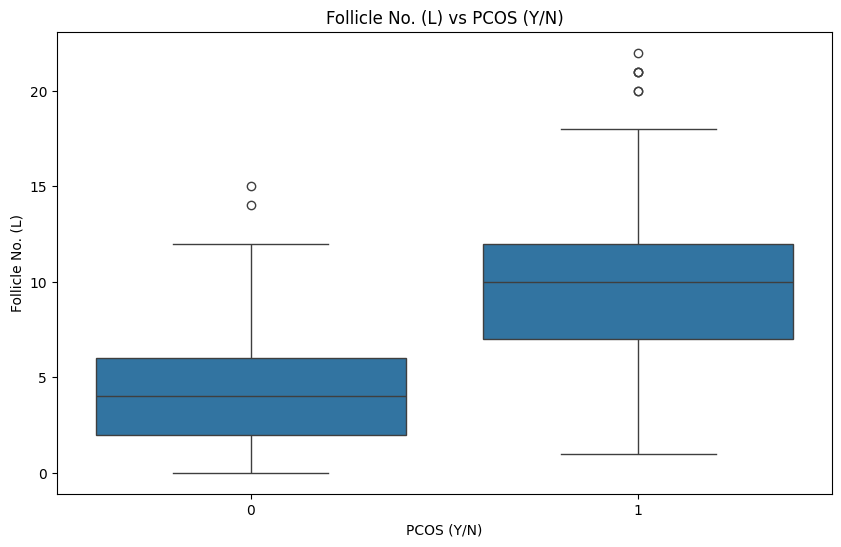

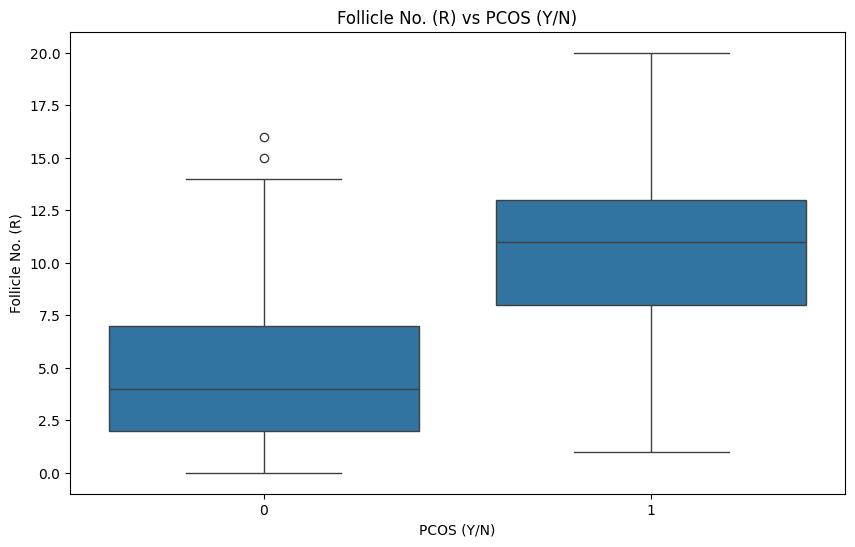

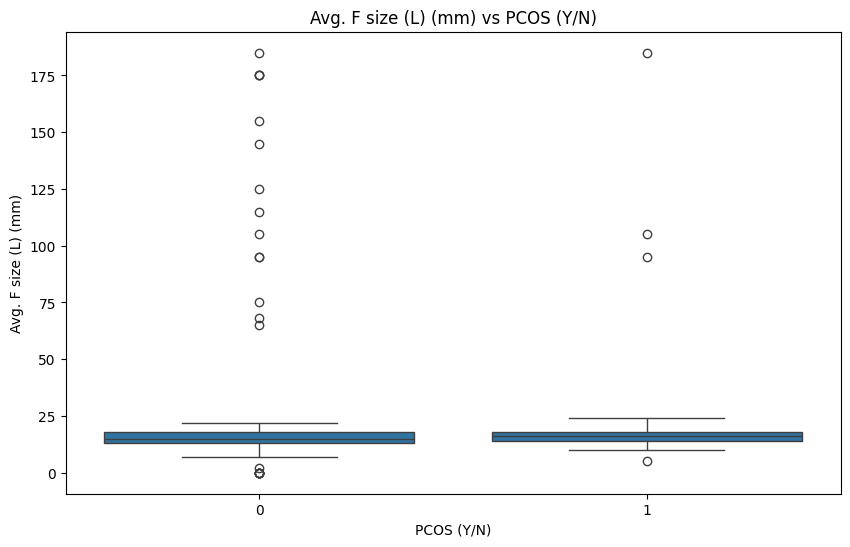

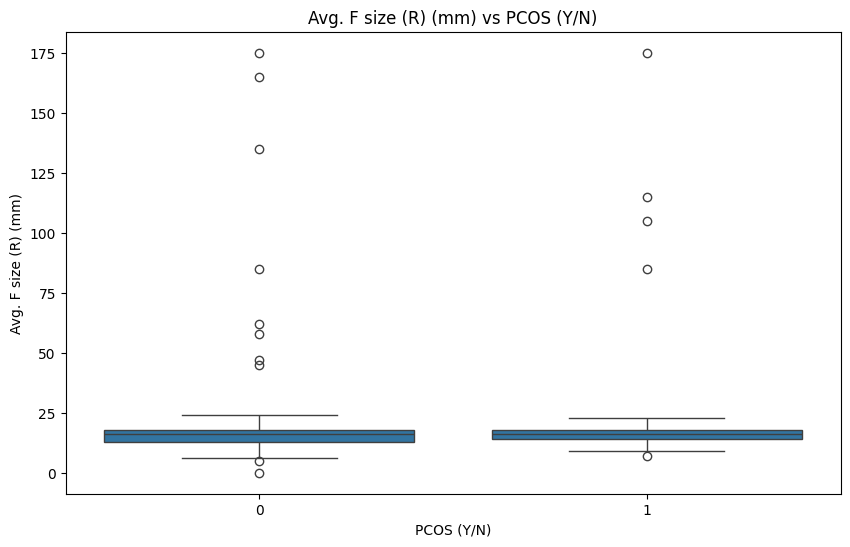

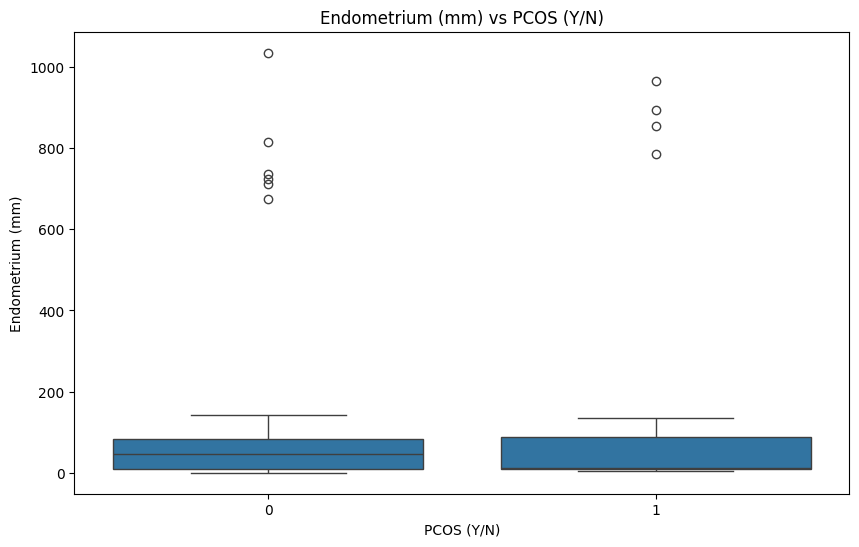

In [12]:
# Boxplot numerik vs target
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='PCOS (Y/N)', y=feature, data=df)
    plt.title(f'{feature} vs PCOS (Y/N)')
    plt.show()

## Boxplot outlier

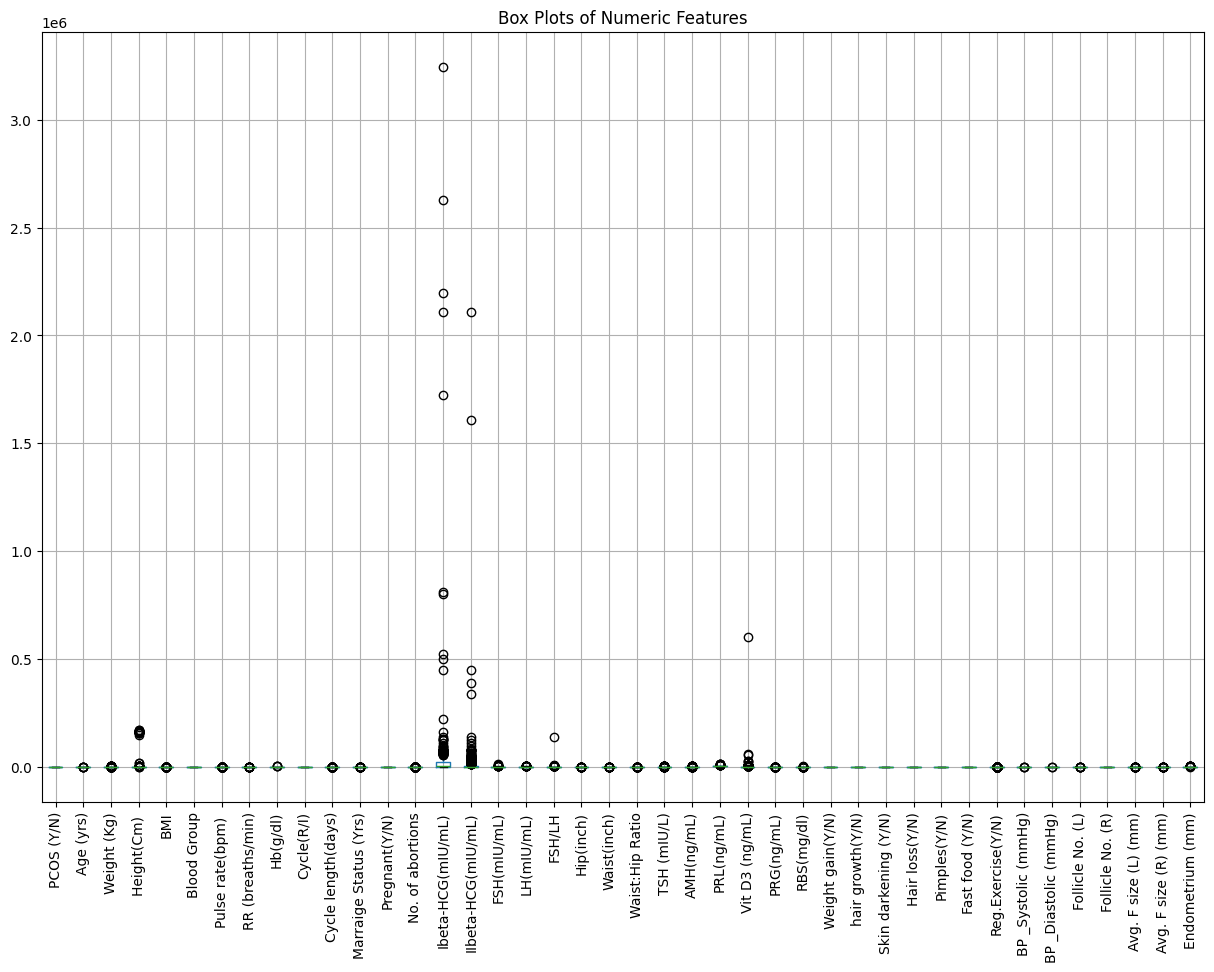

In [13]:
# Box plot untuk mendeteksi outlier pada variabel numerik
plt.figure(figsize=(15, 10))
df[numeric_features].boxplot()
plt.title('Box Plots of Numeric Features')
plt.xticks(rotation=90)
plt.show()

In [14]:
# Hitung jumlah missing values
missing_values = df.isnull().sum()

# Hitung persentase missing values
missing_percentage = 100 * df.isnull().sum() / len(df)

# Gabungkan informasi missing values
missing_table = pd.concat([missing_values, missing_percentage], axis=1, keys=['Total', 'Percent'])

print(missing_table)

                       Total   Percent
PCOS (Y/N)                 0  0.000000
Age (yrs)                  0  0.000000
Weight (Kg)                0  0.000000
Height(Cm)                 0  0.000000
BMI                        0  0.000000
Blood Group                0  0.000000
Pulse rate(bpm)            0  0.000000
RR (breaths/min)           0  0.000000
Hb(g/dl)                   0  0.000000
Cycle(R/I)                 0  0.000000
Cycle length(days)         0  0.000000
Marraige Status (Yrs)      1  0.184843
Pregnant(Y/N)              0  0.000000
No. of abortions           0  0.000000
Ibeta-HCG(mIU/mL)          0  0.000000
IIbeta-HCG(mIU/mL)         0  0.000000
FSH(mIU/mL)                0  0.000000
LH(mIU/mL)                 0  0.000000
FSH/LH                     0  0.000000
Hip(inch)                  0  0.000000
Waist(inch)                0  0.000000
Waist:Hip Ratio            0  0.000000
TSH (mIU/L)                0  0.000000
AMH(ng/mL)                 1  0.184843
PRL(ng/mL)               

In [15]:
# Hitung jumlah duplikat
duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates}")

# Tampilkan beberapa baris duplikat (jika ada)
if duplicates > 0:
    print("\nContoh baris duplikat:")
    print(df[df.duplicated(keep=False)].head(10))

Jumlah baris duplikat: 0


## Handling outlier

In [16]:
# Cek missing values
print("Missing values sebelum pembersihan:")
print(df.isnull().sum())

# Menangani missing values
for column in df.columns:
    if df[column].dtype == 'object':
        # Untuk kolom kategorikal, isi dengan modus
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        # Untuk kolom numerik, isi dengan median
        df[column].fillna(df[column].median(), inplace=True)

print("\nMissing values setelah pembersihan:")
print(df.isnull().sum())

Missing values sebelum pembersihan:
PCOS (Y/N)               0
Age (yrs)                0
Weight (Kg)              0
Height(Cm)               0
BMI                      0
Blood Group              0
Pulse rate(bpm)          0
RR (breaths/min)         0
Hb(g/dl)                 0
Cycle(R/I)               0
Cycle length(days)       0
Marraige Status (Yrs)    1
Pregnant(Y/N)            0
No. of abortions         0
Ibeta-HCG(mIU/mL)        0
IIbeta-HCG(mIU/mL)       0
FSH(mIU/mL)              0
LH(mIU/mL)               0
FSH/LH                   0
Hip(inch)                0
Waist(inch)              0
Waist:Hip Ratio          0
TSH (mIU/L)              0
AMH(ng/mL)               1
PRL(ng/mL)               0
Vit D3 (ng/mL)           0
PRG(ng/mL)               0
RBS(mg/dl)               0
Weight gain(Y/N)         0
hair growth(Y/N)         0
Skin darkening (Y/N)     0
Hair loss(Y/N)           0
Pimples(Y/N)             0
Fast food (Y/N)          1
Reg.Exercise(Y/N)        0
BP _Systolic (mmHg)

<ipython-input-16-aa6978263c5f>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)


## Handling Oultier

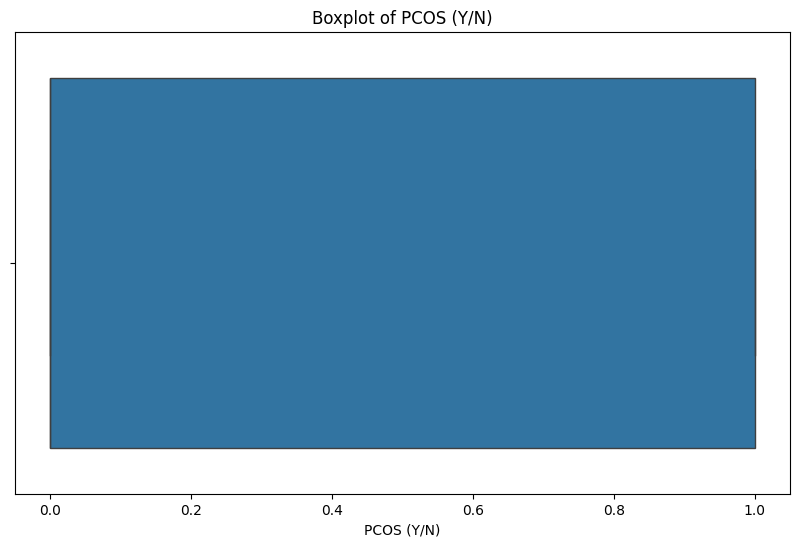

Outliers pada PCOS (Y/N) sudah dihandel.


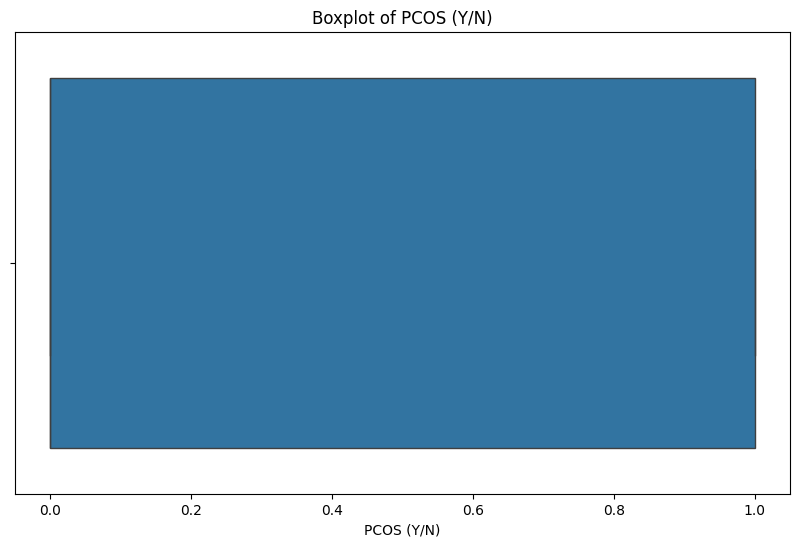

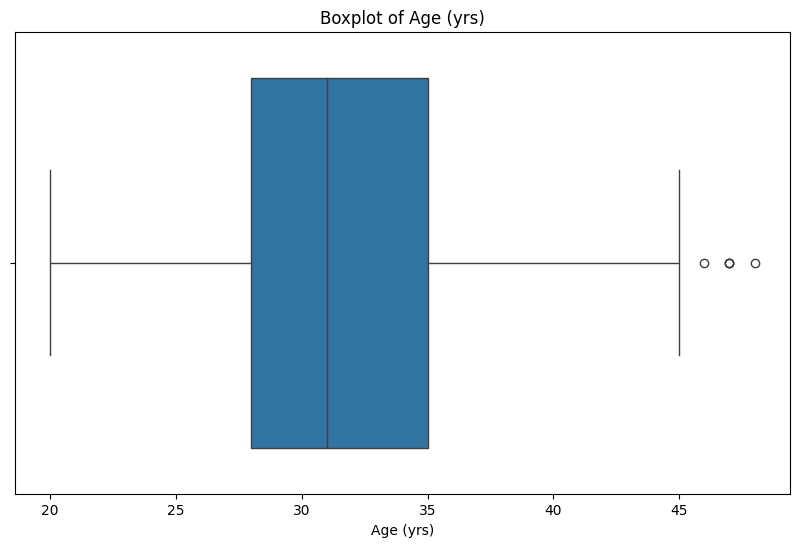

Outliers pada Age (yrs) sudah dihandel.


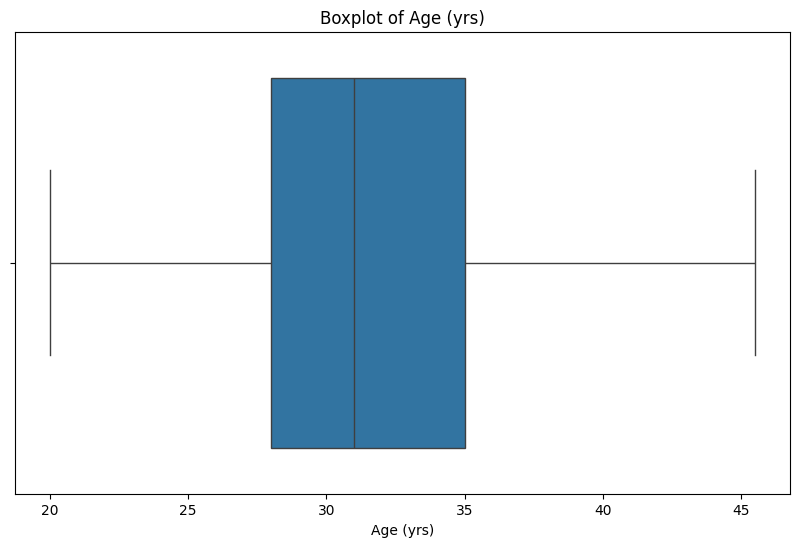

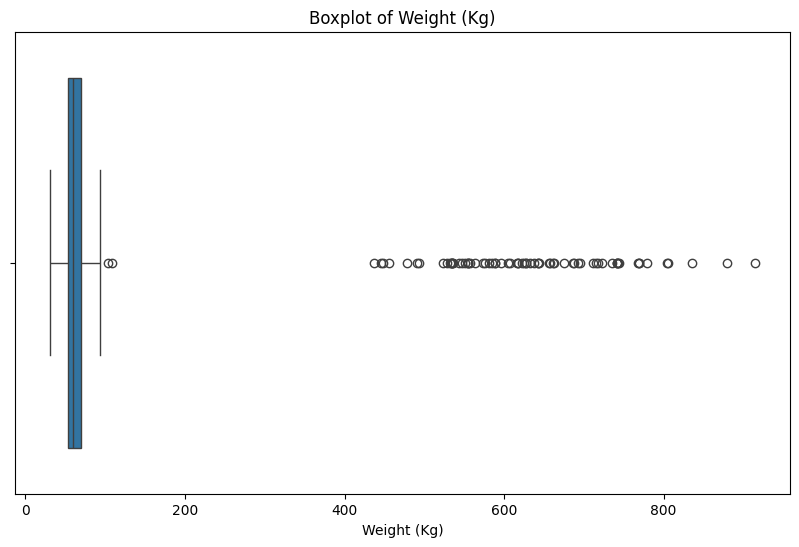

Outliers pada Weight (Kg) sudah dihandel.


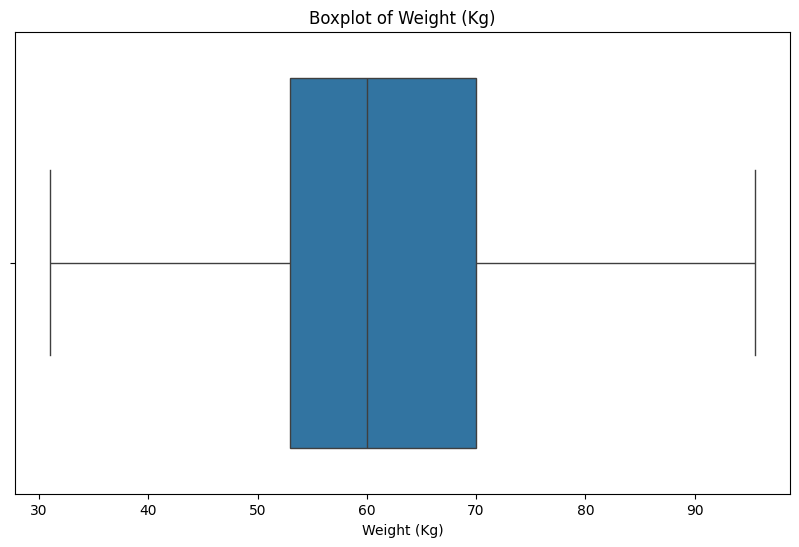

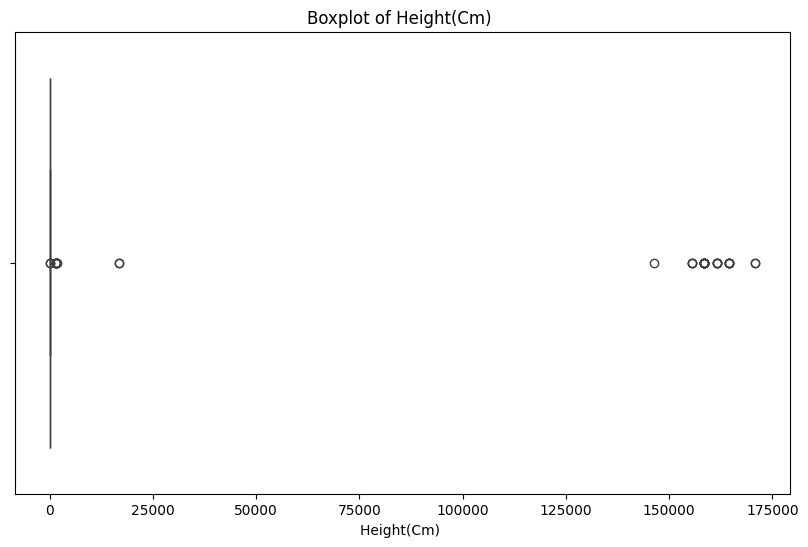

Outliers pada Height(Cm)  sudah dihandel.


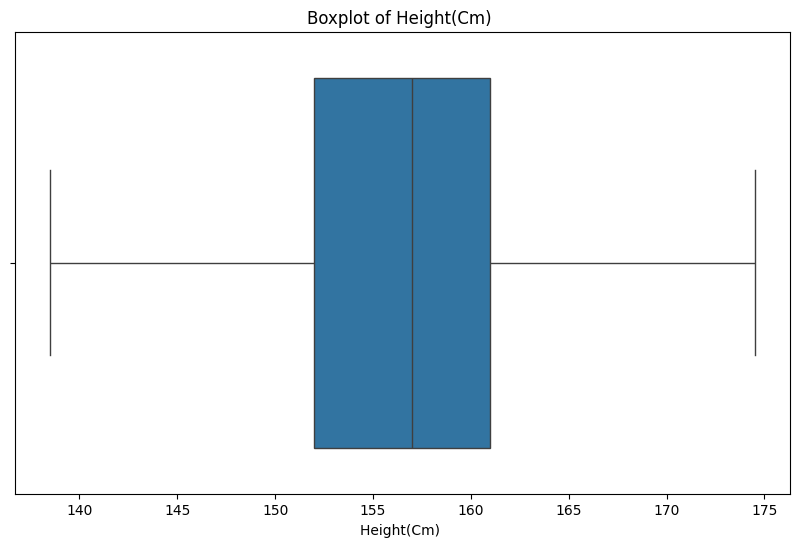

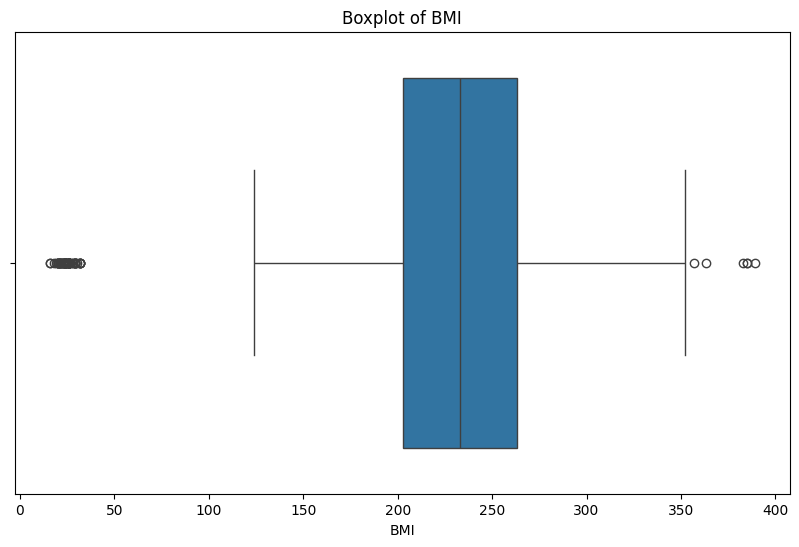

Outliers pada BMI sudah dihandel.


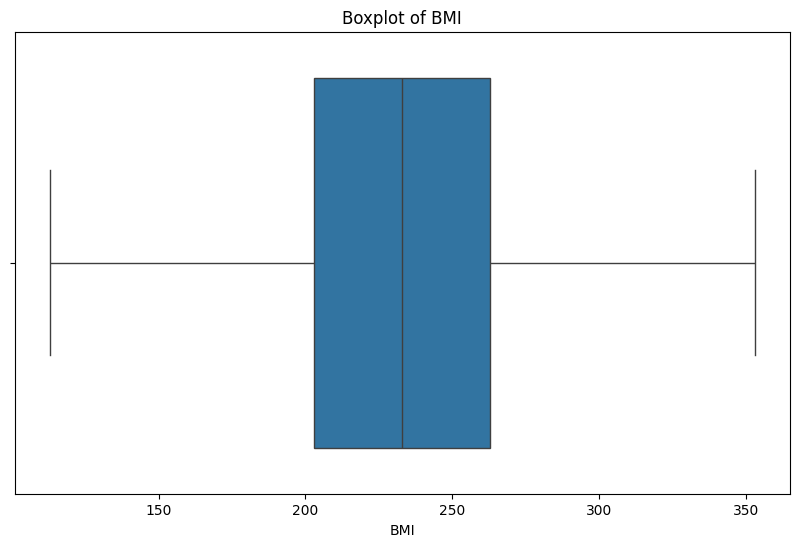

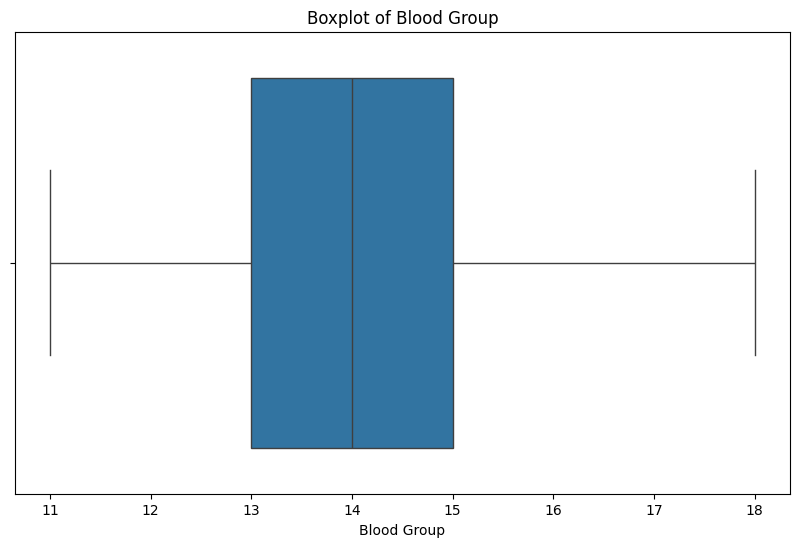

Outliers pada Blood Group sudah dihandel.


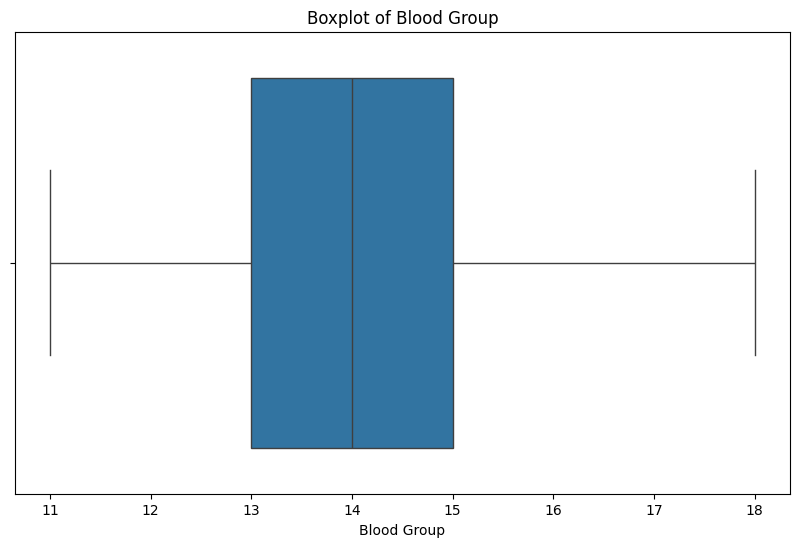

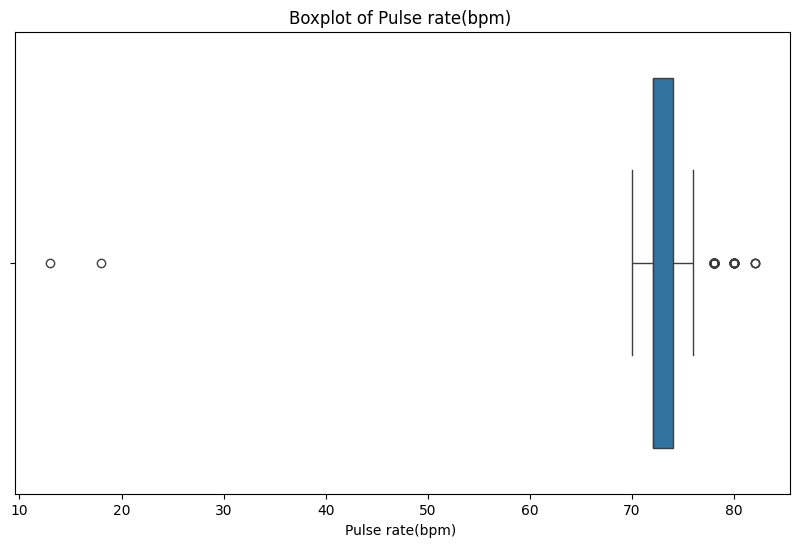

Outliers pada Pulse rate(bpm)  sudah dihandel.


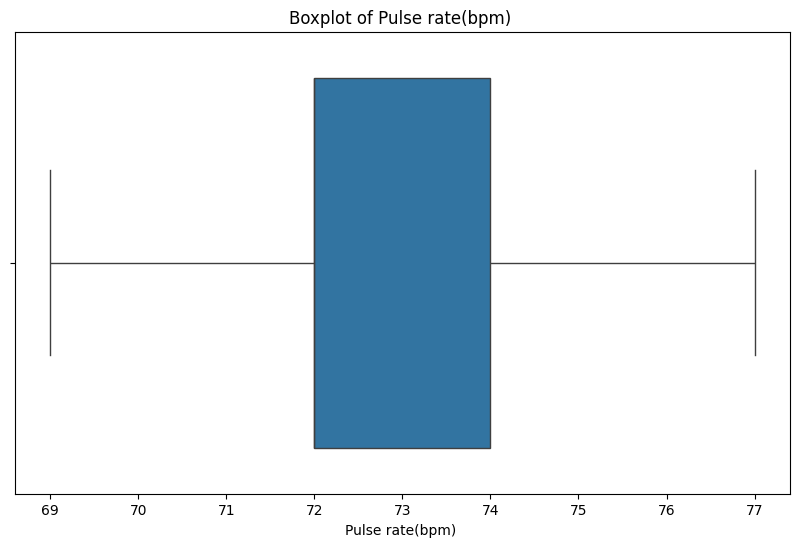

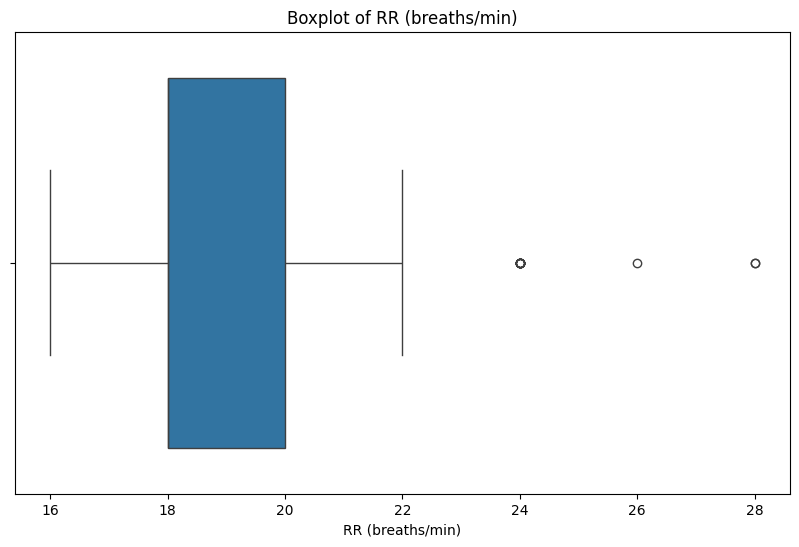

Outliers pada RR (breaths/min) sudah dihandel.


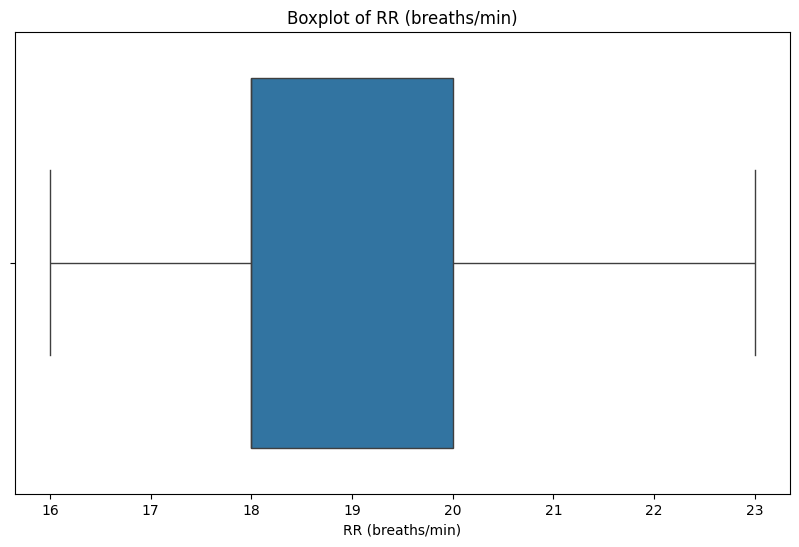

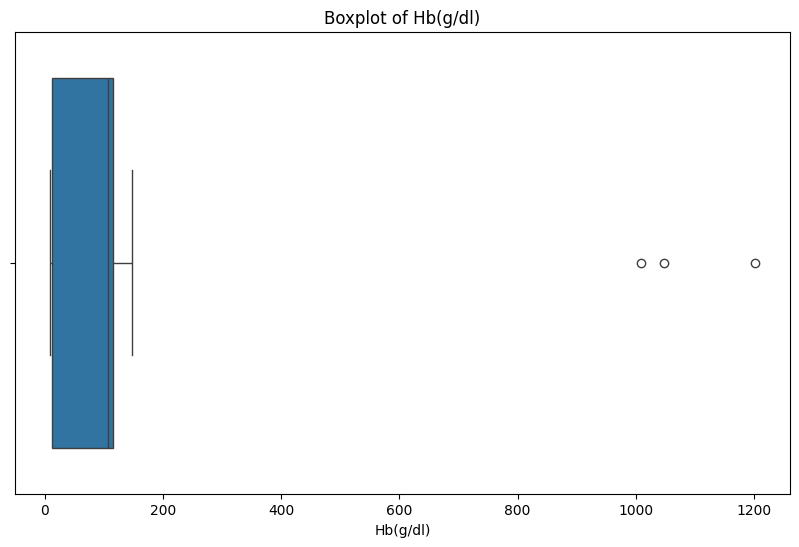

Outliers pada Hb(g/dl) sudah dihandel.


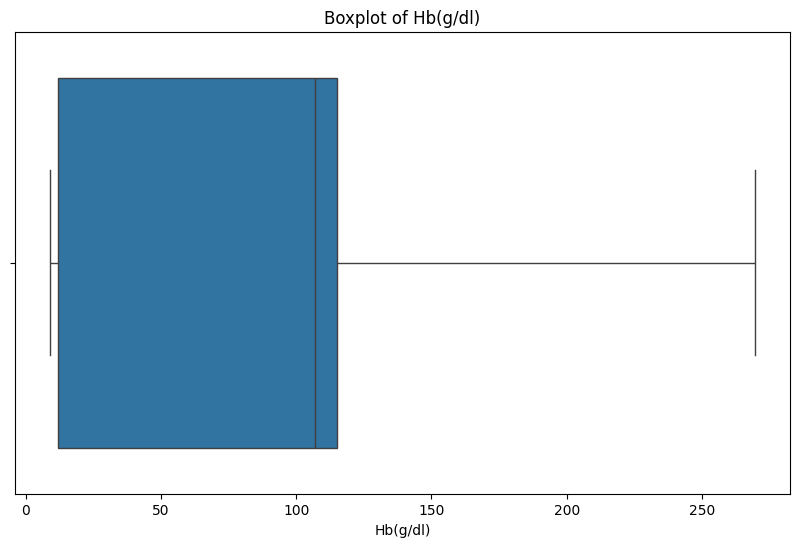

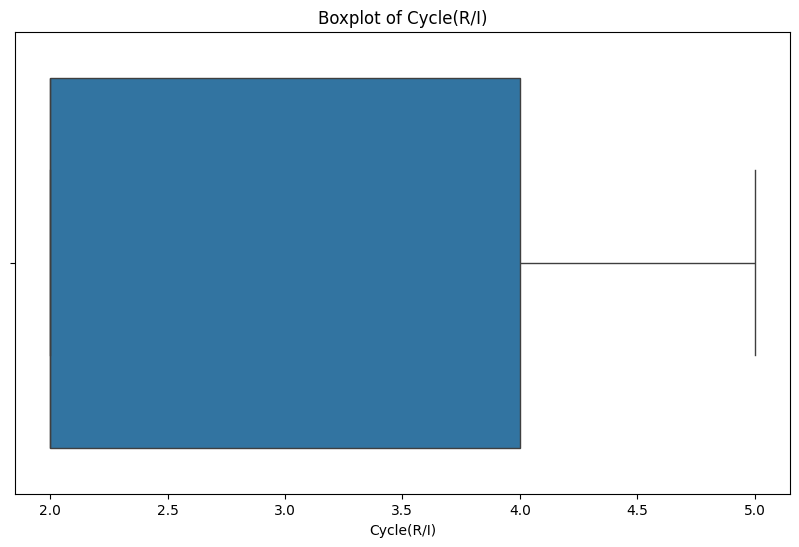

Outliers pada Cycle(R/I) sudah dihandel.


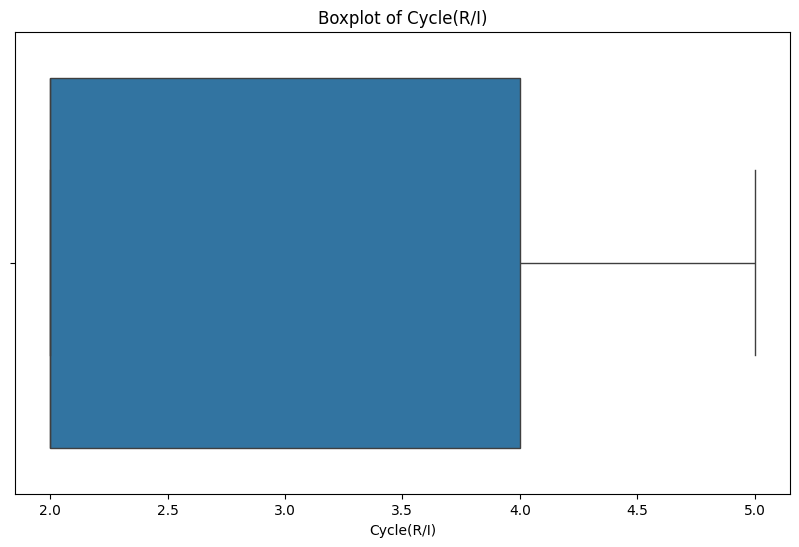

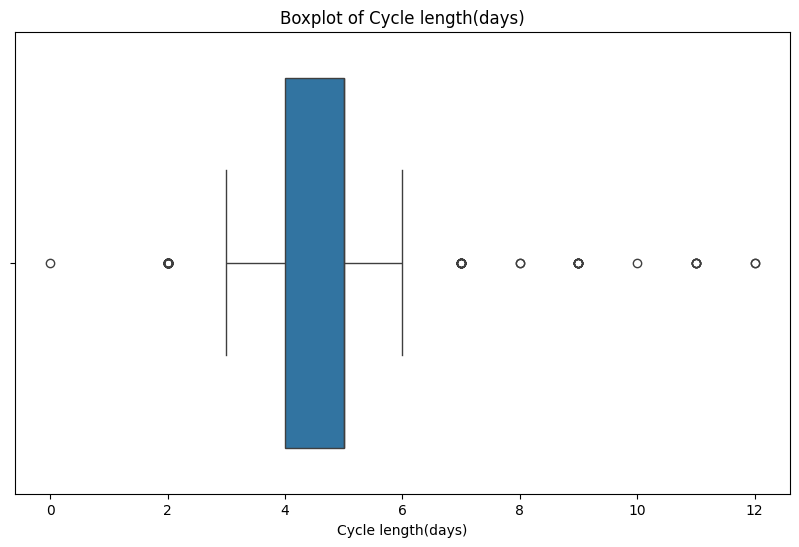

Outliers pada Cycle length(days) sudah dihandel.


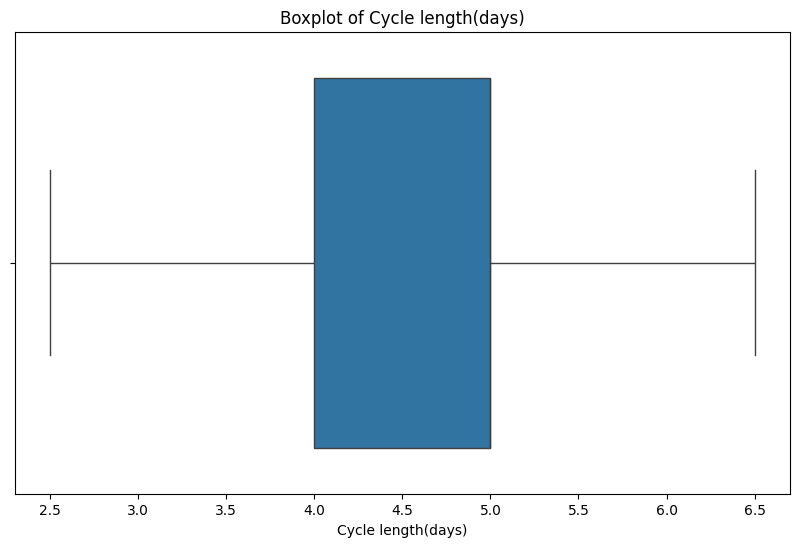

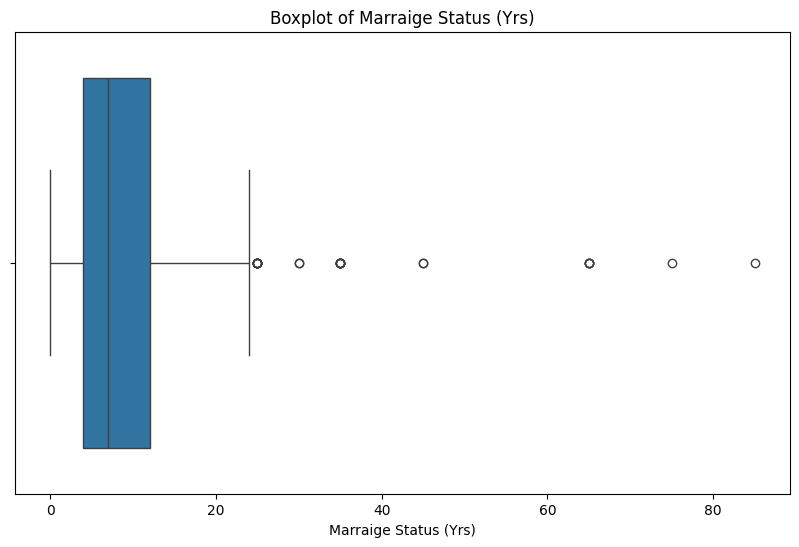

Outliers pada Marraige Status (Yrs) sudah dihandel.


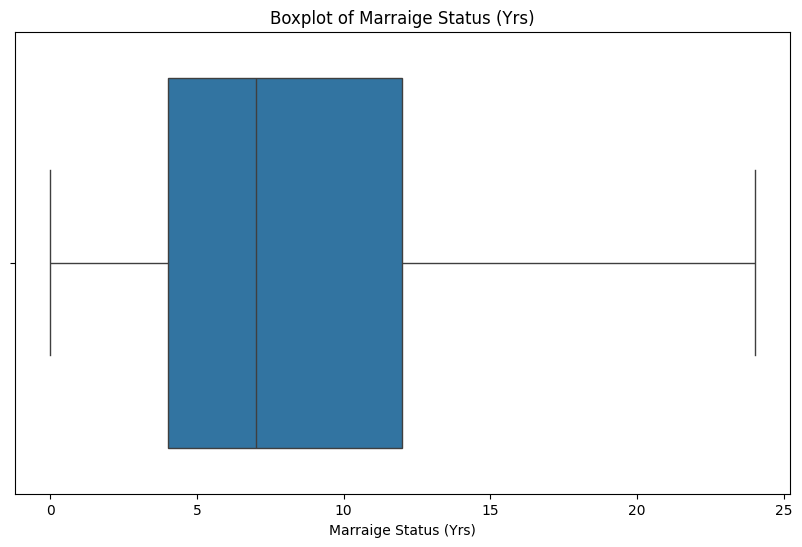

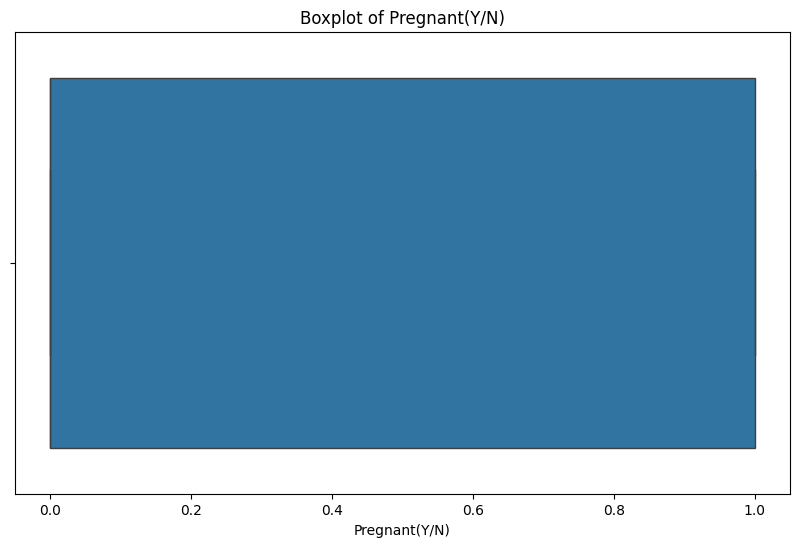

Outliers pada Pregnant(Y/N) sudah dihandel.


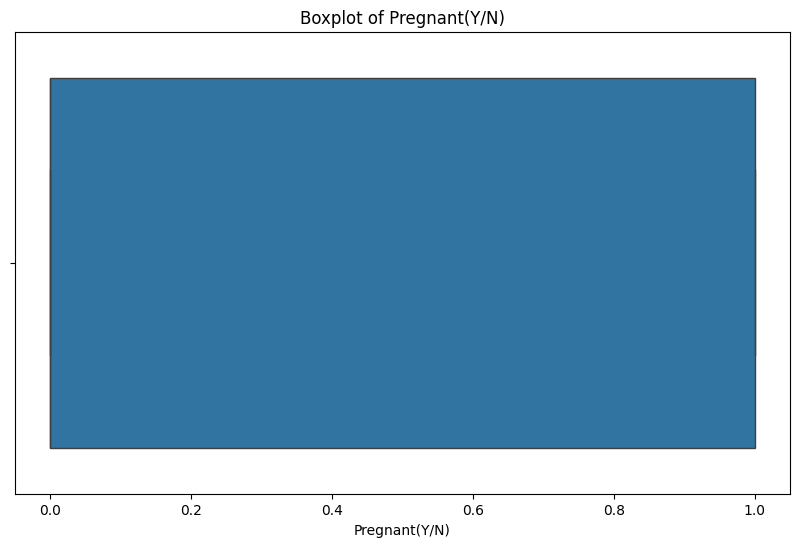

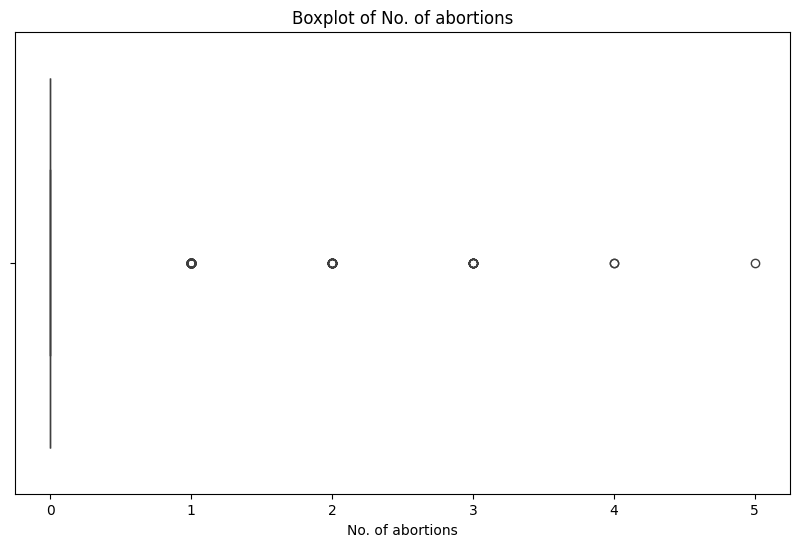

Outliers pada No. of abortions sudah dihandel.


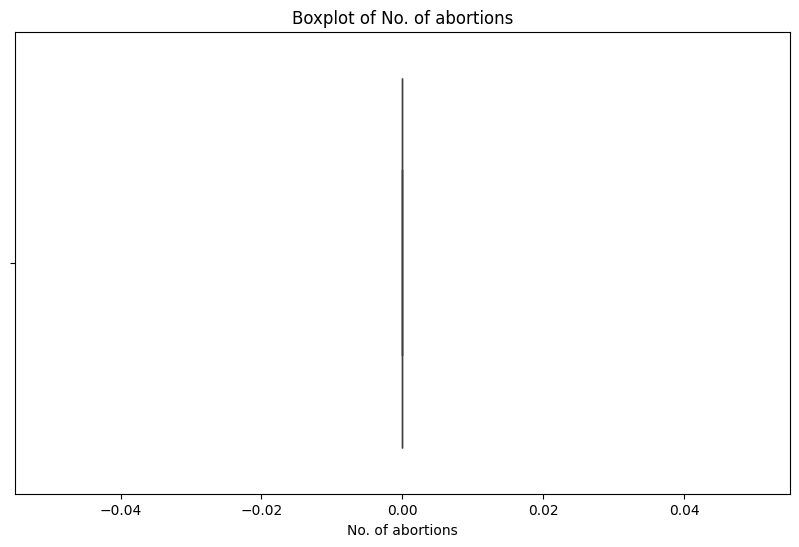

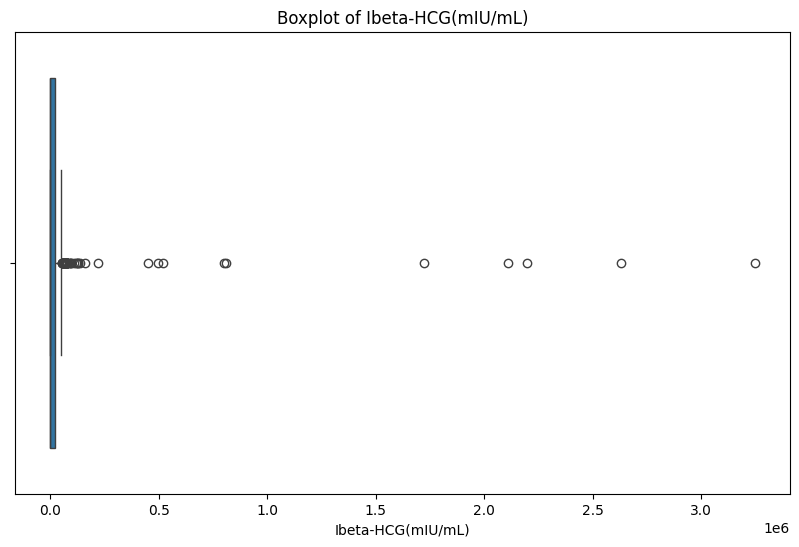

Outliers pada Ibeta-HCG(mIU/mL) sudah dihandel.


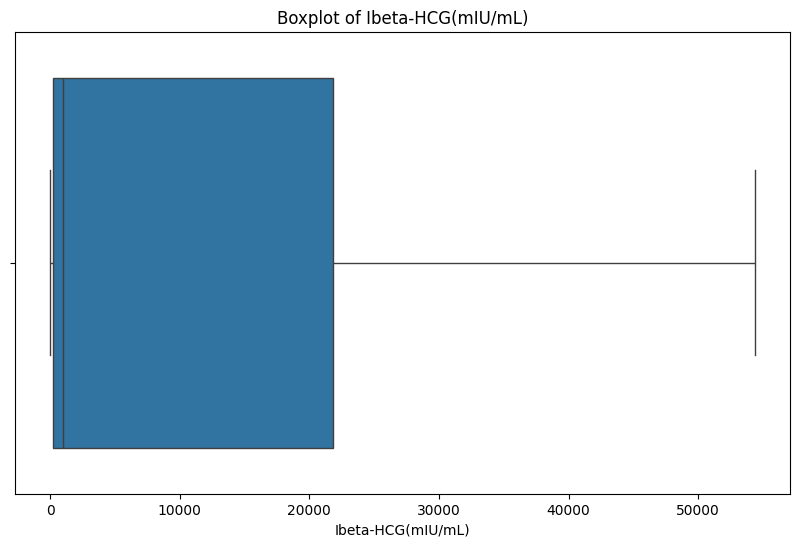

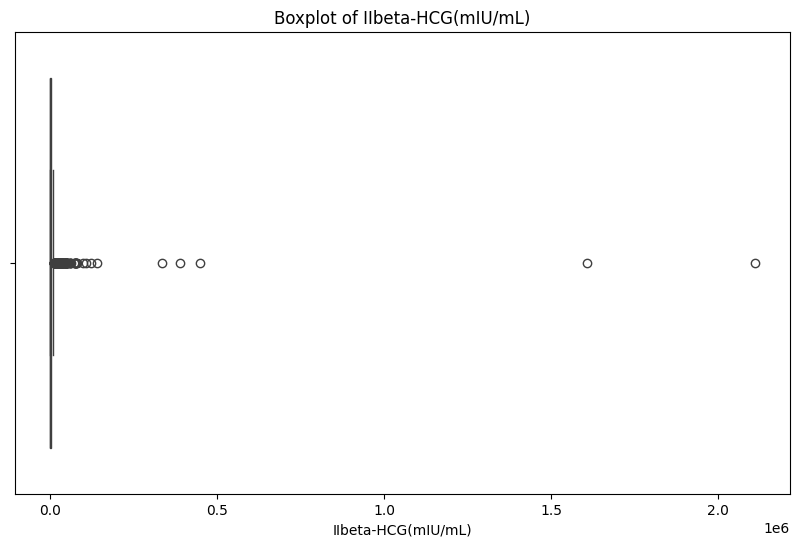

Outliers pada IIbeta-HCG(mIU/mL) sudah dihandel.


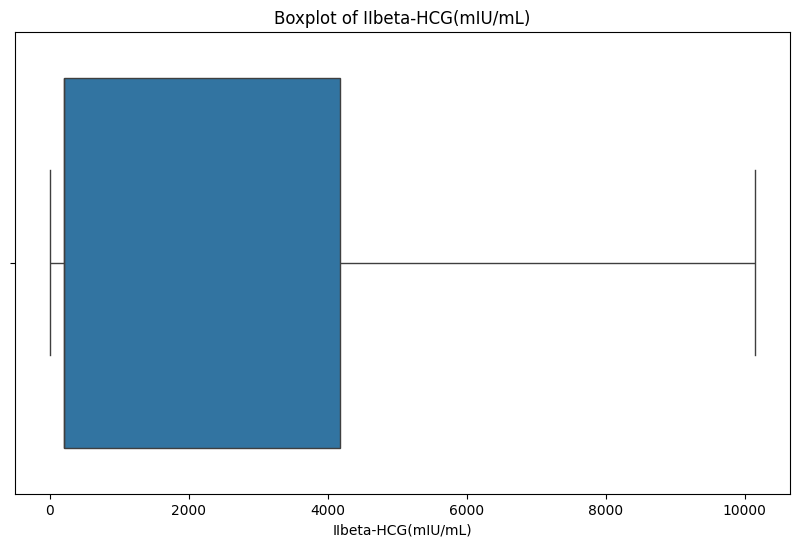

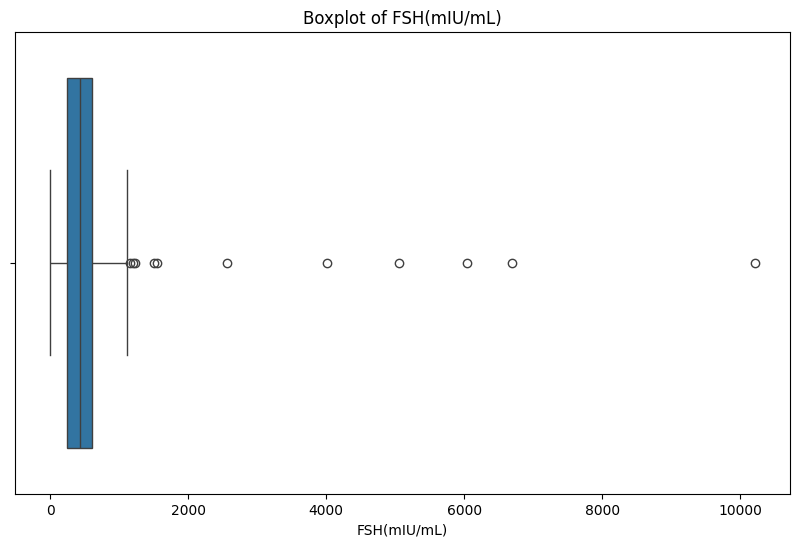

Outliers pada FSH(mIU/mL) sudah dihandel.


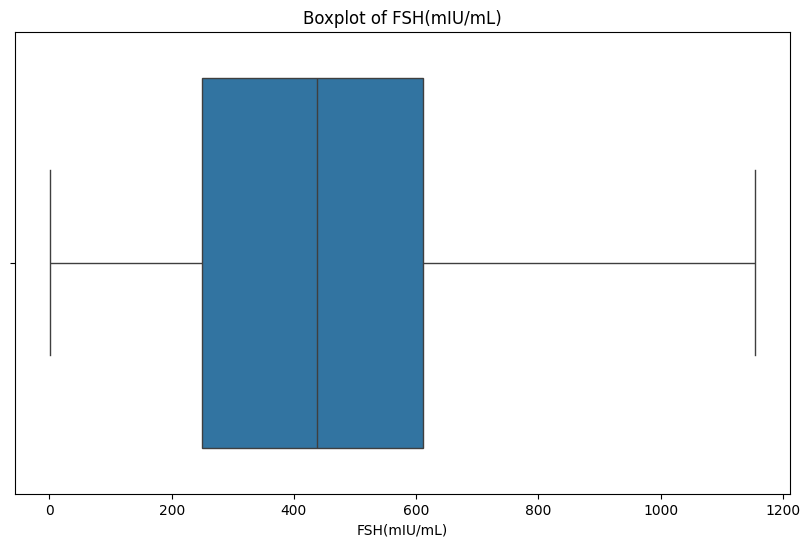

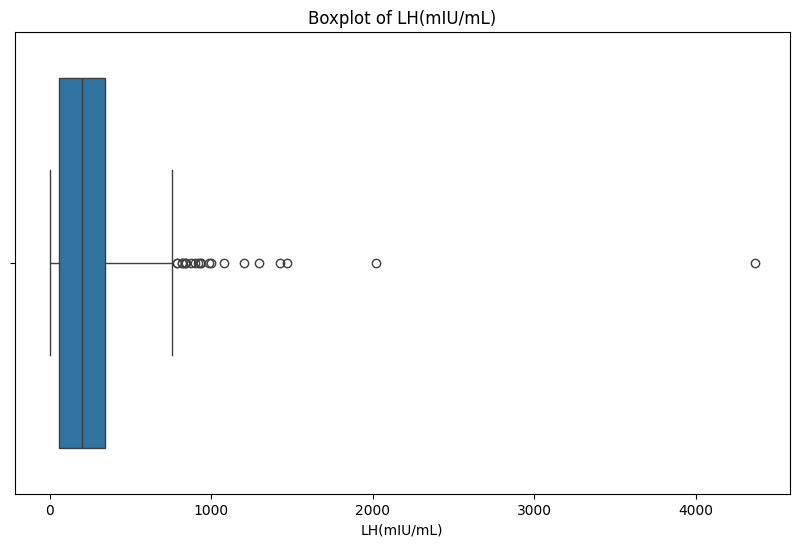

Outliers pada LH(mIU/mL) sudah dihandel.


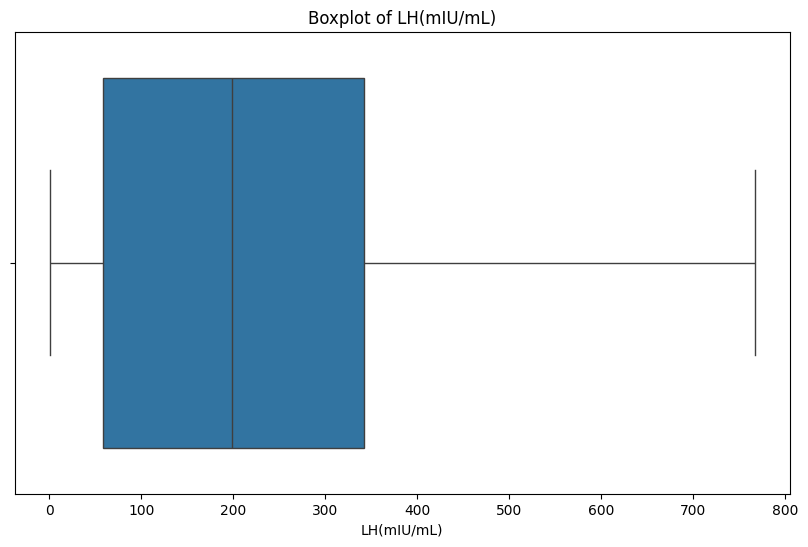

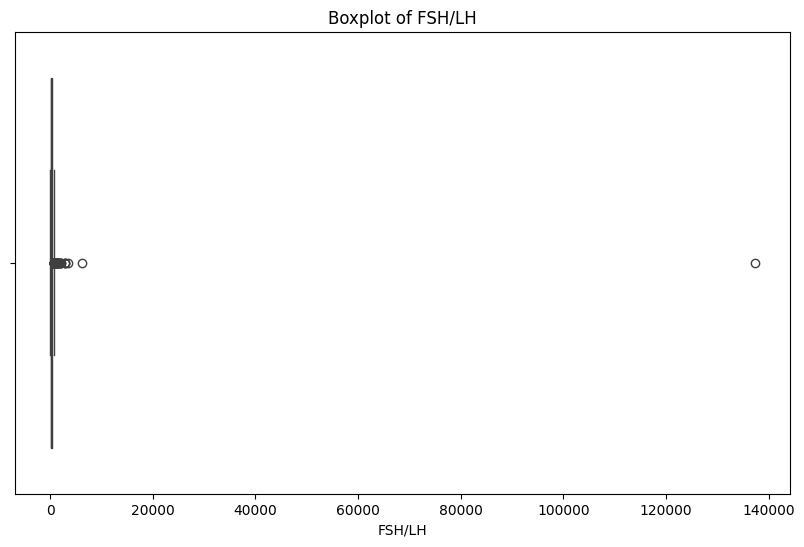

Outliers pada FSH/LH sudah dihandel.


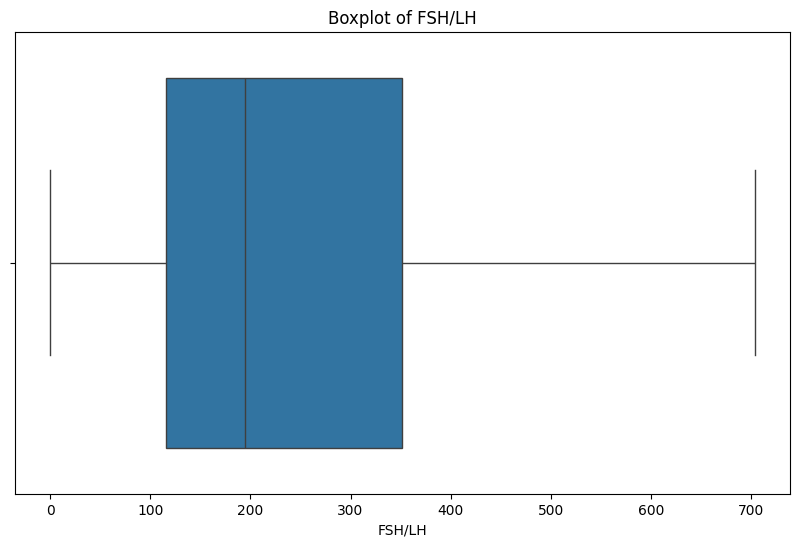

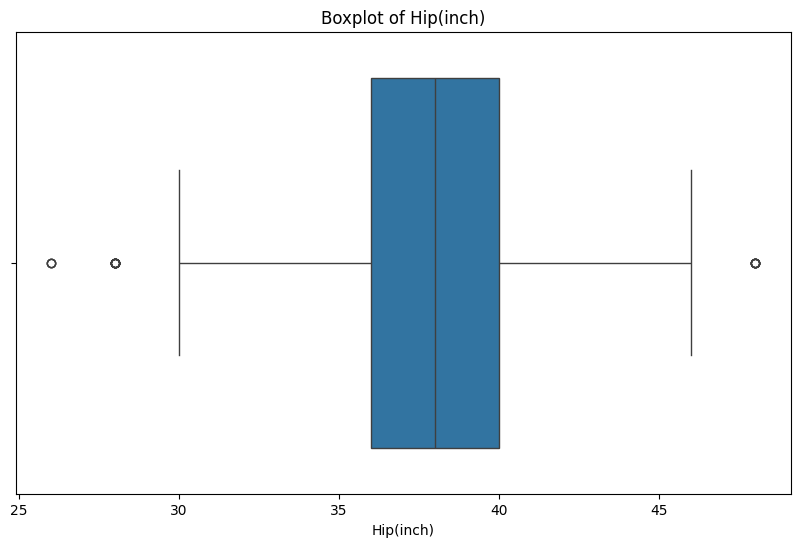

Outliers pada Hip(inch) sudah dihandel.


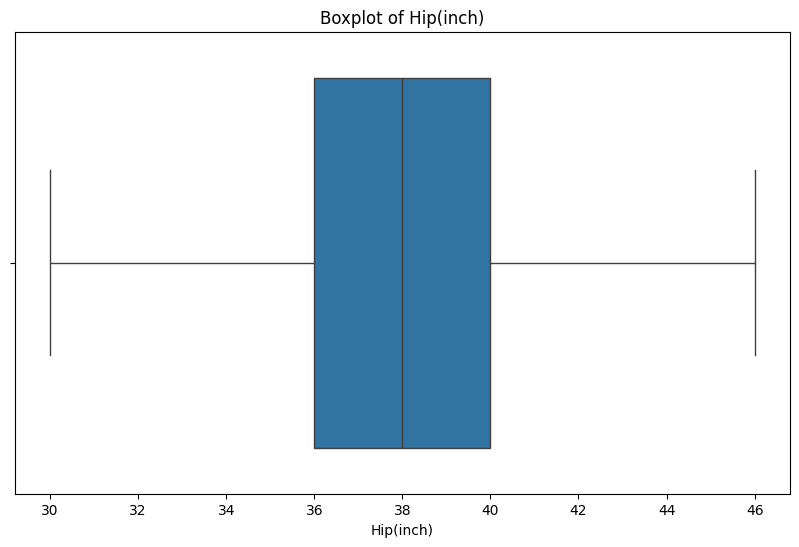

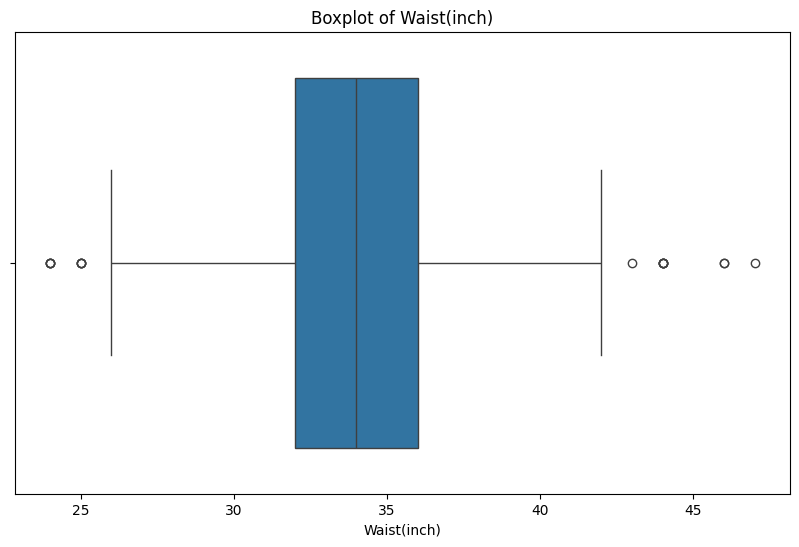

Outliers pada Waist(inch) sudah dihandel.


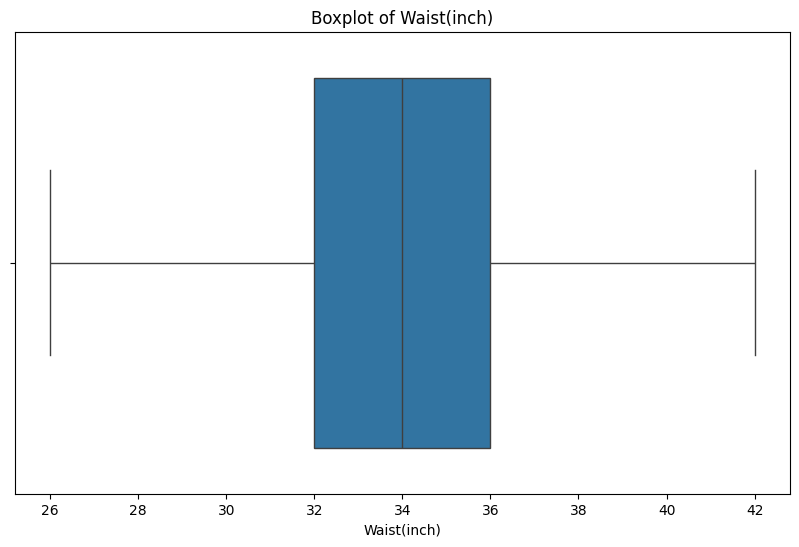

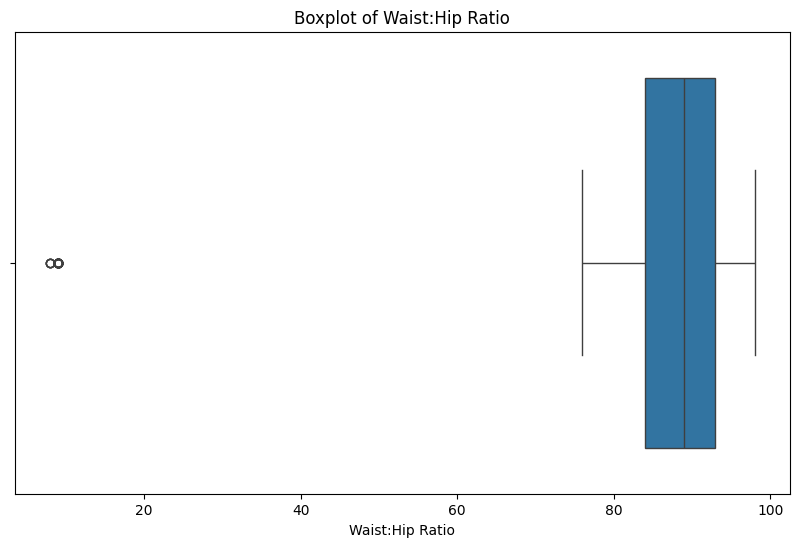

Outliers pada Waist:Hip Ratio sudah dihandel.


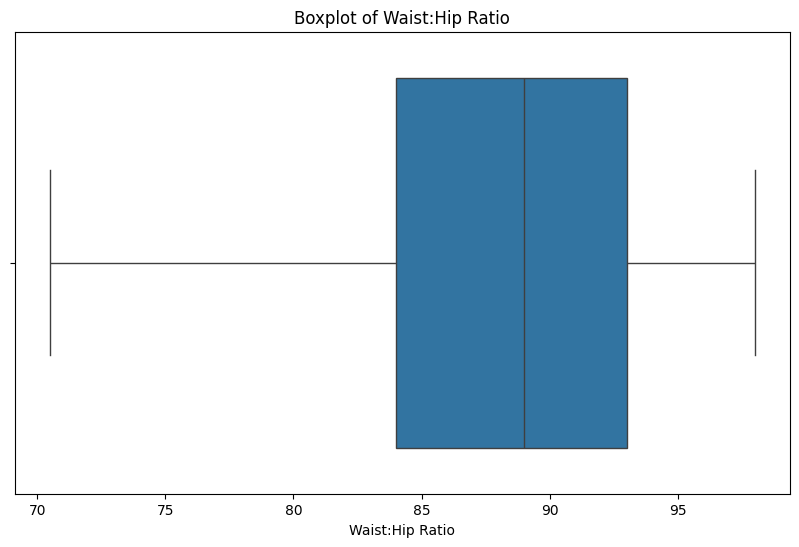

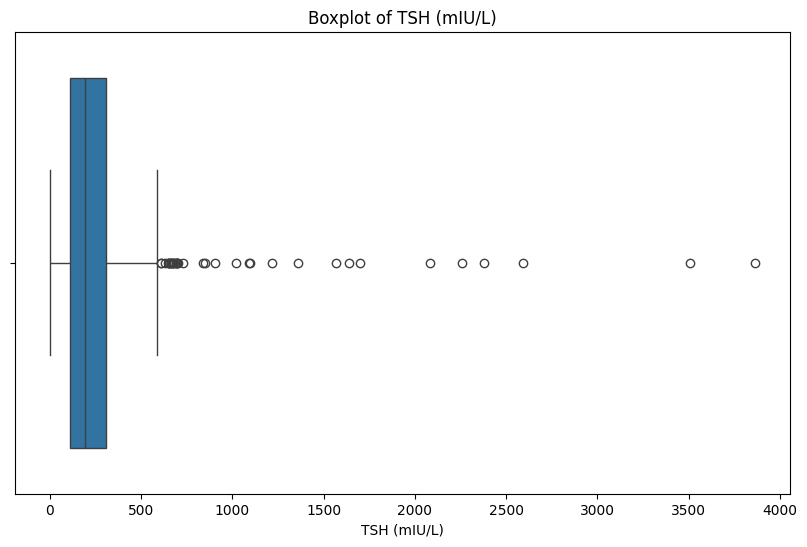

Outliers pada TSH (mIU/L) sudah dihandel.


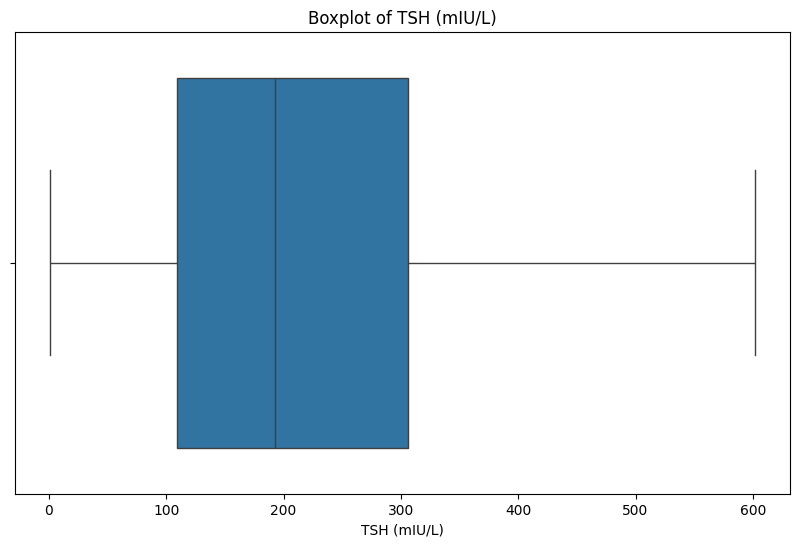

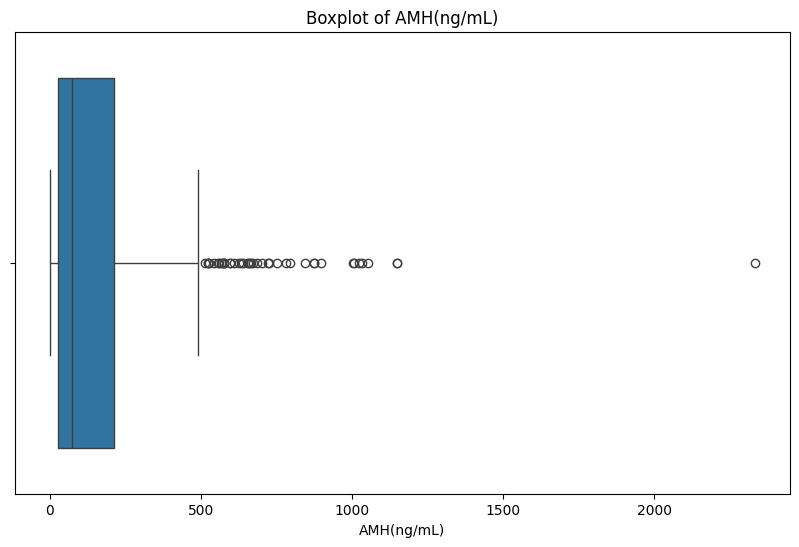

Outliers pada AMH(ng/mL) sudah dihandel.


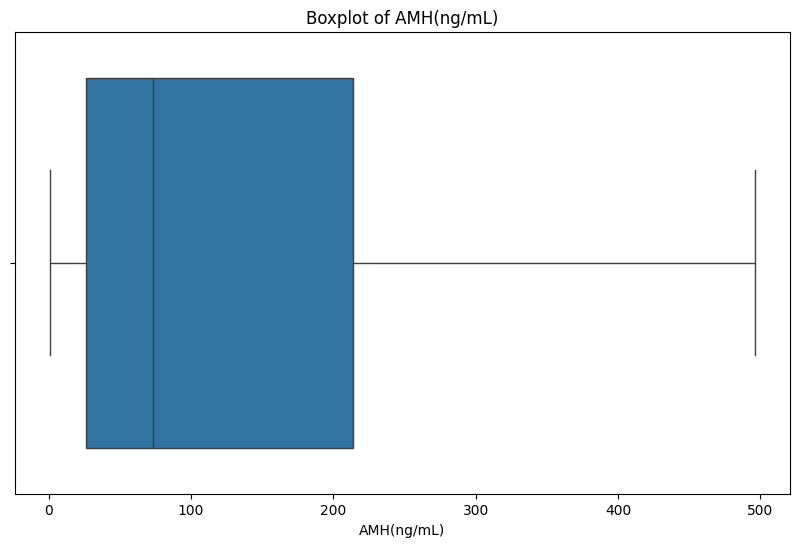

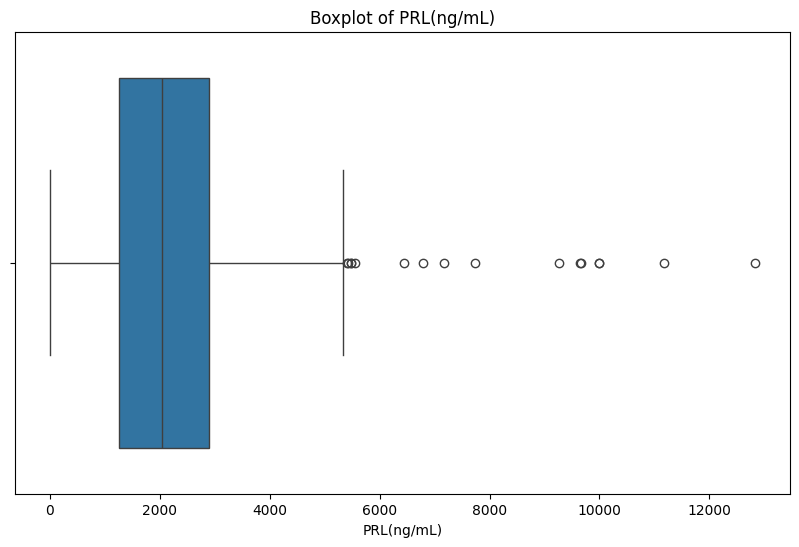

Outliers pada PRL(ng/mL) sudah dihandel.


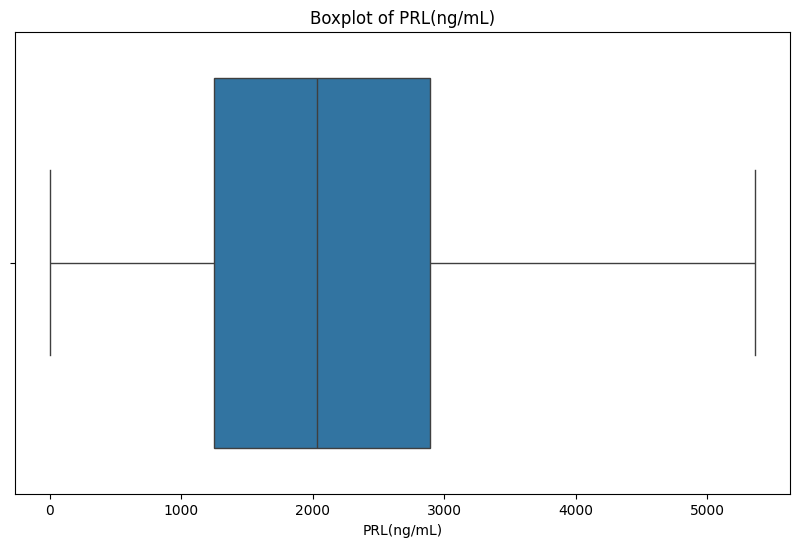

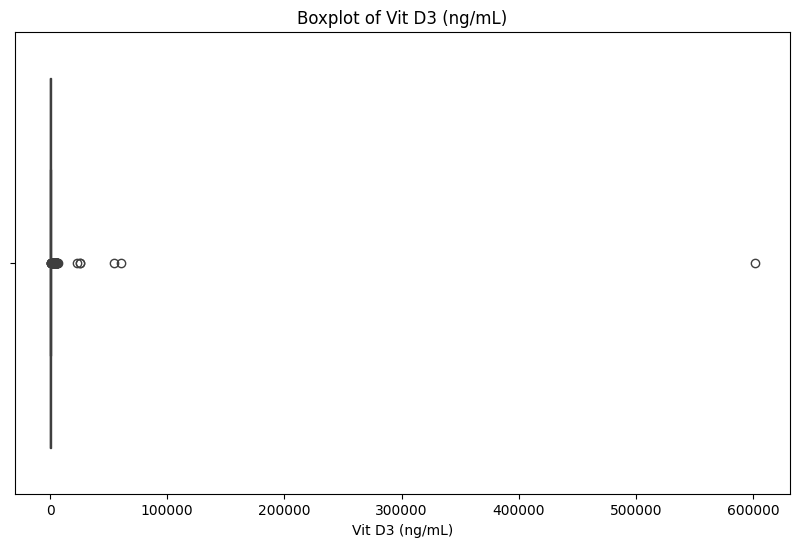

Outliers pada Vit D3 (ng/mL) sudah dihandel.


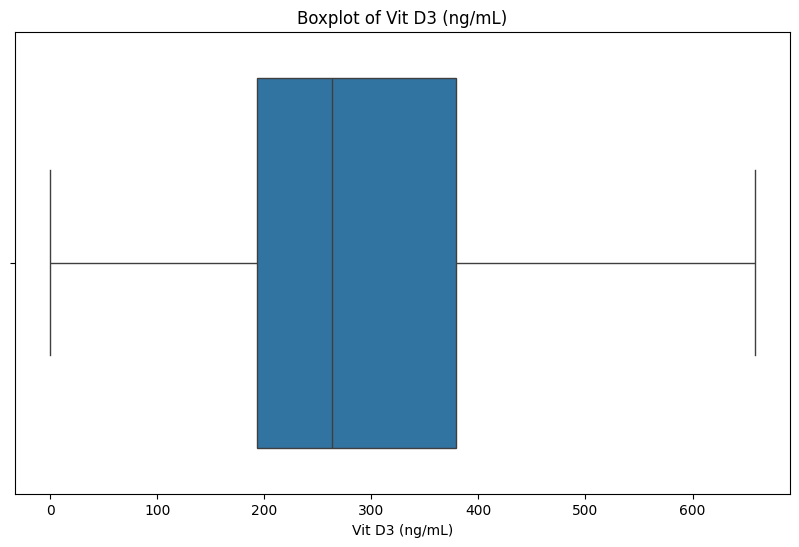

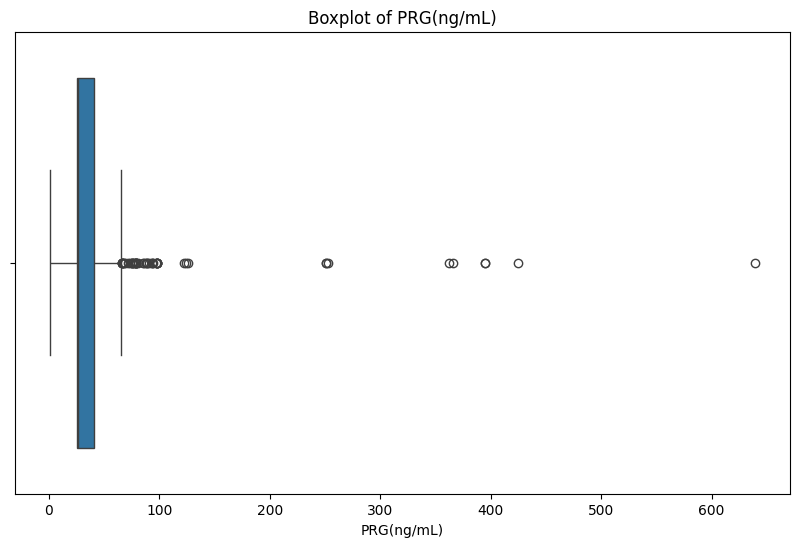

Outliers pada PRG(ng/mL) sudah dihandel.


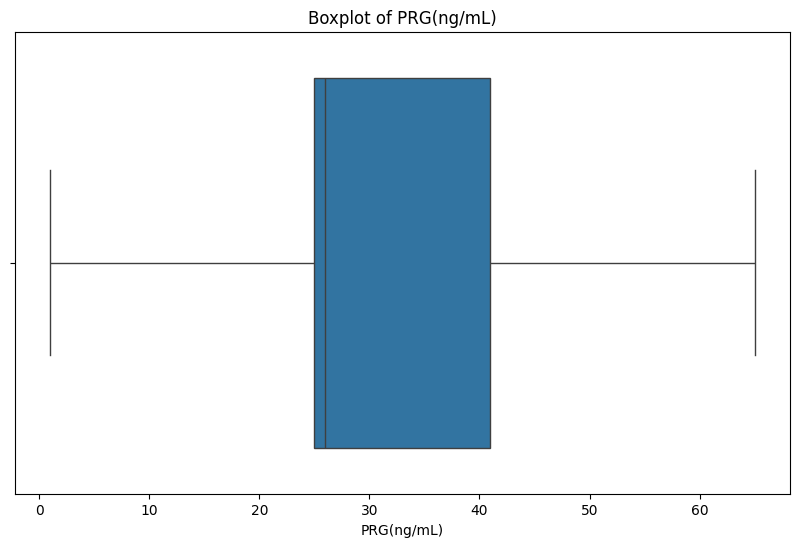

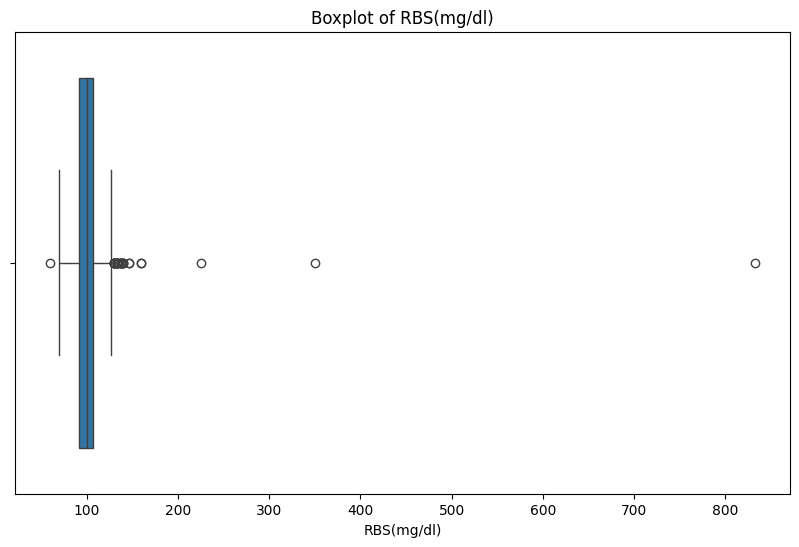

Outliers pada RBS(mg/dl) sudah dihandel.


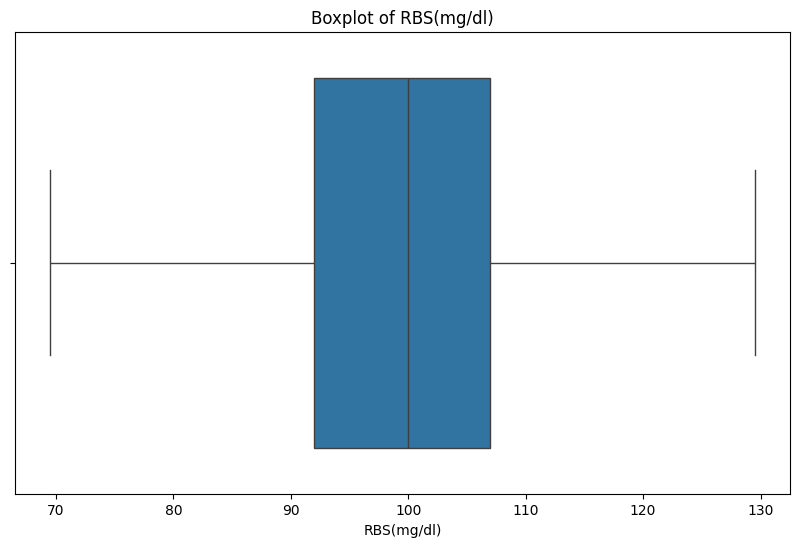

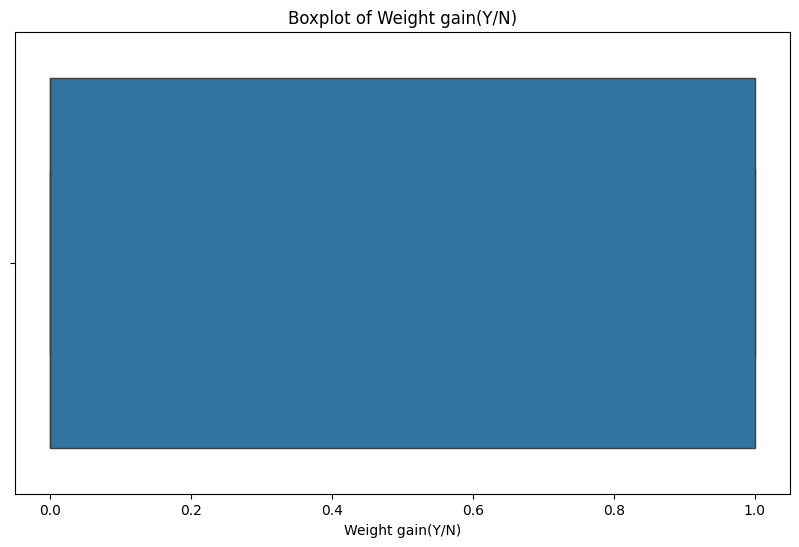

Outliers pada Weight gain(Y/N) sudah dihandel.


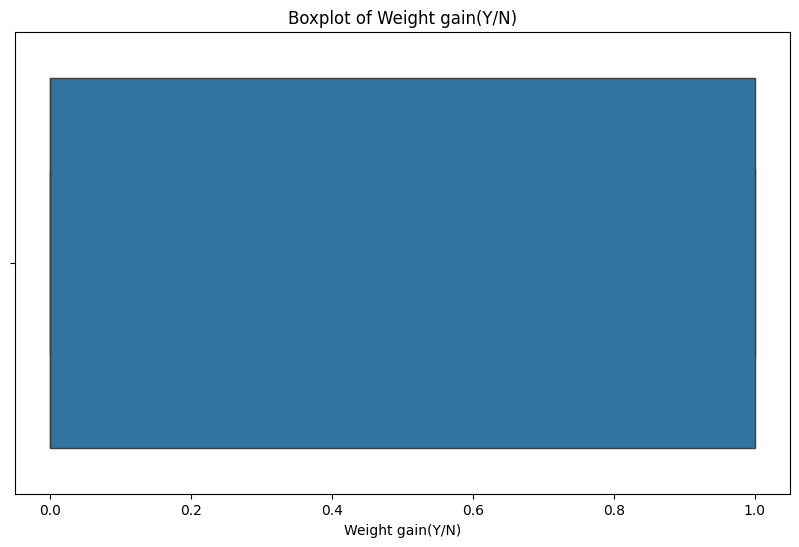

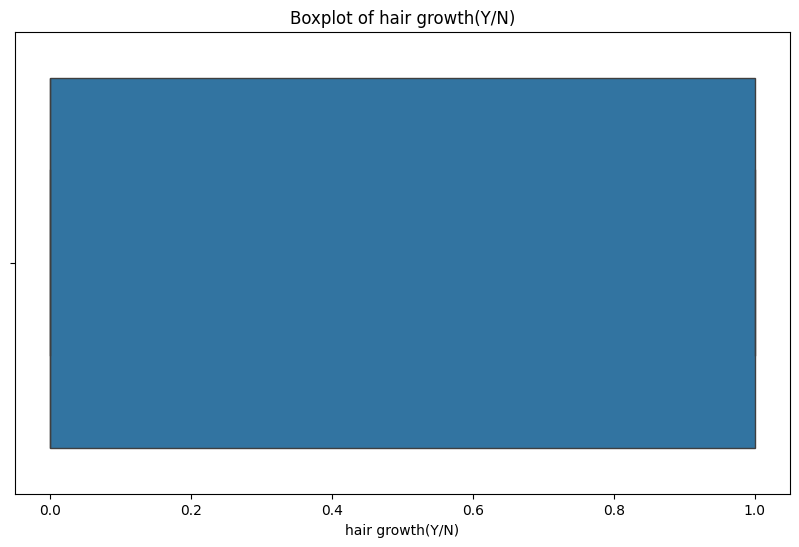

Outliers pada hair growth(Y/N) sudah dihandel.


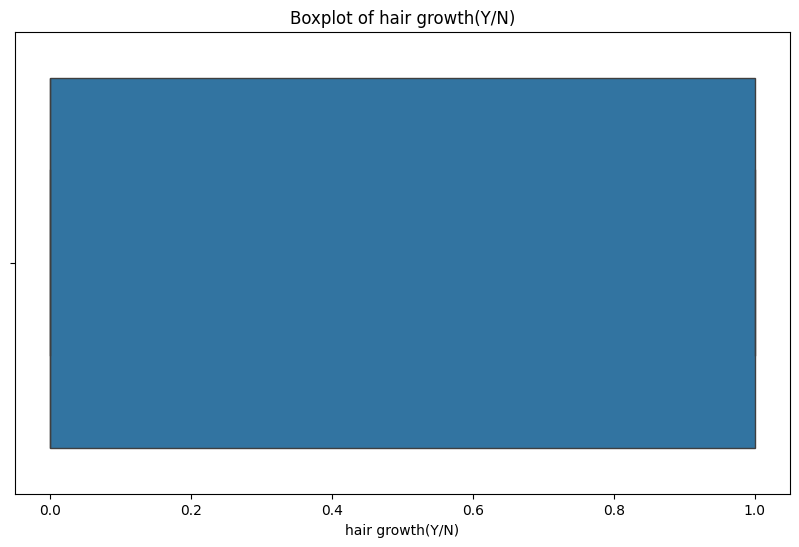

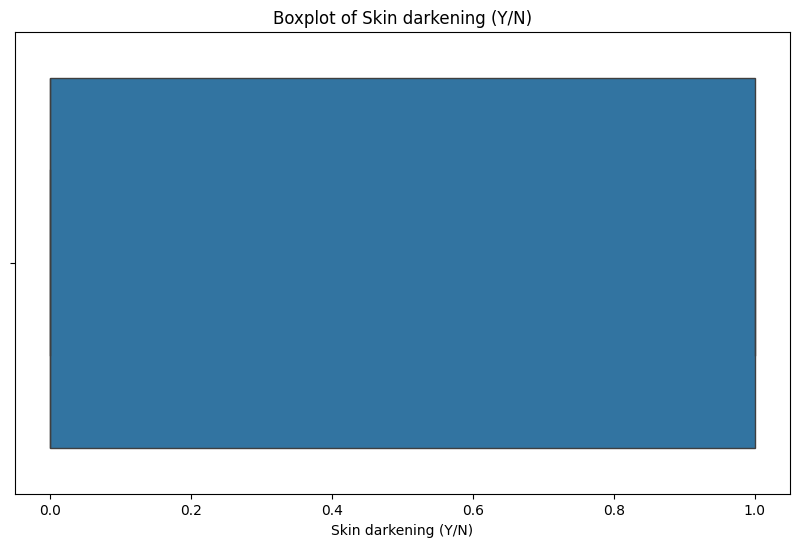

Outliers pada Skin darkening (Y/N) sudah dihandel.


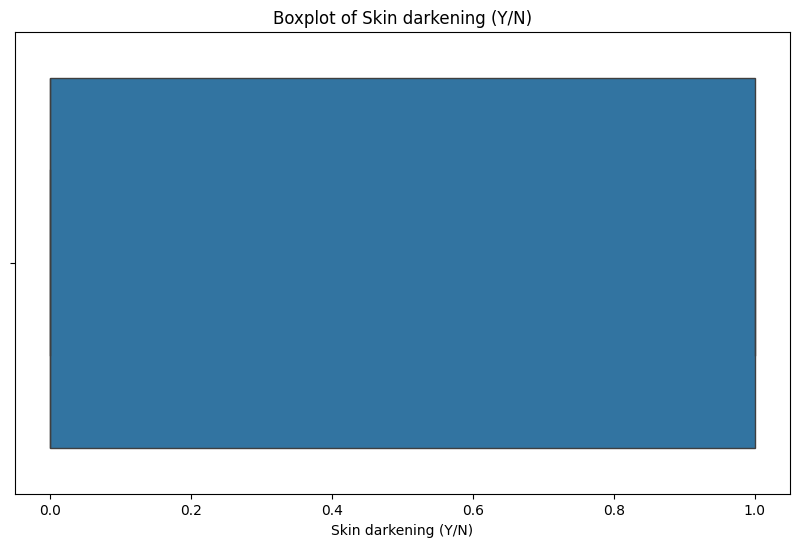

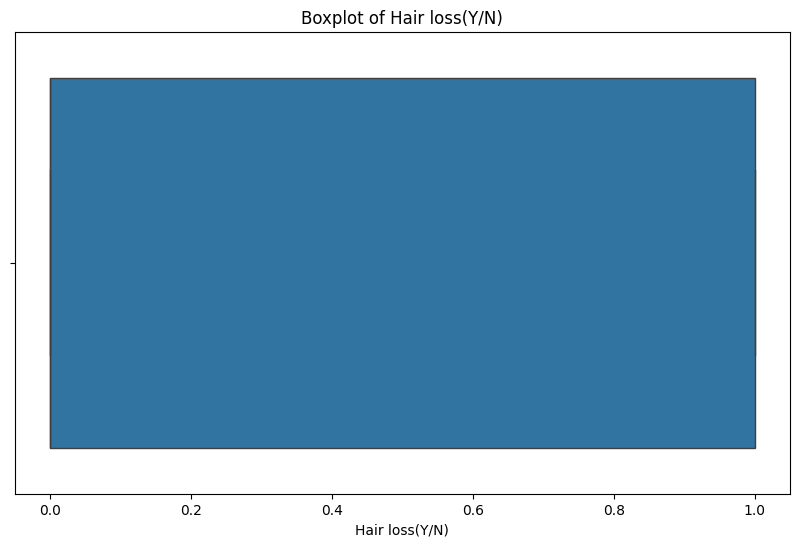

Outliers pada Hair loss(Y/N) sudah dihandel.


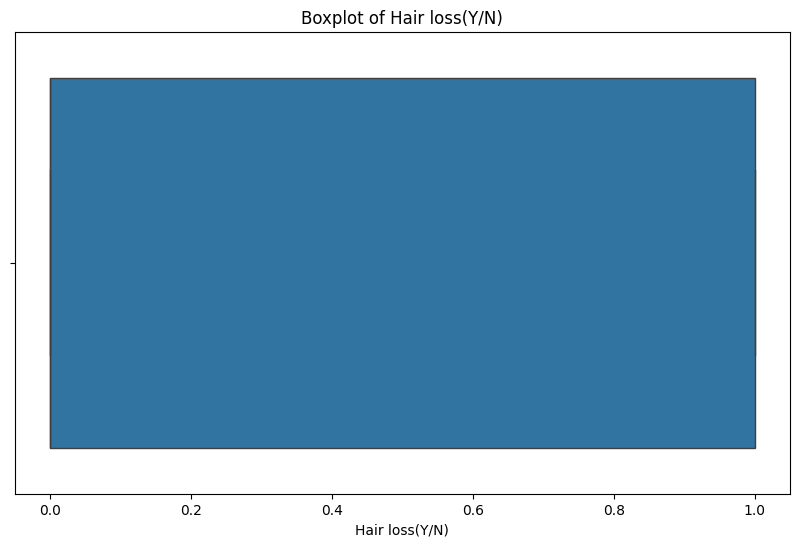

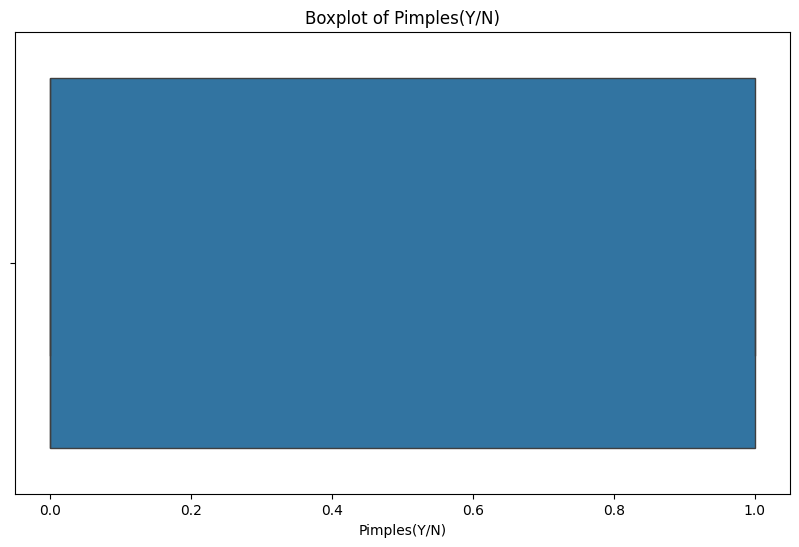

Outliers pada Pimples(Y/N) sudah dihandel.


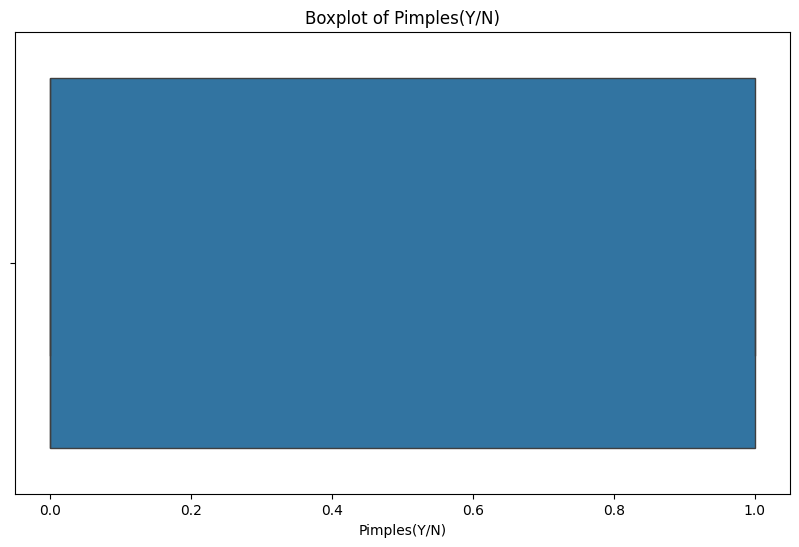

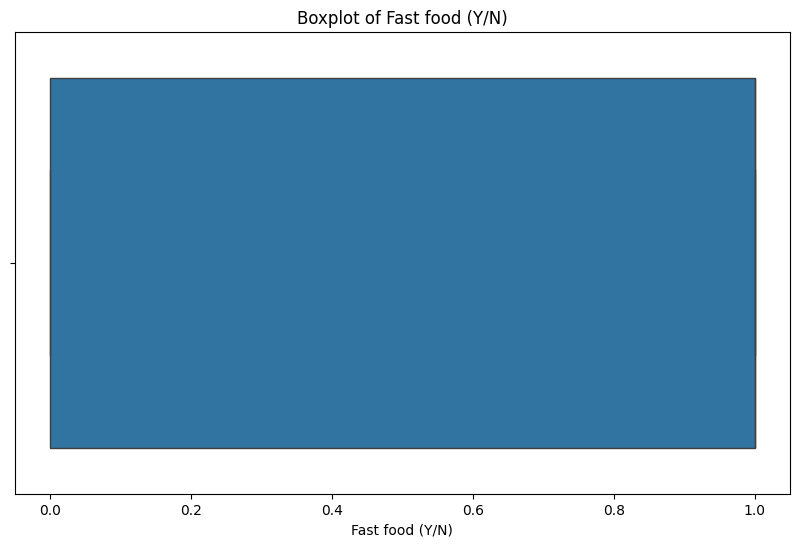

Outliers pada Fast food (Y/N) sudah dihandel.


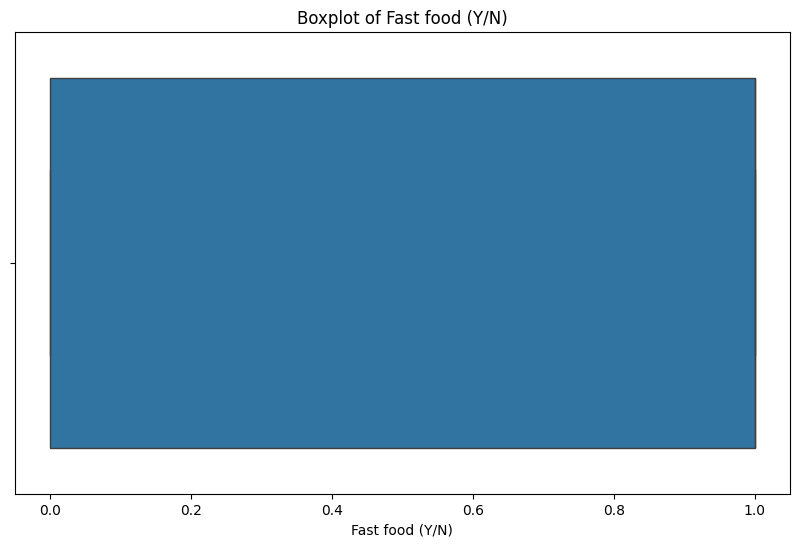

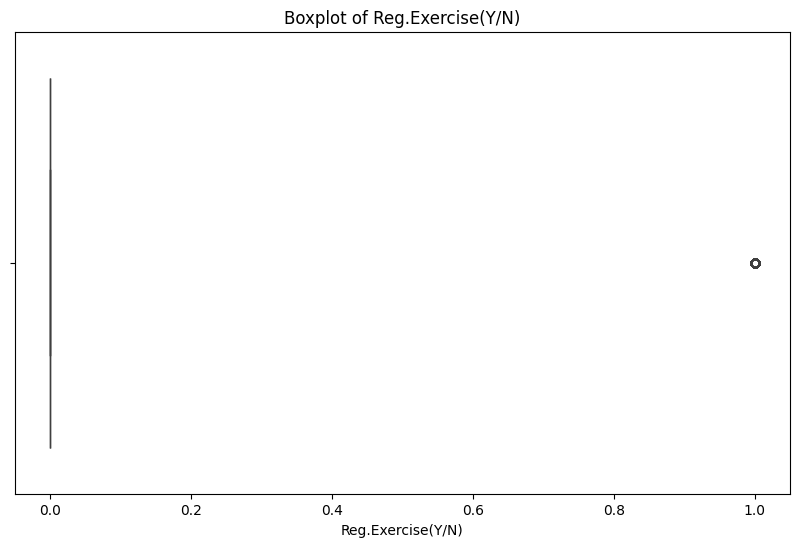

Outliers pada Reg.Exercise(Y/N) sudah dihandel.


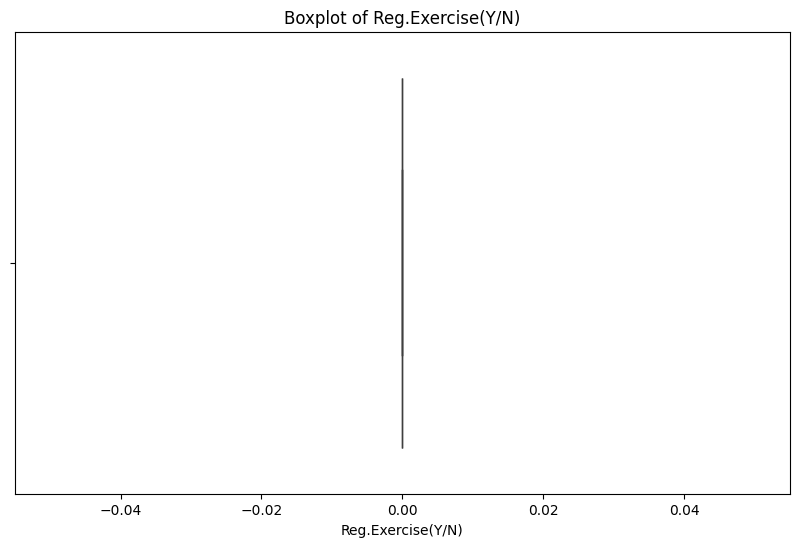

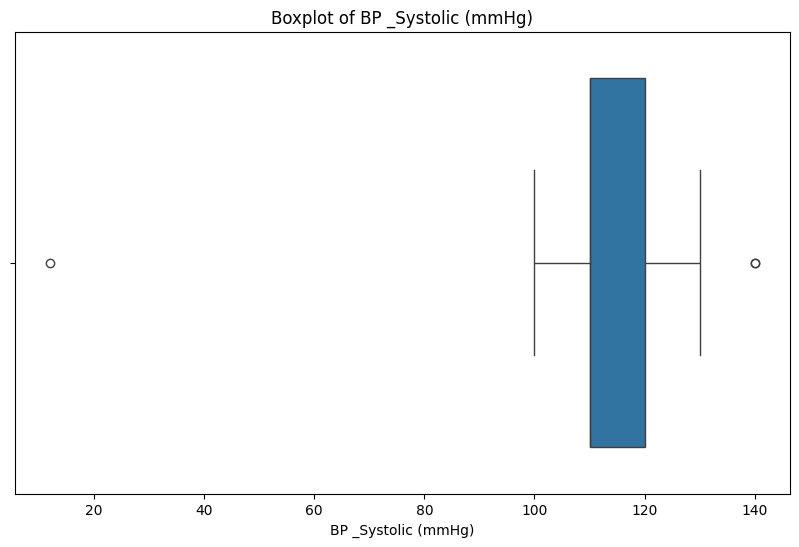

Outliers pada BP _Systolic (mmHg) sudah dihandel.


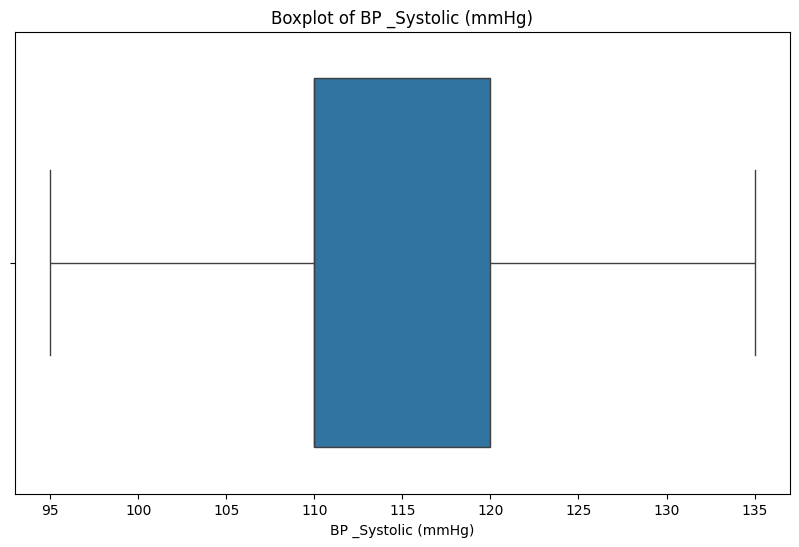

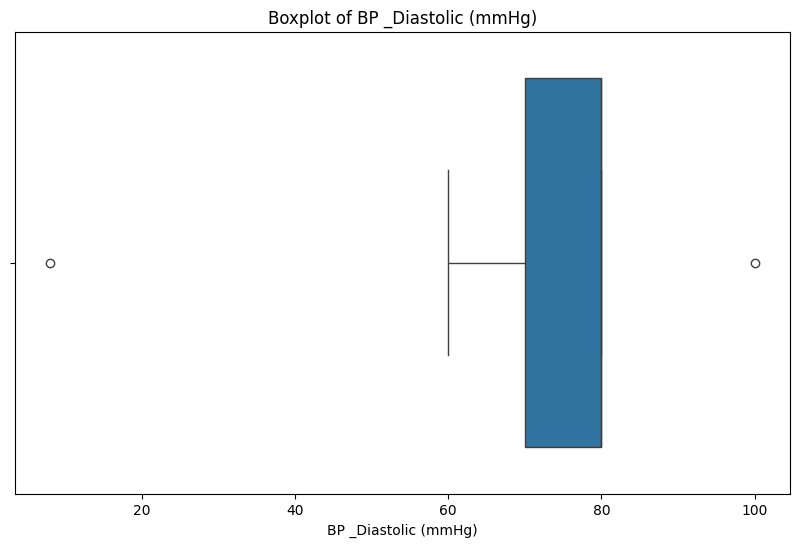

Outliers pada BP _Diastolic (mmHg) sudah dihandel.


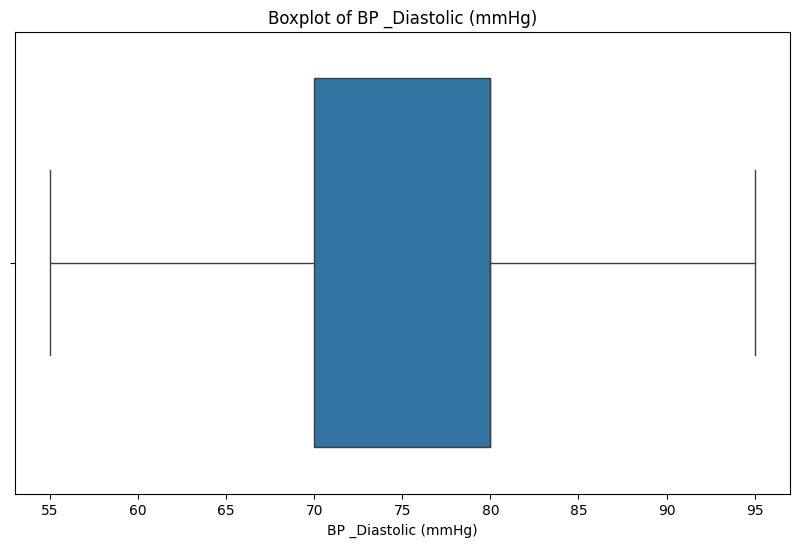

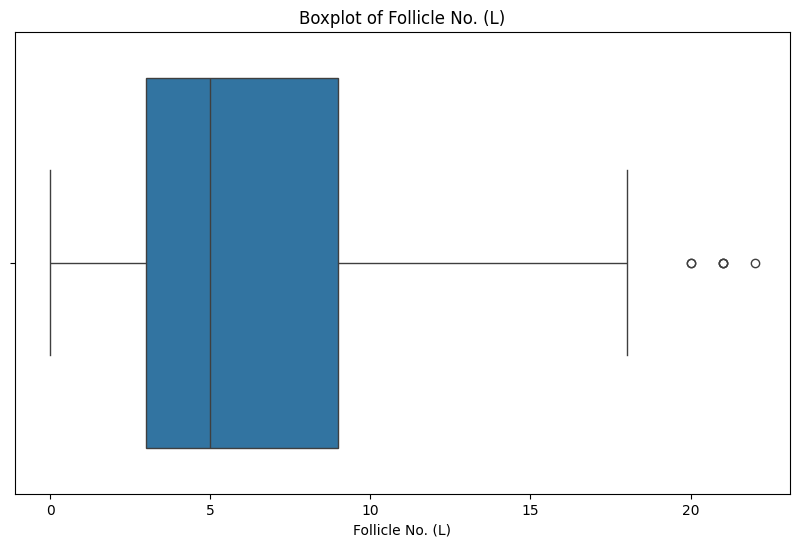

Outliers pada Follicle No. (L) sudah dihandel.


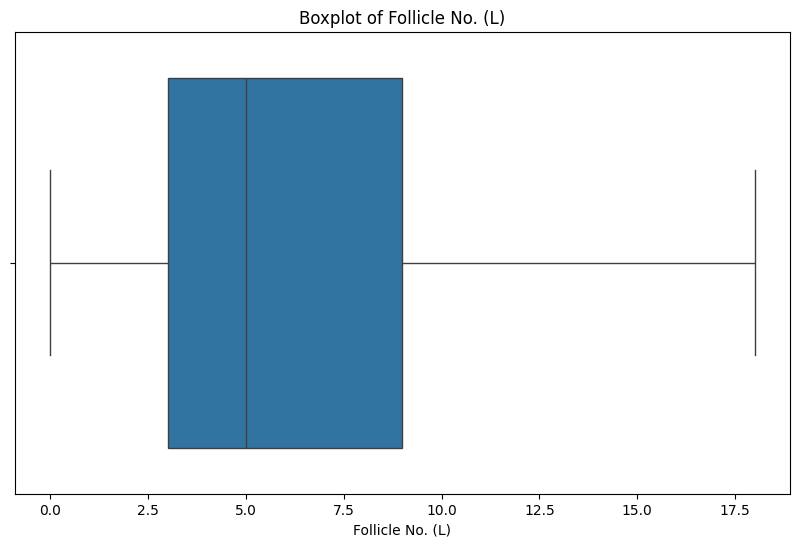

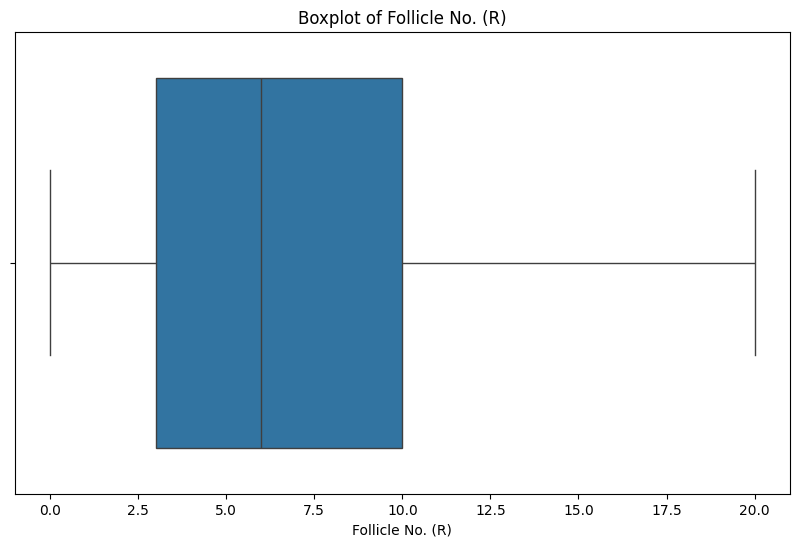

Outliers pada Follicle No. (R) sudah dihandel.


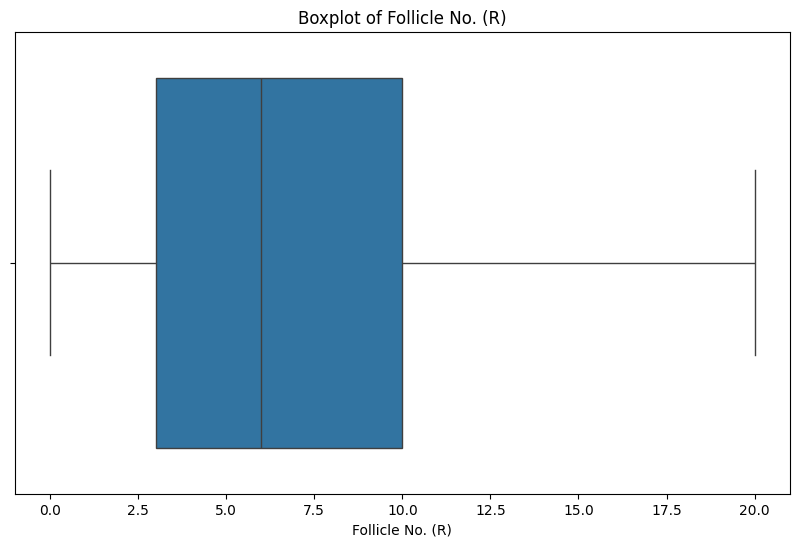

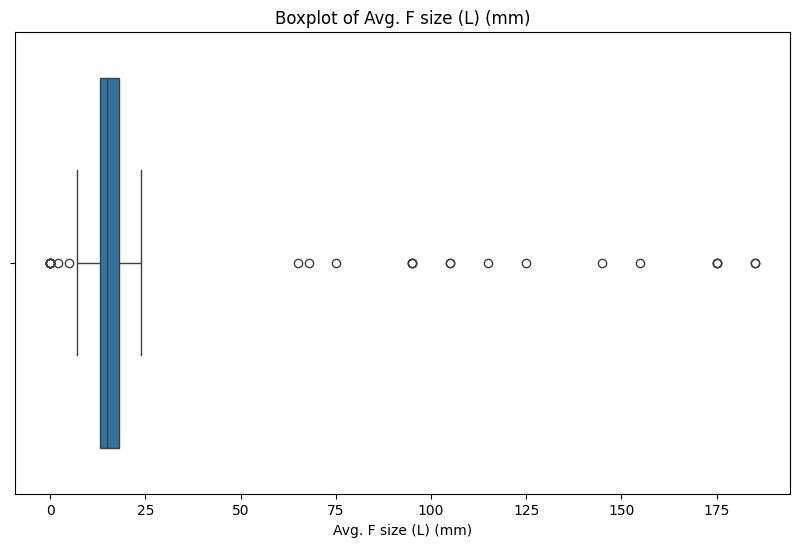

Outliers pada Avg. F size (L) (mm) sudah dihandel.


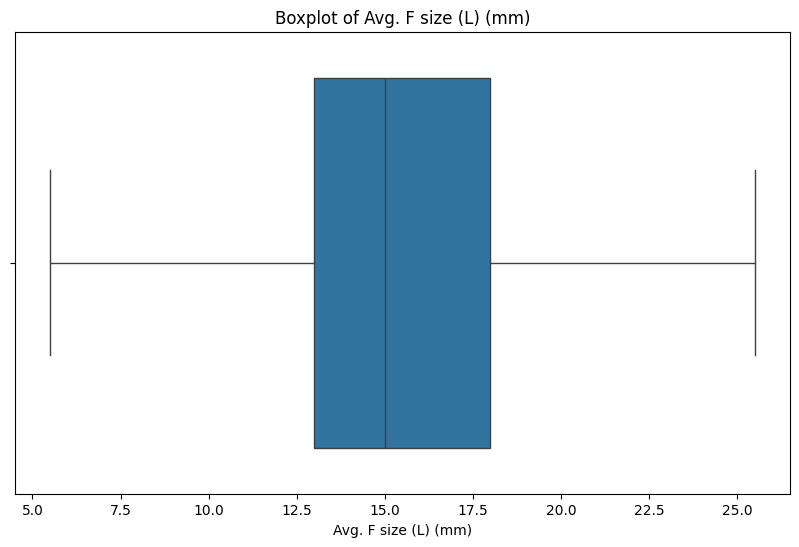

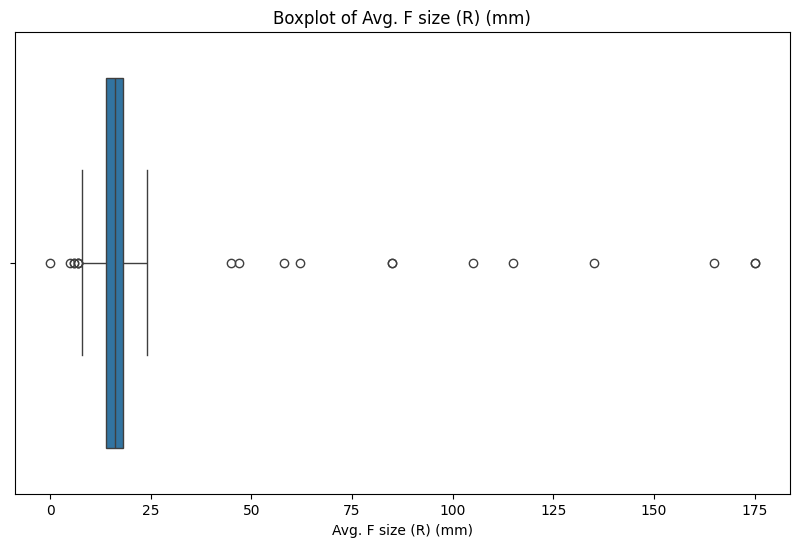

Outliers pada Avg. F size (R) (mm) sudah dihandel.


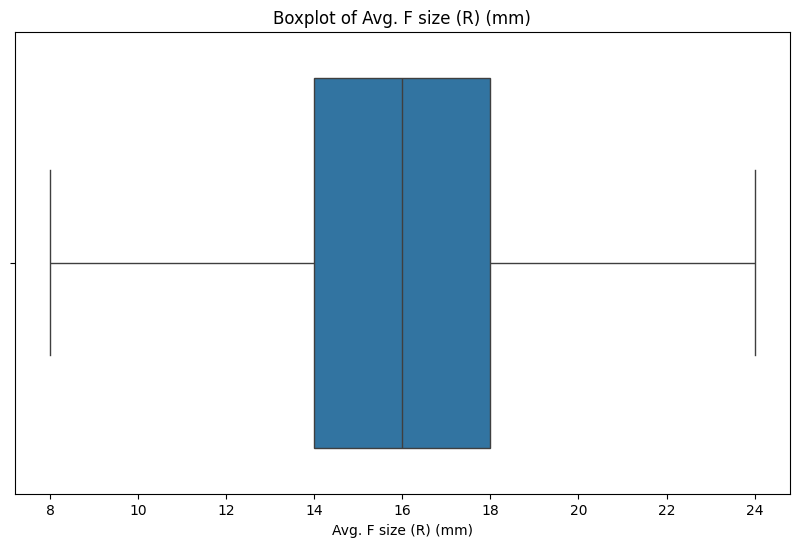

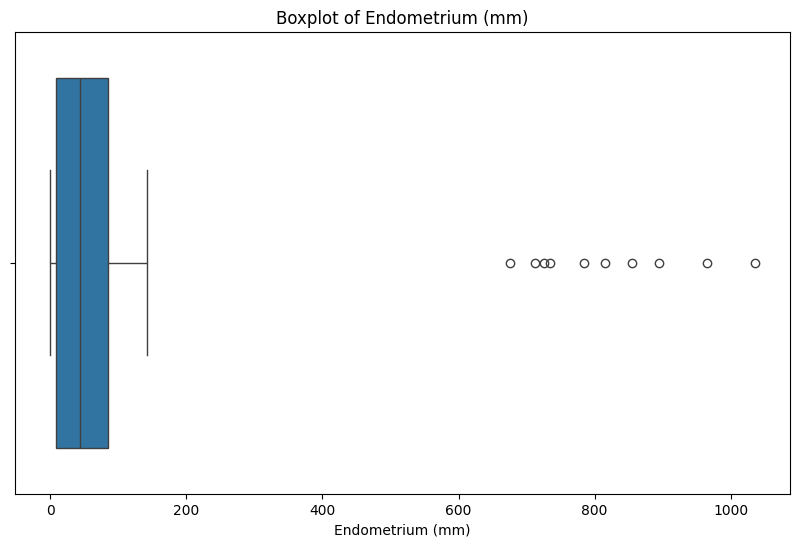

Outliers pada Endometrium (mm) sudah dihandel.


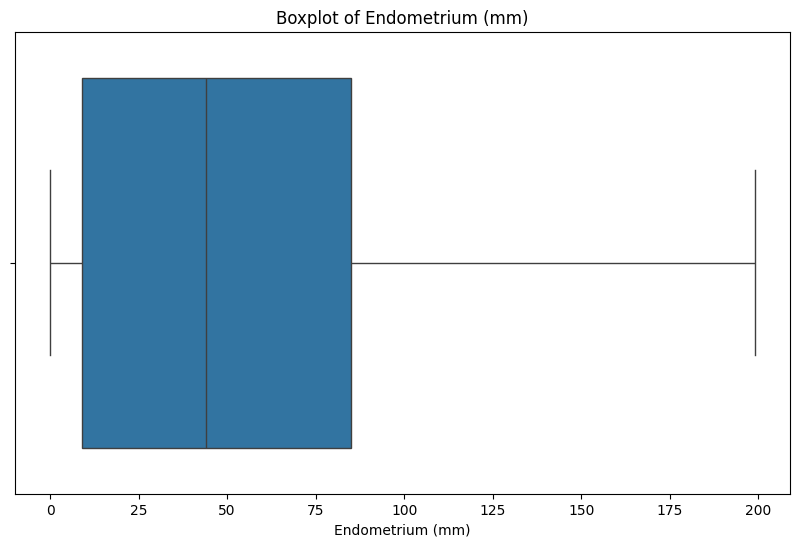

In [17]:
def plot_boxplot(df, column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Contoh untuk kolom numerik
numeric_columns = df.select_dtypes(include=[np.number]).columns

for column in numeric_columns:
    plot_boxplot(df, column)

    # Menangani outlier dengan IQR method
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] > upper_bound, upper_bound,
                          np.where(df[column] < lower_bound, lower_bound, df[column]))

    print(f"Outliers pada {column} sudah dihandel.")
    plot_boxplot(df, column)

## Cek duplikat

In [18]:
# Cek duplikat
duplicate_count = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_count}")

# Hapus duplikat
df.drop_duplicates(inplace=True)

print(f"Jumlah baris setelah menghapus duplikat: {len(df)}")

Jumlah baris duplikat: 0
Jumlah baris setelah menghapus duplikat: 541


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541 entries, 1 to 541
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PCOS (Y/N)             541 non-null    float64
 1   Age (yrs)              541 non-null    float64
 2   Weight (Kg)            541 non-null    float64
 3   Height(Cm)             541 non-null    float64
 4   BMI                    541 non-null    float64
 5   Blood Group            541 non-null    float64
 6   Pulse rate(bpm)        541 non-null    float64
 7   RR (breaths/min)       541 non-null    float64
 8   Hb(g/dl)               541 non-null    float64
 9   Cycle(R/I)             541 non-null    float64
 10  Cycle length(days)     541 non-null    float64
 11  Marraige Status (Yrs)  541 non-null    float64
 12  Pregnant(Y/N)          541 non-null    float64
 13  No. of abortions       541 non-null    float64
 14  Ibeta-HCG(mIU/mL)      541 non-null    float64
 15  IIbeta-HCG(

In [20]:
df = df.loc[:,df.apply(pd.Series.nunique) != 1]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541 entries, 1 to 541
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PCOS (Y/N)             541 non-null    float64
 1   Age (yrs)              541 non-null    float64
 2   Weight (Kg)            541 non-null    float64
 3   Height(Cm)             541 non-null    float64
 4   BMI                    541 non-null    float64
 5   Blood Group            541 non-null    float64
 6   Pulse rate(bpm)        541 non-null    float64
 7   RR (breaths/min)       541 non-null    float64
 8   Hb(g/dl)               541 non-null    float64
 9   Cycle(R/I)             541 non-null    float64
 10  Cycle length(days)     541 non-null    float64
 11  Marraige Status (Yrs)  541 non-null    float64
 12  Pregnant(Y/N)          541 non-null    float64
 13  Ibeta-HCG(mIU/mL)      541 non-null    float64
 14  IIbeta-HCG(mIU/mL)     541 non-null    float64
 15  FSH(mIU/mL)

## feature selection

In [22]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

x = df.drop('PCOS (Y/N)', axis=1) #
y = df['PCOS (Y/N)']

In [23]:
# Misalkan x adalah fitur dan y adalah target
mi_selector = SelectKBest(score_func=f_classif, k=15)  # Menggunakan ANOVA F-statistic untuk seleksi fitur

# Melakukan fitting pada data x (fitur) dan y (label/target)
x_mi = mi_selector.fit_transform(x, y)

# Mendapatkan skor untuk tiap fitur
feature_scores = mi_selector.scores_

# Menyimpan nama fitur dan skornya dalam bentuk DataFrame agar mudah diurutkan
feature_scores_df = pd.DataFrame({'Fitur': x.columns, 'Skor': feature_scores})

# Mengurutkan berdasarkan skor dari yang terbesar ke terkecil
feature_scores_df_sorted = feature_scores_df.sort_values(by='Skor', ascending=False)

# Menampilkan fitur dan skornya setelah diurutkan
print("Skor Fitur Berdasarkan ANOVA F-statistic (Dari Terbesar ke Terkecil):")
for index, row in feature_scores_df_sorted.iterrows():
    print(f"{row['Fitur']}: {row['Skor']:.4f}")


Skor Fitur Berdasarkan ANOVA F-statistic (Dari Terbesar ke Terkecil):
Follicle No. (R): 390.8359
Follicle No. (L): 314.7152
Skin darkening (Y/N): 157.6722
hair growth(Y/N): 148.4255
Weight gain(Y/N): 130.1684
Cycle(R/I): 103.6748
Fast food (Y/N): 88.8491
Pimples(Y/N): 48.0436
Cycle length(days): 40.0132
Hip(inch): 16.6364
Hair loss(Y/N): 16.6054
Age (yrs): 16.1359
Waist(inch): 15.5329
FSH(mIU/mL): 7.4317
Weight (Kg): 7.2827
Ibeta-HCG(mIU/mL): 7.0436
Pulse rate(bpm) : 6.8675
AMH(ng/mL): 5.8120
Avg. F size (R) (mm): 5.6744
Avg. F size (L) (mm): 3.3779
FSH/LH: 2.7832
BMI: 2.6478
IIbeta-HCG(mIU/mL): 2.2503
LH(mIU/mL): 1.6961
Waist:Hip Ratio: 1.3987
RR (breaths/min): 0.9774
Hb(g/dl): 0.7869
PRG(ng/mL): 0.7406
Blood Group: 0.7164
BP _Diastolic (mmHg): 0.5900
RBS(mg/dl): 0.5865
Vit D3 (ng/mL): 0.5809
Marraige Status (Yrs): 0.5238
Height(Cm) : 0.4953
Pregnant(Y/N): 0.4098
TSH (mIU/L): 0.2371
PRL(ng/mL): 0.1132
Endometrium (mm): 0.0379
BP _Systolic (mmHg): 0.0195


In [24]:
sel_ = SelectKBest(f_classif, k=15)
sel_.fit(x, y)

# display features
selected_features = x.columns[sel_.get_support()]
print(selected_features)

Index(['Age (yrs)', 'Weight (Kg)', 'Cycle(R/I)', 'Cycle length(days)',
       'FSH(mIU/mL)', 'Hip(inch)', 'Waist(inch)', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
       'Pimples(Y/N)', 'Fast food (Y/N)', 'Follicle No. (L)',
       'Follicle No. (R)'],
      dtype='object')


In [25]:
df_selected = df[selected_features]
df_selected.head()

Age (yrs)  Weight (Kg)  Cycle(R/I)  Cycle length(days)  \
Patient File No.                                                           
1                      28.0         95.5         2.0                 5.0   
2                      36.0         65.0         2.0                 5.0   
3                      33.0         95.5         2.0                 5.0   
4                      37.0         65.0         2.0                 5.0   
5                      25.0         52.0         2.0                 5.0   

                  FSH(mIU/mL)  Hip(inch)  Waist(inch)  Weight gain(Y/N)  \
Patient File No.                                                          
1                       795.0       36.0         30.0               0.0   
2                       673.0       38.0         32.0               0.0   
3                       554.0       40.0         36.0               0.0   
4                       806.0       42.0         36.0               0.0   
5                       398.0       37.0         30.0               0.0   

                  hair growth(Y/N)  Skin darkening (Y/N)  Hair loss(Y/N)  \
Patient File No.                                                           
1                              0.0                   0.0             0.0   
2                              0.0                   0.0             0.0   
3                              0.0                   0.0             1.0   
4                              0.0                   0.0             0.0   
5                              0.0                   0.0             1.0   

                  Pimples(Y/N)  Fast food (Y/N)  Follicle No. (L)  \
Patient File No.                                                    
1                          0.0              1.0               3.0   
2                          0.0              0.0               3.0   
3                          1.0              1.0              13.0   
4                          0.0              0.0               2.0   
5                          0.0              0.0               3.0   

                  Follicle No. (R)  
Patient File No.                    
1                              3.0  
2                              5.0  
3                             15.0  
4                              2.0  
5                              4.0

In [26]:
df_selected = pd.concat([df_selected, df['PCOS (Y/N)']], axis=1)

## modeling

In [27]:
from sklearn.model_selection import train_test_split
# Pisahkan fitur dan target
X = df_selected.drop(['PCOS (Y/N)'], axis=1)
y = df_selected['PCOS (Y/N)']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score,precision_score,classification_report, confusion_matrix

In [29]:
# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

In [30]:
# Melatih model
rf_model.fit(X_train, y_train)

# Prediksi
y_pred_rf = rf_model.predict(X_test)

In [31]:
# Evaluasi
print("Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test,y_pred_rf, average='micro'))
print('Recall:', recall_score(y_test,y_pred_rf, average='micro'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Decision Tree Performance:
Accuracy: 0.8727272727272727
Precision: 0.8727272727272727
Recall: 0.8727272727272727

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.92      0.91        37
         1.0       0.82      0.78      0.80        18

    accuracy                           0.87        55
   macro avg       0.86      0.85      0.85        55
weighted avg       0.87      0.87      0.87        55



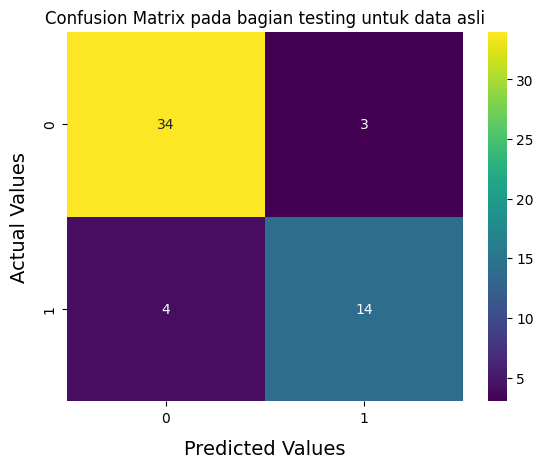

In [32]:
sns.heatmap(confusion_matrix(y_test,y_pred_rf),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

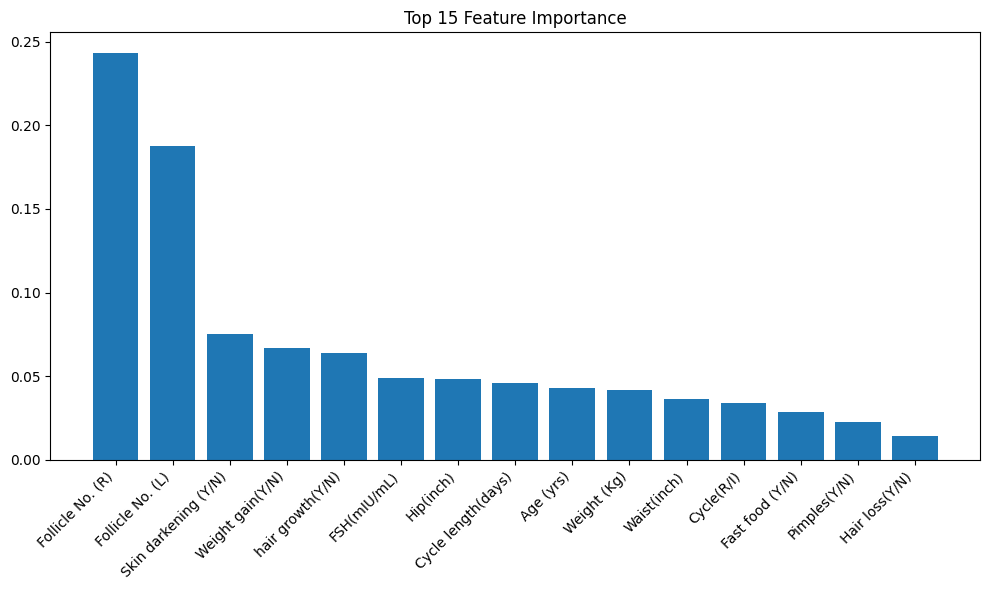

In [35]:
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10,6))
plt.bar(feature_importance['feature'][:18], feature_importance['importance'][:18])
plt.title('Top 15 Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [34]:
# import pickle

# # Simpan model ke dalam file .pkl
# with open('model6.pkl', 'wb') as file:
#     pickle.dump(dt_model, file)
